In [ ]:
# Author : 
# Installing and Importing Necessary Libraries

## Installing Libraries

In [ ]:
#Installing necessary libraries
!pip install bayesian-optimization
!pip install datasets
!pip install tensorboard
!pip install matplotlib
!pip install seaborn
!pip install evaluate
!pip install lightgbm
!pip install xgboost
!pip install tf-keras
!pip install scikit-optimize

# Installing word processing libraries
!pip install wordcloud
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.2 MB/s e

## Importing Libraries

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from numpy import vstack
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.special import softmax

#Importing the scikit learn modelling libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, RandomizedSearchCV

# Importing Classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier


# Importing the evaluation libraries
from sklearn.metrics import (
    auc,
    accuracy_score,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    matthews_corrcoef,
    recall_score,
    precision_score,
    classification_report,
    make_scorer
)

from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Ignoring unnecessary warnings
import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

In [ ]:
# Importing transformer and torchpackages
import torch
import json
# import os
# # from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig, AutoModel, AdamW
# # from datasets import Dataset
# # from transformers import TrainingArguments, Trainer, EvalPrediction, set_seed
# # from transformers import TrainerCallback
# # from transformers import DataCollatorWithPadding

from tqdm import tqdm

import torch.nn as nn
import torch.optim as optim

from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD, Adam, AdamW, RMSprop, Adagrad, Adamax
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

In [ ]:
# Import necessary libraries for text analysis
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt_tab')
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Useful Functions

In [ ]:
# Calculating metrics for all models used in this notebook
def metrics(actuals, predictions, pred_scores):
    # calculate metrics
    acc = accuracy_score(actuals, predictions)
    recall = recall_score(actuals, predictions)
    precision = precision_score(actuals, predictions)
    tn, fp, fn, tp = confusion_matrix(actuals, predictions, labels=[0, 1]).ravel()
    spec = tn/(tn+fp)
    roc_auc = roc_auc_score(actuals, pred_scores)
    mcc = matthews_corrcoef(actuals, predictions)
    f1 = f1_score(actuals, predictions)
    results = {'Accuracy': acc,
               'Recall/Sensitivity': recall,
               'Precision': precision,
               'Specificity': spec,
               'ROC_AUC': roc_auc,
               'MCC':mcc,
               'F1-Score':f1,
               'Confusion Matrix': {'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp}}
    return results

In [ ]:
# Plotting ROC AUC Curve for all models considered
def plot_roc_auc(actuals, pred_scores, roc_auc_score_value, filename="roc_auc_curve.png", plot_title="ROC Curve"):
    fpr, tpr, _ = roc_curve(actuals, pred_scores)

    # Plotting the ROC curve
    plt.figure(figsize=(10, 6))

    # Plot ROC curve with thicker line
    plt.plot(fpr, tpr, color='blue', lw=2.5, label=f"ROC curve (AUC = {roc_auc_score_value:.2f})")

    # Plot diagonal line for random guessing
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

    # Shading the area under the curve
    plt.fill_between(fpr, tpr, alpha=0.2, color='blue')

    # Highlight the point closest to (0, 1)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = (fpr[optimal_idx], tpr[optimal_idx])
    plt.scatter(*optimal_threshold, color='red', marker='o', label='Optimal Threshold', zorder=5)

    # Adding labels and titles with larger fonts
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(plot_title, fontsize=14)  # Custom title

    # Setting axis limits for better presentation
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Customizing tick font size
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adding a grid for clarity
    plt.grid(True)

    # Add legend in the lower right corner
    plt.legend(loc="lower right", fontsize=12)

    # Save the image with custom filename
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # Save as a high-resolution image

    # Display the plot
    plt.show()


In [ ]:
# Plotting Precision-Recall Curve for all models considered
def plot_precision_recall(actuals, pred_scores, filename="pr_rec_curve.png", plot_title="Precision-Recall Curve"):
    precision, recall, thresholds = precision_recall_curve(actuals, pred_scores)

    # Plot Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='green', lw=2.5, label='Precision-Recall Curve')

    # Annotate specific points on the curve at regular intervals
    for i, threshold in enumerate(thresholds):
        if i % (len(thresholds) // 10) == 0:  # Show 10 points across the curve
            plt.annotate(f'Th={threshold:.2f}',
                         (recall[i], precision[i]),
                         textcoords="offset points",
                         xytext=(-15, 5),
                         ha='center', fontsize=9)

    # Adding labels and title
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(plot_title, fontsize=16)  # Custom title

    # Add grid
    plt.grid(True)

    # Customizing tick font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Optional: Highlight optimal threshold (where recall and precision balance best)
    optimal_idx = (precision * recall).argmax()  # Closest to balanced trade-off
    plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold', zorder=5)

    # Add legend
    plt.legend(loc="lower left", fontsize=12)

    # Save the image with custom filename
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # Save as a high-resolution image

    # Show the plot
    plt.show()


# Importing Dataset

All dataset variable names with _3 means that the data was taken less than 3 days after admission while _2 indicates that the data was extracted for less than 2 days after admission.

In [ ]:
#Importing the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the datasets for only textual analysis which also had more textual data entries.
df_3 = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/df_less_3_combined_200.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/df_less_2_combined_200.csv')

In [ ]:
#Importing the datasets for table + textual analysis
df_3_vitals = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/df_less_3_vital.csv')
df_2_vitals = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/df_less_2_vital.csv')

In [ ]:
#Display the first 5 rows of the 3 days dataset. Working with this one mainly as it contains the data in df_2 as well
df_3_vitals.head()

Unnamed: 0.1  Unnamed: 0   hadm_id  subject_id            admittime  \
0             0    195935.0  22595853    10000032  2180-05-06 22:23:00   
1             1    195936.0  22595853    10000032  2180-05-06 22:23:00   
2             2    195937.0  22595853    10000032  2180-05-06 22:23:00   
3             3    213936.0  22841357    10000032  2180-06-26 18:27:00   
4             4    213937.0  22841357    10000032  2180-06-26 18:27:00   

             dischtime admission_type      admission_location  \
0  2180-05-07 17:15:00         URGENT  TRANSFER FROM HOSPITAL   
1  2180-05-07 17:15:00         URGENT  TRANSFER FROM HOSPITAL   
2  2180-05-07 17:15:00         URGENT  TRANSFER FROM HOSPITAL   
3  2180-06-27 18:49:00       EW EMER.          EMERGENCY ROOM   
4  2180-06-27 18:49:00       EW EMER.          EMERGENCY ROOM   

  discharge_location insurance  ... drg_mortality  \
0               HOME     Other  ...           2.0   
1               HOME     Other  ...           2.0   
2               HOME     Other  ...           2.0   
3               HOME  Medicaid  ...           2.0   
4               HOME  Medicaid  ...           2.0   

                                         description length temperature  \
0  disorders of liver except malig,cirr,alc hepa ...   80.0        97.7   
1  disorders of liver except malig,cirr,alc hepa ...   80.0        97.7   
2  disorders of liver except malig,cirr,alc hepa ...   80.0        97.7   
3  disorders of liver except malig,cirr,alc hepa ...  100.0        97.9   
4  disorders of liver except malig,cirr,alc hepa ...  100.0        97.9   

  heartrate resprate o2sat    sbp   dbp  pain  
0      79.0     16.0  98.0  107.0  60.0     0  
1      79.0     16.0  98.0  107.0  60.0     0  
2      79.0     16.0  98.0  107.0  60.0     0  
3      86.0     17.0  93.0   96.0  57.0     5  
4      86.0     17.0  93.0   96.0  57.0     5  

[5 rows x 37 columns]

In [ ]:
# Display the summarized statistics for the numeric columns
df_3_vitals.describe().transpose()

count          mean           std           min  \
Unnamed: 0.1     455461.0  2.277300e+05  1.314804e+05  0.000000e+00   
Unnamed: 0       409576.0  3.758184e+05  2.170895e+05  0.000000e+00   
hadm_id          455461.0  2.498901e+07  2.886433e+06  2.000002e+07   
subject_id       455461.0  1.500517e+07  2.874078e+06  1.000003e+07   
Days_Next_admit  170473.0  2.048861e+02  3.284936e+02 -9.812500e-01   
Outcome30        409576.0  1.444152e-01  3.515107e-01  0.000000e+00   
Duration         409576.0  6.327611e+00  8.266399e+00 -7.958333e-01   
Age              409576.0  6.351466e+01  1.792427e+01  1.800000e+01   
id               409576.0  2.498914e+07  2.885684e+06  2.000002e+07   
drg_severity     314693.0  2.695649e+00  8.878868e-01  1.000000e+00   
drg_mortality    314693.0  2.374203e+00  1.015860e+00  1.000000e+00   
length           325547.0  8.094968e+01  2.561274e+01  1.200000e+01   
temperature      440374.0  9.802966e+01  7.672665e+00  0.000000e+00   
heartrate        451497.0  8.120461e+01  1.623387e+01  0.000000e+00   
resprate         451269.0  1.778502e+01  3.204524e+00  0.000000e+00   
o2sat            445027.0  9.768575e+01  1.496792e+01  0.000000e+00   
sbp              451290.0  1.276467e+02  2.147364e+01  3.000000e+00   
dbp              451290.0  7.236652e+01  1.751605e+02  0.000000e+00   

                          25%           50%           75%           max  
Unnamed: 0.1     1.138650e+05  2.277300e+05  3.415950e+05  4.554600e+05  
Unnamed: 0       1.879478e+05  3.757675e+05  5.632762e+05  7.524920e+05  
hadm_id          2.248931e+07  2.498484e+07  2.747750e+07  2.999981e+07  
subject_id       1.250222e+07  1.500330e+07  1.749476e+07  1.999999e+07  
Days_Next_admit  1.693819e+01  6.616528e+01  2.447090e+02  2.877062e+03  
Outcome30        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
Duration         1.920139e+00  3.950000e+00  7.628472e+00  2.495854e+02  
Age              5.200000e+01  6.500000e+01  7.700000e+01  1.030000e+02  
id               2.249043e+07  2.498270e+07  2.747665e+07  2.999981e+07  
drg_severity     2.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00  
drg_mortality    2.000000e+00  2.000000e+00  3.000000e+00  4.000000e+00  
length           6.500000e+01  8.400000e+01  9.800000e+01  1.520000e+02  
temperature      9.790000e+01  9.810000e+01  9.860000e+01  9.860000e+02  
heartrate        7.000000e+01  8.000000e+01  9.100000e+01  2.290000e+02  
resprate         1.600000e+01  1.800000e+01  1.800000e+01  1.810000e+02  
o2sat            9.600000e+01  9.800000e+01  1.000000e+02  9.712000e+03  
sbp              1.120000e+02  1.260000e+02  1.410000e+02  8.540000e+02  
dbp              6.100000e+01  7.000000e+01  8.000000e+01  9.710000e+04

In [ ]:
# Display the column information
df_3_vitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455461 entries, 0 to 455460
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0.1         455461 non-null  int64  
 1   Unnamed: 0           409576 non-null  float64
 2   hadm_id              455461 non-null  int64  
 3   subject_id           455461 non-null  int64  
 4   admittime            409576 non-null  object 
 5   dischtime            409576 non-null  object 
 6   admission_type       409576 non-null  object 
 7   admission_location   409576 non-null  object 
 8   discharge_location   325862 non-null  object 
 9   insurance            409576 non-null  object 
 10  language             409576 non-null  object 
 11  marital_status       398657 non-null  object 
 12  race                 409576 non-null  object 
 13  edregtime            409576 non-null  object 
 14  edouttime            409576 non-null  object 
 15  Next_admittime   

Certain columns in the dataset are unnecessary and duplicated

In [ ]:
#Creating a function to drop duplicated columns from all 4 datasets
def columns(df):
    df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'text_x', 'id', 'length'], inplace=True)
    return df

In [ ]:
# Dropping the unnecessary columns
df_3 = columns(df_3)
df_2 = columns(df_2)
df_3_vitals = columns(df_3_vitals)
df_2_vitals = columns(df_2_vitals)

In [ ]:
#Checking for null values in df_3_vitals
df_3_vitals.isnull().sum()

hadm_id                     0
subject_id                  0
admittime               45885
dischtime               45885
admission_type          45885
admission_location      45885
discharge_location     129599
insurance               45885
language                45885
marital_status          56804
race                    45885
edregtime               45885
edouttime               45885
Next_admittime         284988
Next_admission_type    284988
Days_Next_admit        284988
Outcome30               45885
Duration                45885
gender                  45885
Age                     45885
admittime_c             45885
text_y                  45885
drg_severity           140768
drg_mortality          140768
description            129914
temperature             15087
heartrate                3964
resprate                 4192
o2sat                   10434
sbp                      4171
dbp                      4171
pain                    14273
dtype: int64

In [ ]:
#Checking for 0 values
df_3_vitals[df_3_vitals==0].count()

hadm_id                     0
subject_id                  0
admittime                   0
dischtime                   0
admission_type              0
admission_location          0
discharge_location          0
insurance                   0
language                    0
marital_status              0
race                        0
edregtime                   0
edouttime                   0
Next_admittime              0
Next_admission_type         0
Days_Next_admit           286
Outcome30              350427
Duration                    0
gender                      0
Age                         0
admittime_c                 0
text_y                      0
drg_severity                0
drg_mortality               0
description                 0
temperature                10
heartrate                   7
resprate                   17
o2sat                      16
sbp                         0
dbp                         8
pain                        0
dtype: int64


*   The 'Days_Next_Admit' been 0 is a valid data point because it indicates that the patients were not admitted again
*   The 'Outcome30' is the target label so 0 values are valid datapoints as well
*   The remaining 0 values would be handled in subsequent sections



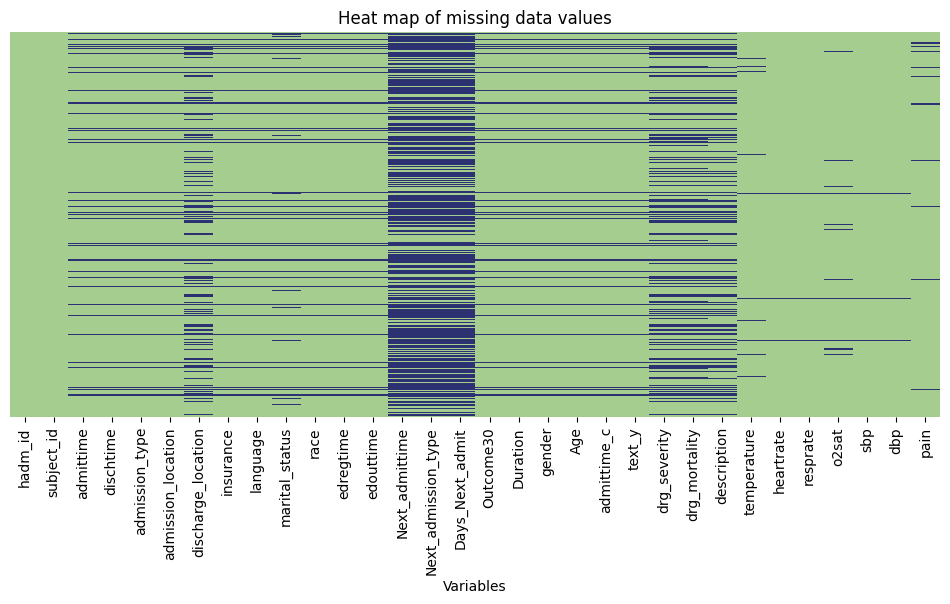

In [ ]:
# Visualize missing data values using a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df_3_vitals.isnull(),  yticklabels=False, cbar=False, cmap='crest')
plt.title('Heat map of missing data values')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.show()

# Textual Data

In this section, we would attempt to predict hospital readmission with just text data so extracting the text data from the 'df_3' dataset.

In [ ]:
text_df_3 = df_3[['hadm_id', 'text_y', 'description', 'Outcome30']]
text_df_2 = df_2[['hadm_id', 'text_y', 'description', 'Outcome30']]

In [ ]:
# Displaying first 5 rows of the dataset
text_df_3.head()

hadm_id                                             text_y  \
0  20000019  exam: renal ultrasound. clinical information: ...   
1  20000024  indication: _ with weakness // r/o infiltrate ...   
2  20000024  bilateral adrenal glands are normal in appeara...   
3  20000024  present on prior study. multilevel degenerativ...   
4  20000034  examination: renal u.s. indication: _ year old...   

                                         description  Outcome30  
0  septicemia or severe sepsis wo mv 96 hours wo ...          0  
1  red blood cell disorders wo mcc, other anemia ...          0  
2  red blood cell disorders wo mcc, other anemia ...          0  
3  red blood cell disorders wo mcc, other anemia ...          0  
4                                                NaN          0

In [ ]:
# Checking for null values
text_df_3.isnull().sum()

hadm_id             0
text_y              0
description    123063
Outcome30           0
dtype: int64

In [ ]:
# Checking for zero values
text_df_3[text_df_3==0].count()

hadm_id             0
text_y              0
description         0
Outcome30      628169
dtype: int64

*   The 'Outcome30' is the target label so 0 values are valid datapoints as well
*   Rows with a null description would be dropped as that is an important element of this task.

## Data Preprocessing

### Handling missing values

In [ ]:
# Dropping rows with missing diagnoses descriptions
modified_df_3 = text_df_3.dropna(subset=['description'])
modified_df_2 = text_df_2.dropna(subset=['description'])

## Exploratory Data Analysis

In [ ]:
#Checking the count of the entries per label in the Outcome30 variable
modified_df_3['Outcome30'].value_counts()

Outcome30
0    519542
1    109896
Name: count, dtype: int64

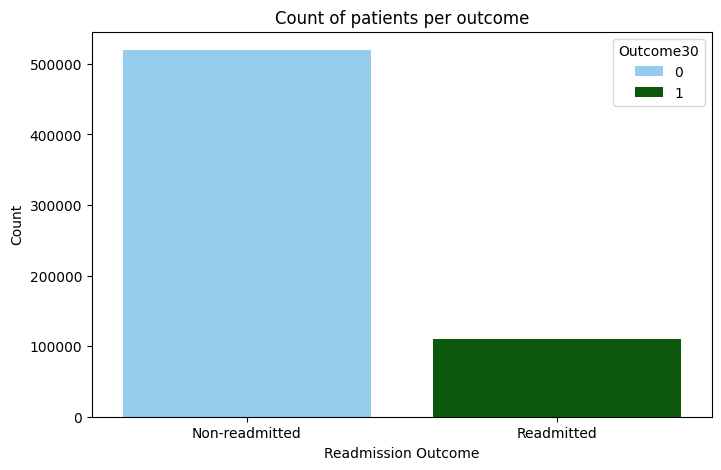

In [ ]:
#Visualizing the outcome of the patients in the dataset
fig = plt.figure(figsize=(8,5))
g = fig.add_gridspec(1,1)
ax = fig.add_subplot(g[0,0])
sns.countplot(data=modified_df_3, x = 'Outcome30', hue='Outcome30', ax= ax, palette = ['lightskyblue','darkgreen'])

ax.set_xlabel("Readmission Outcome")
ax.set_ylabel("Count")
ax.set_xticklabels(["Non-readmitted","Readmitted"])
plt.title('Count of patients per outcome')
plt.show()

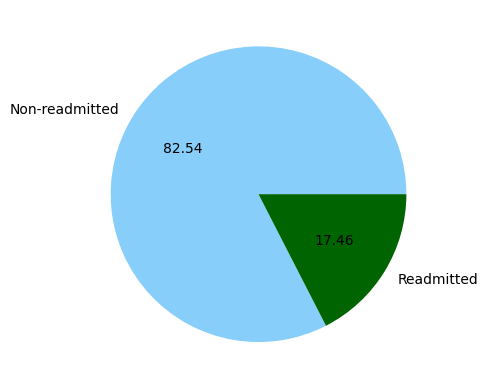

In [ ]:
#Displaying the count of the patients in each group as a pie chart
plt.pie(modified_df_3['Outcome30'].value_counts(), autopct='%.2f', labels=["Non-readmitted","Readmitted"], colors=['lightskyblue','darkgreen'])
plt.show()

The class in the dataset is severely imbalanced so undersampling the '0' class to have a more balanced dataset

## SubSampling

In [ ]:
modified_df_3['Outcome30'].value_counts()

Outcome30
0    519542
1    109896
Name: count, dtype: int64

In [ ]:
modified_df_2['Outcome30'].value_counts()

0    471837
1     98322
Name: Outcome30, dtype: int64

In [ ]:
# Separating entries with outcome 1 and 0

unique_ids = modified_df_3.drop_duplicates(subset=['hadm_id'], keep='first')
readmit_ID = unique_ids[unique_ids['Outcome30'] == 1].hadm_id
not_readmit_ID = unique_ids[unique_ids['Outcome30'] == 0].hadm_id

In [ ]:
#Undersampling the '0' class to get the balanced pos/neg numbers of patients for each dataset
not_readmit_ID_use = not_readmit_ID.sample(n=len(readmit_ID), random_state=1)

#Creating testing/validation datasets
id_val_test_t=readmit_ID.sample(frac=0.2,random_state=1)
id_val_test_f=not_readmit_ID_use.sample(frac=0.2,random_state=1)

In [ ]:
#Extracting just training data by dropping all entries in the test/validation dataset
id_train_t = readmit_ID.drop(id_val_test_t.index)
id_train_f = not_readmit_ID_use.drop(id_val_test_f.index)

In [ ]:
#Seperating testing data from validation data for readmitted outcomes
id_val_t=id_val_test_t.sample(frac=0.5,random_state=1)
id_test_t=id_val_test_t.drop(id_val_t.index)

In [ ]:
#Seperating testing data from validation data for non-readmitted outcomes
id_val_f=id_val_test_f.sample(frac=0.5,random_state=1)
id_test_f=id_val_test_f.drop(id_val_f.index)

In [ ]:
# test if there is overlap between train and test, should return "array([], dtype=int64)"
(pd.Index(id_test_t).intersection(pd.Index(id_train_t))).values

array([], dtype=int64)

In [ ]:
# Combining the sampled IDs with the corresponding labels
id_test = pd.concat([id_test_t, id_test_f])
test_id_label = pd.DataFrame(data = list(zip(id_test, [1]*len(id_test_t)+[0]*len(id_test_f))), columns = ['id','label'])

In [ ]:
# Combining the sampled IDs with the corresponding labels
id_val = pd.concat([id_val_t, id_val_f])
val_id_label = pd.DataFrame(data = list(zip(id_val, [1]*len(id_val_t)+[0]*len(id_val_f))), columns = ['id','label'])

In [ ]:
# Combining the sampled IDs with the corresponding labels
id_train = pd.concat([id_train_t, id_train_f])
train_id_label = pd.DataFrame(data = list(zip(id_train, [1]*len(id_train_t)+[0]*len(id_train_f))), columns = ['id','label'])

In [ ]:
#
df = pd.concat([not_readmit_ID_use, not_readmit_ID])
df = df.drop_duplicates(keep=False)
#check to see if there are overlaps
(pd.Index(df).intersection(pd.Index(not_readmit_ID_use))).values

array([], dtype=int64)

In [ ]:
# Get the actual discharge train/val/test

early_train = modified_df_3[modified_df_3['hadm_id'].isin(train_id_label.id)]
not_readmit_ID_more = df.sample(n=500, random_state=1, replace=True)
early_train_snippets = pd.concat([modified_df_3[modified_df_3['hadm_id'].isin(not_readmit_ID_more)], early_train])

In [ ]:
#shuffle
early_train_snippets = early_train_snippets.sample(frac=1, random_state=1).reset_index(drop=True)
early_train_snippets.to_csv('/content/drive/MyDrive/Dissertation Dataset/3days/train_updated_200.csv')

In [ ]:
early_val = modified_df_3[modified_df_3['hadm_id'].isin(val_id_label.id)]
early_val.to_csv('/content/drive/MyDrive/Dissertation Dataset/3days/val_updated_200.csv')

In [ ]:
# we want to test on admissions that are not discharged already. So for less than 3 days of notes experiment,
# we filter out admissions discharged within 3 days
actionable_ID_3days = unique_ids[unique_ids['Duration'] >= 3].hadm_id
test_actionable_id_label = test_id_label[test_id_label.id.isin(actionable_ID_3days)]
early_test = modified_df_3[modified_df_3['hadm_id'].isin(test_actionable_id_label.id)]

In [ ]:
early_test.to_csv('/content/drive/MyDrive/Dissertation Dataset/3days/test_updated_200.csv')

In [ ]:
#for 2 days notes, we only obtain test set. Since the model parameters are tuned on the val set of 3 days

actionable_ID_2days = unique_ids[unique_ids['Duration'] >= 2].hadm_id
test_actionable_id_label_2days = test_id_label[test_id_label.id.isin(actionable_ID_2days)]
early_test_2days = modified_df_2[modified_df_2['hadm_id'].isin(test_actionable_id_label_2days.id)]

In [ ]:
early_test_2days.to_csv('/content/drive/MyDrive/Dissertation Dataset/2days/test_updated_200.csv')

## Exploring the sampled text data

In [ ]:
# Import the subsampled dataset from google drive
train_text = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/train_updated_200.csv')
test_text = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/test_updated_200.csv')
val_text = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/val_updated_200.csv')

In [ ]:
# train_text = pd.read_csv('train_updated_200.csv')
# test_text = pd.read_csv('test_updated_200.csv')
# val_text = pd.read_csv('val_updated_200.csv')

In [ ]:
# Renaming columns to more suitable names
train_text.rename(columns={'Outcome30': 'labels', 'text_y':'text', 'description':'diagnoses'}, inplace=True)
test_text.rename(columns={'Outcome30': 'labels', 'text_y':'text', 'description':'diagnoses'}, inplace=True)
val_text.rename(columns={'Outcome30': 'labels', 'text_y':'text', 'description':'diagnoses'}, inplace=True)

In [ ]:
# Displaying the first few rows of the training set
train_text.head()

Unnamed: 0.1  Unnamed: 0   hadm_id  \
0             0           0  26129366   
1             1           1  20961338   
2             2           2  20730163   
3             3           3  22444593   
4             4           4  26416503   

                                           diagnoses  \
0  pathological fractures & musculoskelet & conn ...   
1                                 renal failure w cc   
2  coronary bypass wo cardiac cath wo mcc, corona...   
3  cellulitis w mcc, cellulitis & other skin infe...   
4  respiratory system diagnosis w ventilator supp...   

                                                text  labels  
0  of widespread metastatic disease including lar...       0  
1  man with a history of alcoholic cirrhosis and ...       1  
2  pa and lateral chest radiograph dated _ no pri...       1  
3  partially imaged upper abdominal organs demons...       0  
4  involving the thoracic aorta. impression: righ...       1

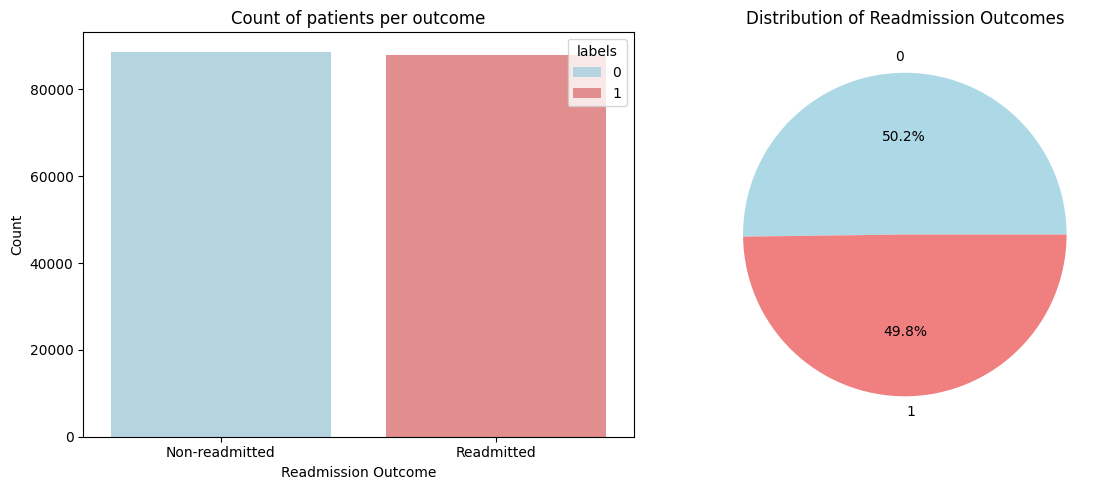

In [ ]:
#Showing value counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
sns.countplot(data=train_text, x='labels', hue='labels', ax=axes[0], palette=['lightblue', 'lightcoral'])
axes[0].set_xlabel("Readmission Outcome")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Non-readmitted", "Readmitted"])
axes[0].set_title('Count of patients per outcome')

# Pie chart
train_text['labels'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], colors=['lightblue', 'lightcoral'])
axes[1].set_title('Distribution of Readmission Outcomes')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
# Concatenate 'text_y' and 'description' into a new column
train_text['combined_text'] = train_text['text'] + ' ' + train_text['diagnoses']
test_text['combined_text'] = test_text['text'] + ' ' + test_text['diagnoses'] #Doing the same for test and validation sets
val_text['combined_text'] = val_text['text'] + ' ' + val_text['diagnoses']

# Text Length Distribution (number of characters in each combined text)
train_text['text_length'] = train_text['combined_text'].apply(len)
test_text['text_length'] = test_text['combined_text'].apply(len)
val_text['text_length'] = val_text['combined_text'].apply(len)


In [ ]:
# Displaying the length of the longest text in each set

print(f"Longest string in training set: {train_text['text_length'].max()}")
print(f"Longest string in testing set: {test_text['text_length'].max()}")
print(f"Longest string in validation set: {val_text['text_length'].max()}")

Longest string in training set: 1726
Longest string in testing set: 1684
Longest string in validation set: 1728


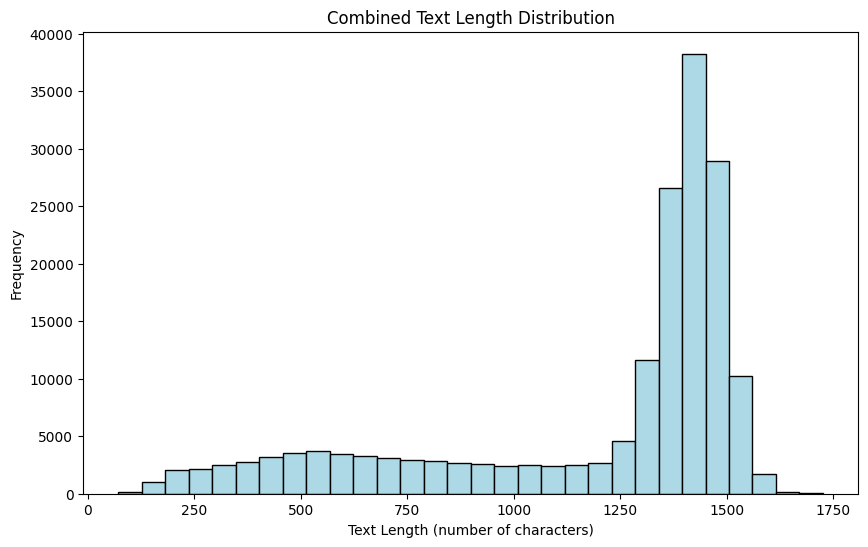

In [ ]:
# Plotting text length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_text['text_length'], bins=30, color='lightblue', edgecolor='black')
plt.title('Combined Text Length Distribution')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# Clean and preprocess the text to remove any special characters that may have been missed
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Preprocess the combined text column
train_text['cleaned_text'] = train_text['combined_text'].apply(preprocess_text)
test_text['cleaned_text'] = test_text['combined_text'].apply(preprocess_text)
val_text['cleaned_text'] = val_text['combined_text'].apply(preprocess_text)

Most Common Words: [('right', 315314), ('left', 267457), ('chest', 183032), ('findings', 164709), ('normal', 163847), ('w', 163173), ('impression', 149198), ('comparison', 146344), ('evidence', 132965), ('ct', 132457), ('seen', 119060), ('indication', 117605), ('small', 109852), ('contrast', 108911), ('cm', 103396), ('technique', 101726), ('pleural', 97461), ('mcc', 97207), ('within', 97196), ('without', 92149)]


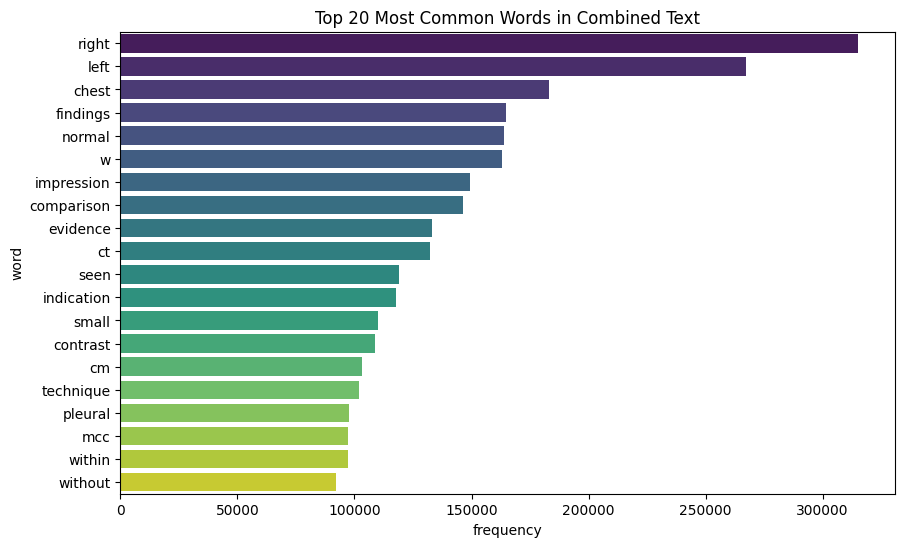

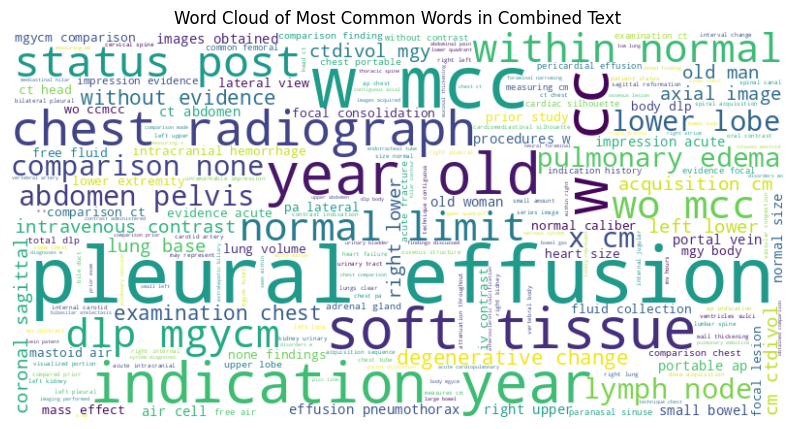

In [ ]:
# Word Frequency Analysis for the combined text
all_words = ' '.join([str(text) for text in train_text['cleaned_text']])
word_freq = Counter(all_words.split())

# Display the top 20 most common words
common_words = word_freq.most_common(20)
print("Most Common Words:", common_words)

# Plotting the top 20 most common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words in Combined Text')
plt.show()

# Word Cloud Visualization for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Combined Text')
plt.show()


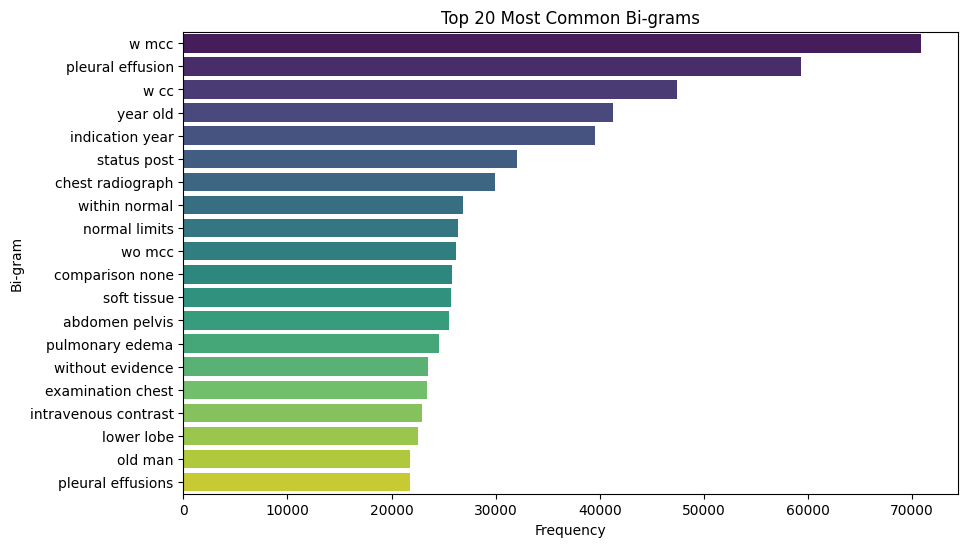

In [ ]:
# Function to preprocess and tokenize text
def preprocess_text_to_tokens(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Generate bi-grams
def get_ngrams(text_tokens, n=2):
    return list(ngrams(text_tokens, n))

# Assuming 'combined_text' is a column in your DataFrame
# Preprocess and tokenize text
train_text['tokenized_text'] = train_text['combined_text'].apply(preprocess_text_to_tokens)

# Generate bi-grams
train_text['bi_grams'] = train_text['tokenized_text'].apply(lambda tokens: get_ngrams(tokens, n=2))

# Flatten the list of all bi-grams across all rows
all_bi_grams = [bi_gram for sublist in train_text['bi_grams'] for bi_gram in sublist]

# Get the frequency of bi-grams
bi_gram_freq = Counter(all_bi_grams)

# Display the 20 most common bi-grams
common_bi_grams = bi_gram_freq.most_common(20)

# Convert the most common bi-grams to a DataFrame
common_bi_grams_df = pd.DataFrame(common_bi_grams, columns=['bi_gram', 'frequency'])

# Plot the most common bi-grams
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y=common_bi_grams_df['bi_gram'].apply(lambda x: ' '.join(x)), data=common_bi_grams_df, palette='viridis')
plt.title('Top 20 Most Common Bi-grams')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()


## Modelling with just text data

In [ ]:
#Extracting just id, label and combined text data
training_text = train_text[['hadm_id','cleaned_text', 'labels']]
testing_text = test_text[['hadm_id','cleaned_text', 'labels']]
validation_text = val_text[['hadm_id', 'cleaned_text', 'labels']]

In [ ]:
#Converting to a format that is compatible with hugging face
hf_trainingtext = Dataset.from_pandas(training_text)
hf_testingtext = Dataset.from_pandas(testing_text)
hf_validationtext = Dataset.from_pandas(validation_text)

In [ ]:
# Displaying features
hf_trainingtext.features

{'hadm_id': Value(dtype='int64', id=None),
 'cleaned_text': Value(dtype='string', id=None),
 'labels': Value(dtype='int64', id=None)}

### Using PubMedBert

In [ ]:
# Specifying model name
model_name = 'pritamdeka/PubMedBERT-MNLI-MedNLI'
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/415 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
# Defining tokenizing function
def tokenize_function(example):
    return tokenizer(example['cleaned_text'], truncation=True, padding=True, max_length=512)

In [ ]:
# Tokenizing training set
tokenized_train = hf_trainingtext.map(tokenize_function, batched=True)
tokenized_train

Map:   0%|          | 0/176622 [00:00<?, ? examples/s]

Dataset({
    features: ['hadm_id', 'cleaned_text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 176622
})

In [ ]:
# Tokenizing testing set
tokenized_test = hf_testingtext.map(tokenize_function, batched=True)
tokenized_test

Map:   0%|          | 0/18909 [00:00<?, ? examples/s]

Dataset({
    features: ['hadm_id', 'cleaned_text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 18909
})

In [ ]:
# Tokenizing validation set
tokenized_val = hf_validationtext.map(tokenize_function, batched=True)
tokenized_val

Map:   0%|          | 0/21872 [00:00<?, ? examples/s]

Dataset({
    features: ['hadm_id', 'cleaned_text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 21872
})

In [ ]:
# Importing the data collator to pad the inputs to the same length
from transformers import DataCollatorWithPadding

# Initializing the data collator with the tokenizer
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Getting the first 8 samples from the tokenized training set
samples = tokenized_train[:8]

# Removing the unnecessary columns
samples = {k: v for k, v in samples.items() if k not in ['hadm_id', 'cleaned_text']}

# Checking the length of the input ids for each sample
[len(x) for x in samples["input_ids"]]

[246, 246, 246, 246, 246, 246, 246, 246]

In [ ]:
# Running a test to see how the batching works
# Using the data collator to pad the samples to the same length
batch = data_collator(samples)

# Checking the shape of each key in the batch
{k:v.shape for k,v in batch.items()}

{'labels': torch.Size([8]),
 'input_ids': torch.Size([8, 246]),
 'token_type_ids': torch.Size([8, 246]),
 'attention_mask': torch.Size([8, 246])}

#### Fine tuning

In [ ]:
# Creating a class that saves the evaluation results to each checkpoint
class EvalSaveCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        # Save the evaluation metrics to a TXT file
        output_dir = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        with open(os.path.join(output_dir, "eval_results.txt"), "w") as f:
            json.dump(metrics, f)

In [ ]:
# Training arguments for the model
training_args = TrainingArguments(
    output_dir="PMB_MNLI_acc",
    do_train=True,
    do_eval=True,
    eval_strategy='steps',
    eval_steps=4000,
    save_strategy='steps',
    save_steps=4000,
    learning_rate=5e-5,
    num_train_epochs=5,
    per_device_train_batch_size= 32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,     # Enable loading the best model at the end
    metric_for_best_model="accuracy", # Specify the metric to use for selecting the best model
    greater_is_better=False,
    )

In [ ]:
#Loading the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, ignore_mismatched_sizes=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at pritamdeka/PubMedBERT-MNLI-MedNLI and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Loading the evaluation metrics
import evaluate

# Define metrics
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
roc_auc = evaluate.load("roc_auc")

In [ ]:
# Function to return the metrics
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    metric = evaluate.combine([accuracy, f1, precision, recall])
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# Defining the trainer
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EvalSaveCallback()]
)

In [ ]:
#Training the model with just text data
trainer.train()

In [ ]:
# Saving the trained model to be used for evaluation
trainer.save_model(output_dir='PMB_MNLI_acc/model')

#### Model Evaluation

In [ ]:
# Loading the saved model
PMB_model_path = '/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/PMB_model'
PMB_model = AutoModelForSequenceClassification.from_pretrained(PMB_model_path)
PMB_tokenizer = AutoTokenizer.from_pretrained(PMB_model_path)

In [ ]:
#Using the trainer class to make predictions
trainer = Trainer(
    model = PMB_model,
    tokenizer = PMB_tokenizer)

In [ ]:
# Make predictions
predictions = trainer.predict(tokenized_test)

In [ ]:
predictions

PredictionOutput(predictions=array([[-0.41031492,  0.54506725],
       [-0.6820982 ,  0.66176283],
       [-0.4561916 ,  0.44726562],
       ...,
       [-0.5817001 ,  0.59626573],
       [-0.75274336,  0.68533283],
       [-0.18443108,  0.34557906]], dtype=float32), label_ids=array([1, 1, 1, ..., 0, 0, 0]), metrics={'test_loss': 0.6868203282356262, 'test_model_preparation_time': 0.006, 'test_runtime': 416.8779, 'test_samples_per_second': 45.359, 'test_steps_per_second': 5.671})

In [ ]:
# Extracting predictions, prediction scores and actual labels from output
pred_labels = np.argmax(predictions.predictions, axis=-1)
actuals = predictions.label_ids
pred_scores = softmax(predictions.predictions, axis=-1)[:,1]

In [ ]:
# Computing metrics
PMB_results = metrics(actuals, pred_labels, pred_scores)

In [ ]:
print(PMB_results)

{'Accuracy': 0.6007192342270876, 'Recall/Sensitivity': 0.7096774193548387, 'Precision': 0.5975494816211122, 'Specificity': 0.4828231667033693, 'F1-Score': 0.6488045399572053, 'ROC_AUC': 0.6394622678123207, 'MCC': 0.19786544627602298, 'Confusion Matrix': {'TN': 4385, 'FP': 4697, 'FN': 2853, 'TP': 6974}, 'cm': array([[4385, 4697],
       [2853, 6974]])}


In [ ]:
# Displaying results
PMB_results

{'Accuracy': 0.6007192342270876,
 'Recall/Sensitivity': 0.7096774193548387,
 'Precision': 0.5975494816211122,
 'Specificity': 0.4828231667033693,
 'F1-Score': 0.6488045399572053,
 'ROC_AUC': 0.6394622678123207,
 'MCC': 0.19786544627602298,
 'Confusion Matrix': {'TN': 4385, 'FP': 4697, 'FN': 2853, 'TP': 6974},
 'cm': array([[4385, 4697],
        [2853, 6974]])}

In [ ]:
# Storing results in a dataframe
PMB_metrics_df = pd.DataFrame(list(PMB_results.items()), columns=['Metric', 'Value'])

In [ ]:
PMB_metrics_df.iloc[:-1]

Metric     Value
0            Accuracy  0.599609
1  Recall/Sensitivity  0.688104
2           Precision  0.600106
3         Specificity  0.503854
4            F1-Score    0.6411
5             ROC_AUC  0.642796
6                 MCC  0.195438

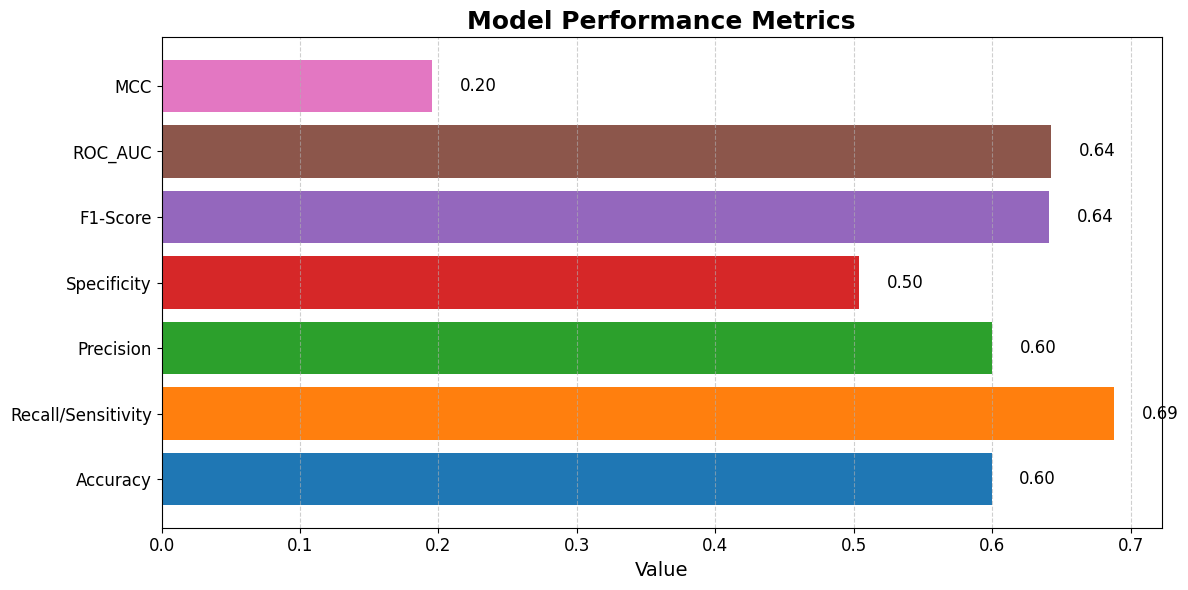

In [ ]:
# Plotting a bar chart showing the model performance

# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(PMB_metrics_df.iloc[:-1]['Metric'], PMB_metrics_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('Model Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

#Save the image
plt.savefig("pmb_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


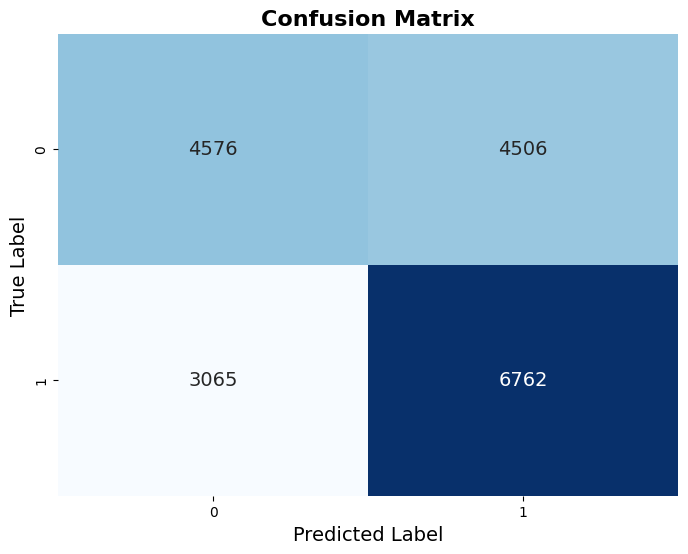

In [ ]:
# Plotting confusion matrix plot
cm = confusion_matrix(actuals, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("pmb_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


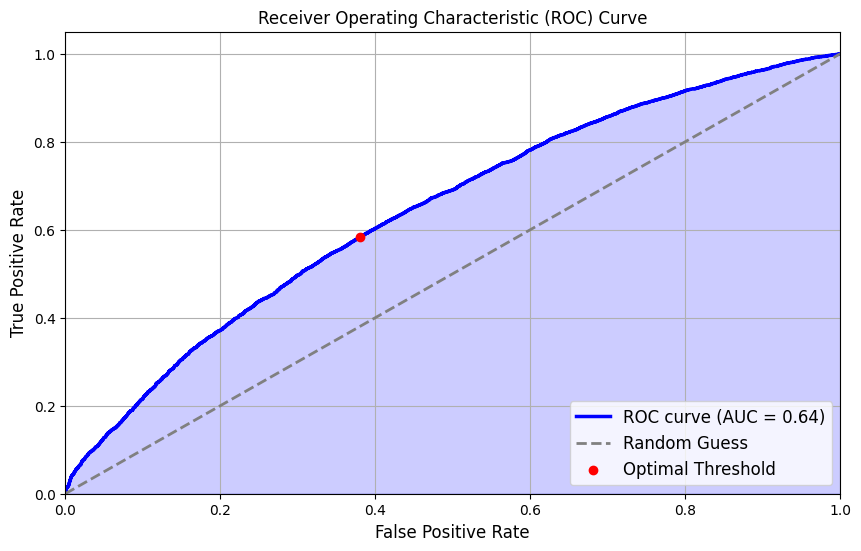

In [ ]:
# Plotting ROC Curve
plot_roc_auc(actuals, pred_scores, PMB_results['ROC_AUC'], filename="pmb_roc_auc.png", plot_title="Receiver Operating Characteristic (ROC) Curve")

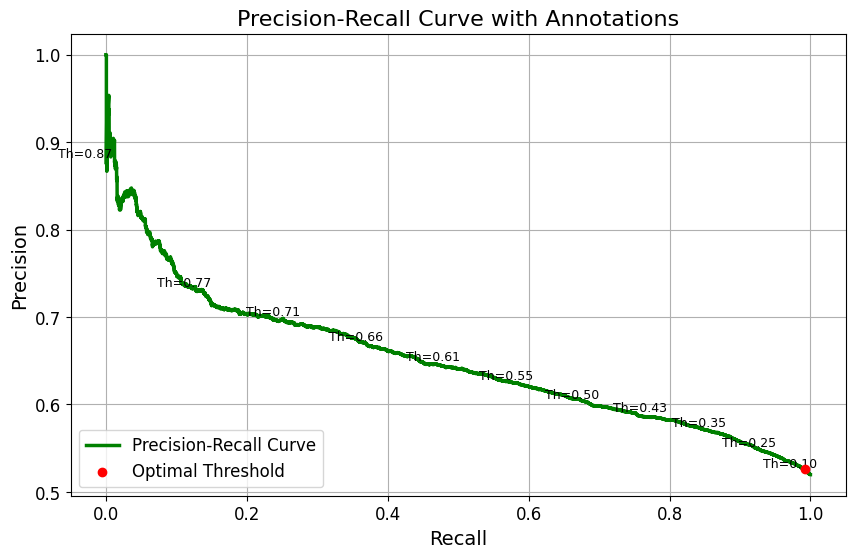

In [ ]:
# Plotting precision recall curve
plot_precision_recall(actuals, pred_scores, filename="pmb_pr_rec.png", plot_title="Precision-Recall Curve with Annotations")

# Tabular + Textual Data

## Exploratory Data Analysis

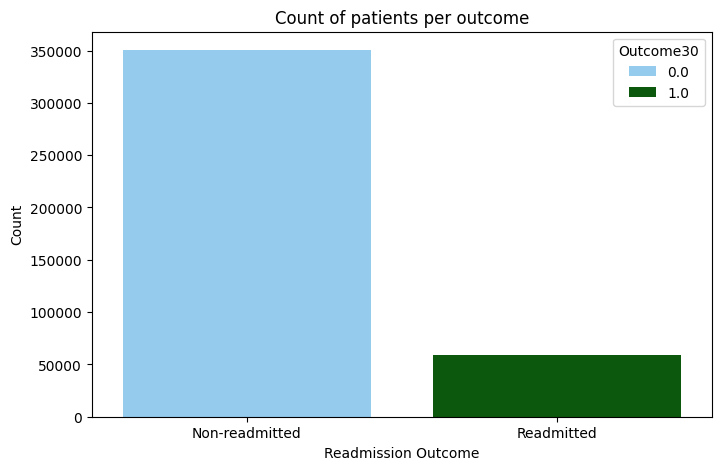

In [ ]:
#Visualizing the outcome of the patients in the dataset with vital signs
fig = plt.figure(figsize=(8,5))
g = fig.add_gridspec(1,1)
ax = fig.add_subplot(g[0,0])
sns.countplot(data=df_3_vitals, x = 'Outcome30', hue='Outcome30', ax= ax, palette = ['lightskyblue','darkgreen'])

ax.set_xlabel("Readmission Outcome")
ax.set_ylabel("Count")
ax.set_xticklabels(["Non-readmitted","Readmitted"])
plt.title('Count of patients per outcome')
plt.show()

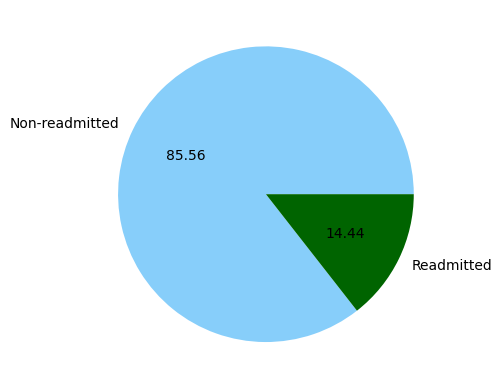

In [ ]:
#Displaying the count of the patients in each group as a pie chart
plt.pie(df_3_vitals['Outcome30'].value_counts(), autopct='%.2f', labels=["Non-readmitted","Readmitted"], colors=['lightskyblue','darkgreen'])
plt.show()

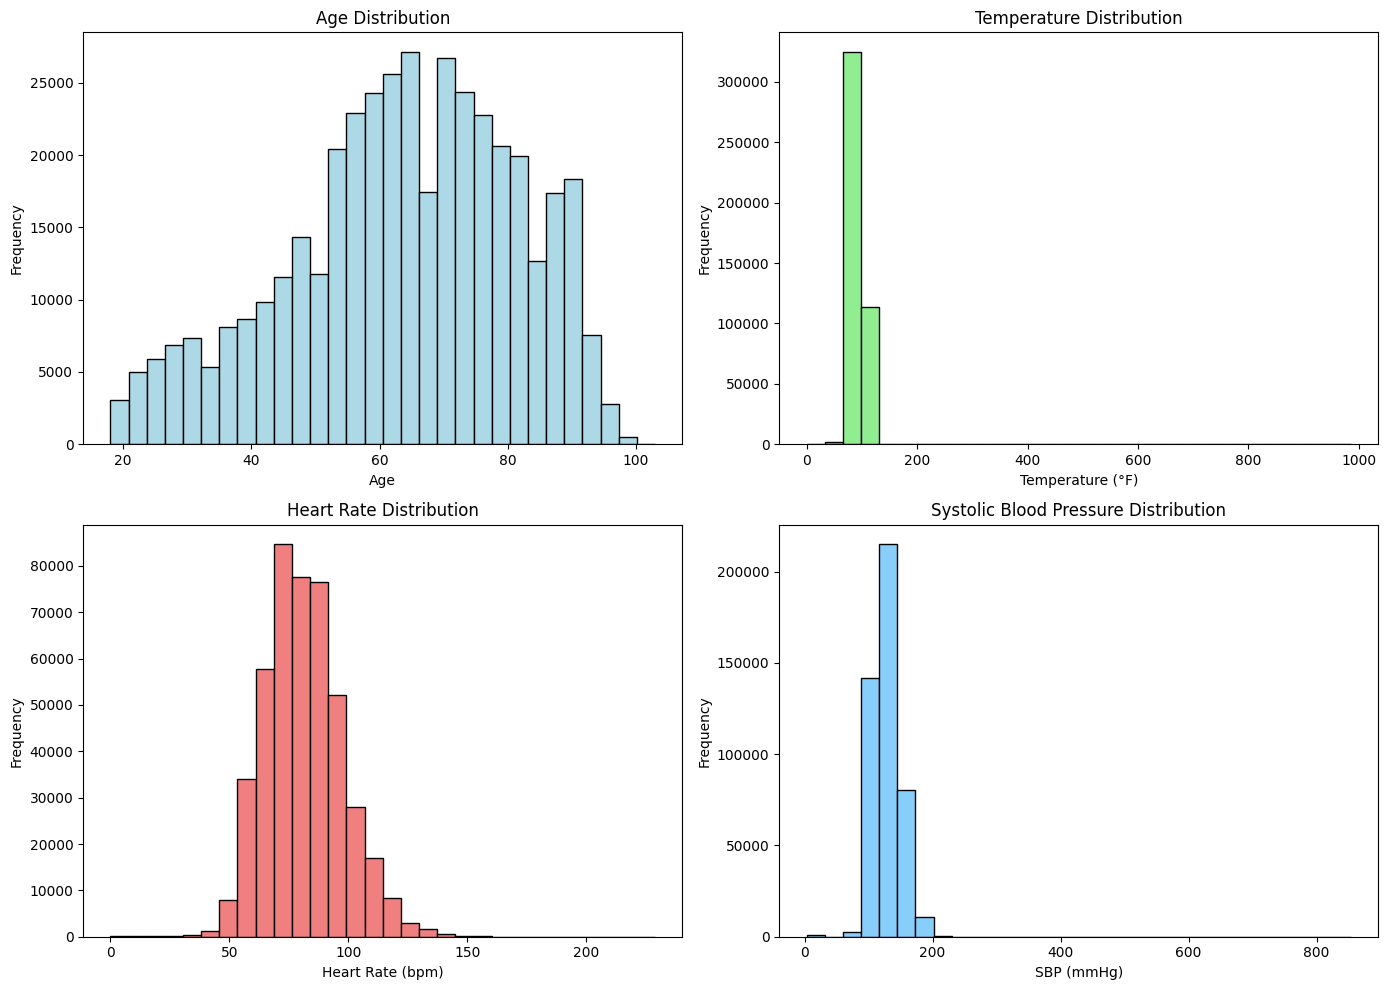

In [ ]:
# Plotting histograms for key variables: Age, temperature, heartrate, etc.
plt.figure(figsize=(14, 10))

# Age distribution
plt.subplot(2, 2, 1)
plt.hist(df_3_vitals['Age'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Temperature distribution
plt.subplot(2, 2, 2)
plt.hist(df_3_vitals['temperature'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Heart rate distribution
plt.subplot(2, 2, 3)
plt.hist(df_3_vitals['heartrate'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

# Systolic blood pressure distribution
plt.subplot(2, 2, 4)
plt.hist(df_3_vitals['sbp'].dropna(), bins=30, color='lightskyblue', edgecolor='black')
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('SBP (mmHg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

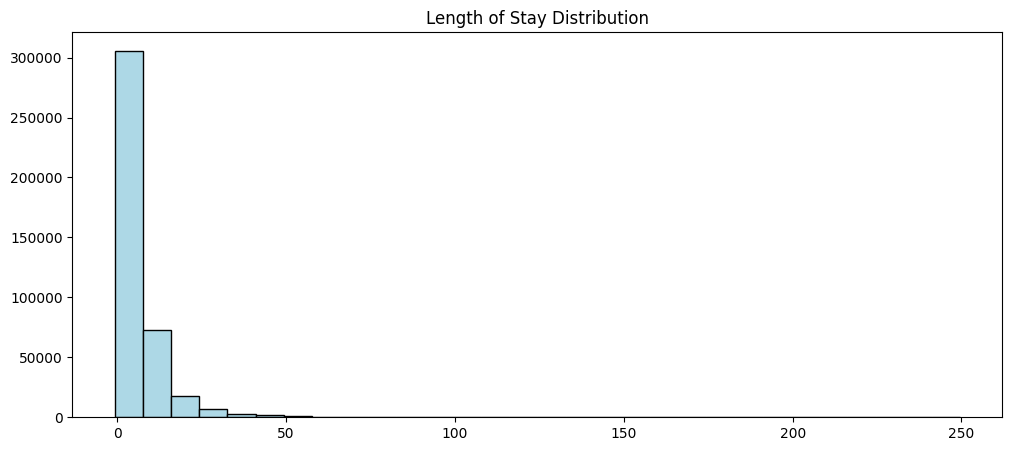

In [ ]:
# Plot the distribution of the patients by Length of Stay
fig = plt.figure(figsize=(12,5))
plt.hist(df_3_vitals['Duration'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Length of Stay Distribution')
plt.show()

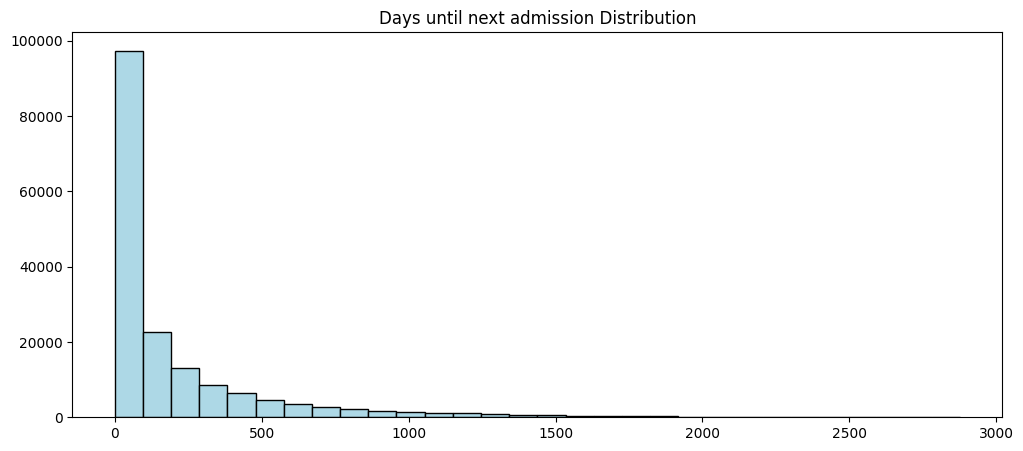

In [ ]:
# Plot the distribution of the patients by days until next admission
fig = plt.figure(figsize=(12,5))
plt.hist(df_3_vitals['Days_Next_admit'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Days until next admission Distribution')
plt.show()

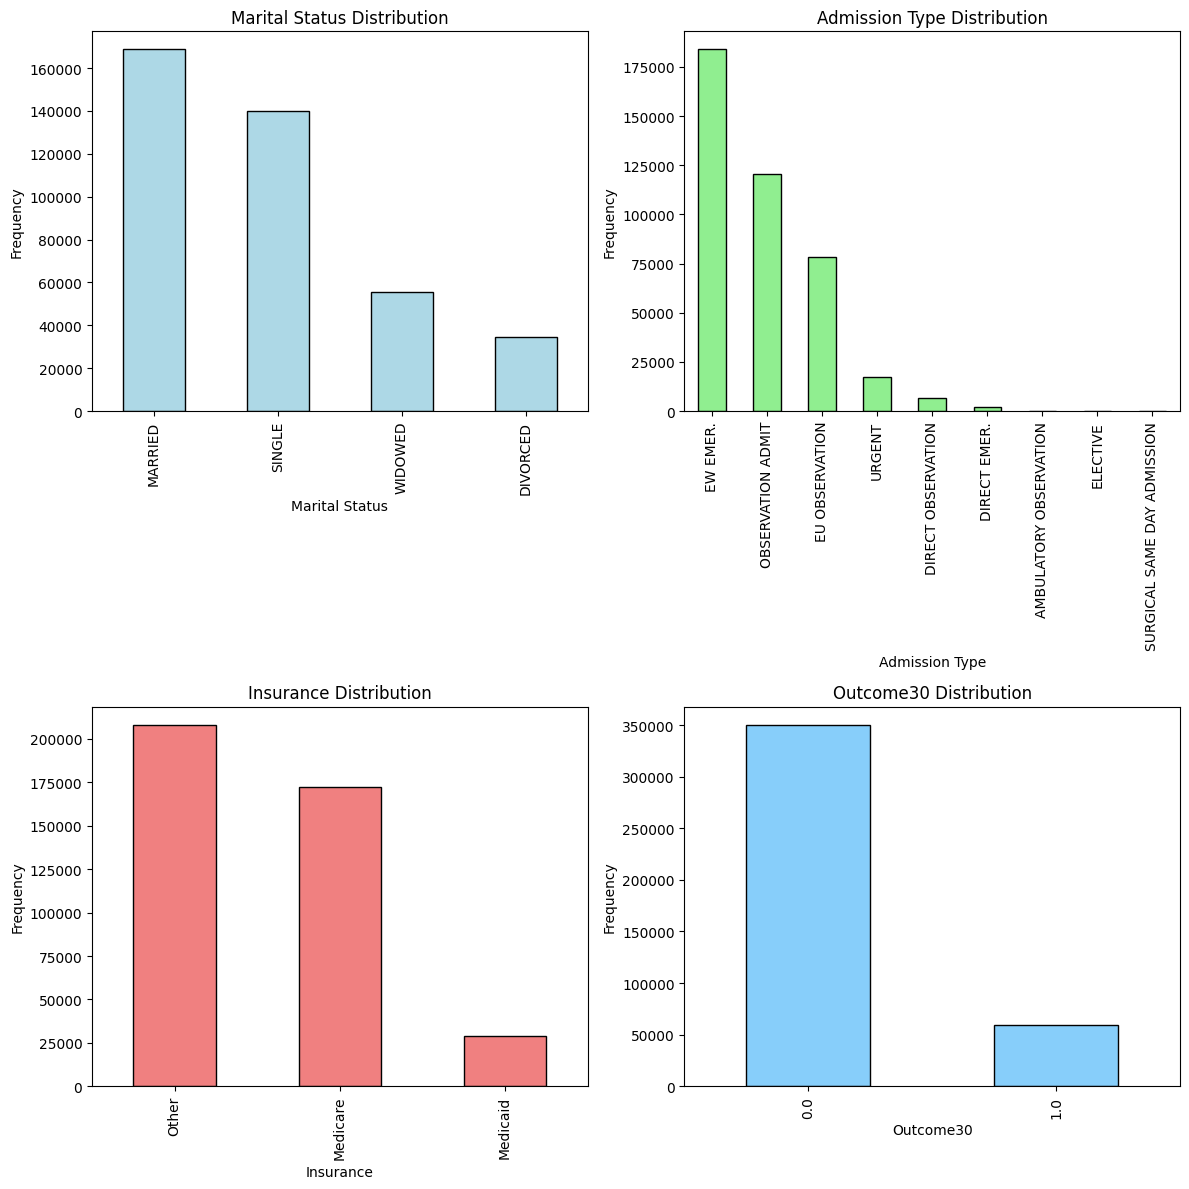

In [ ]:
# Plotting distribution of key categorical variables
plt.figure(figsize=(12, 12))

# Marital status distribution
plt.subplot(2, 2, 1)
df_3_vitals['marital_status'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

# Admission type distribution
plt.subplot(2, 2, 2)
df_3_vitals['admission_type'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')

# Outcome30 distribution
plt.subplot(2, 2, 3)
df_3_vitals['insurance'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Insurance Distribution')
plt.xlabel('Insurance')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
df_3_vitals['Outcome30'].value_counts().plot(kind='bar', color='lightskyblue', edgecolor='black')
plt.title('Outcome30 Distribution')
plt.xlabel('Outcome30')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

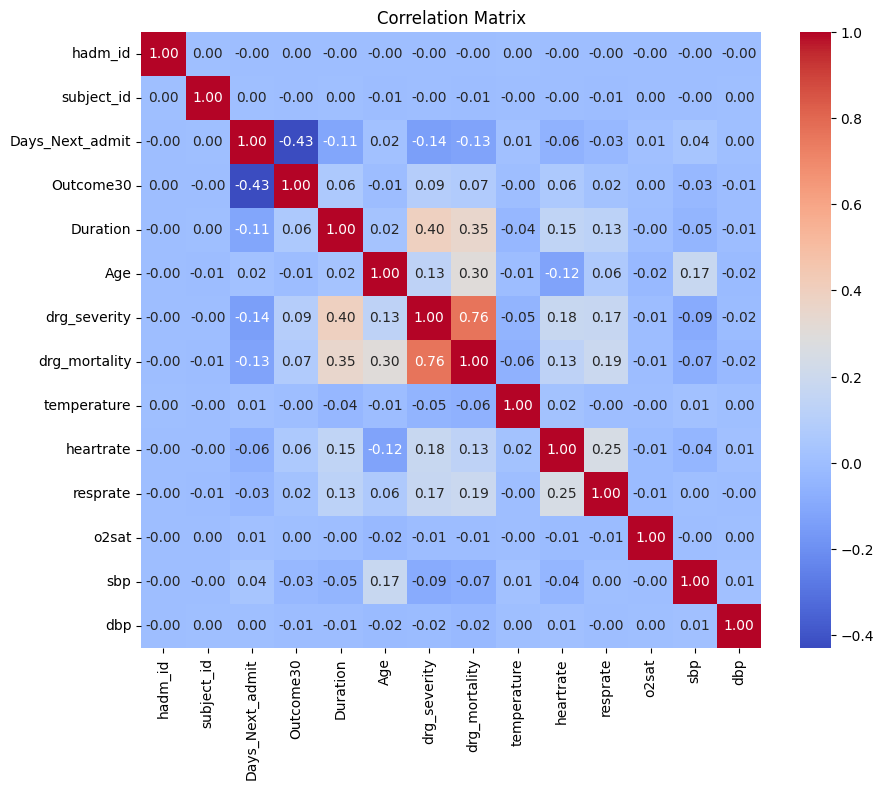

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_3_vitals.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Data Preprocessing

### Handling missing values

Checking the 'language' variable, there are some '?' values. Since every other value is 'ENGLISH', I would make it all English

In [ ]:
df_3_vitals['language'].value_counts()

language
ENGLISH    361329
?           48247
Name: count, dtype: int64

1. The following columns would be dropped because I don't believe they are valuable to the task at hand

*   Admittime
*   Dischtime
*   edregtime
*   edouttime
*   Next_admittime
*   subject_id
*   admittime_c

2. Next admission type and Days until next admission.

*   Next admission type helped to determine readmission outcome and is kind of a tell tale sign that readmission occurs
*   Days until next readmission also is a tell tale sign that readmission occurs.

For both variables, the null values are for values that have the readmission outcome as 0 so dropping both as well

3. Marital Status and Discharge Location

*   Imputing marital status with the most frequent value
*   Imputing missing discharge location with 'Unknown'

4. Temperature and Pain
*   Temperature variable has too many missing values so dropping
*   The pain variable has too many inconsistent values so dropping as well

5. Null diagnoses
*   Columns with null diagnoses descriptions were dropped as well as that is a very important aspect of this task


In [ ]:
def clean_data(dataset):
    # Converting all ? values to ENGLISH
    dataset['language'] = dataset['language'].replace('?', 'ENGLISH')

    #Dropping unnecessary columns
    df = dataset.drop(columns=['edregtime', 'edouttime', 'subject_id', 'admittime', 'dischtime', 'Next_admittime', 'admittime_c', 'Next_admission_type', 'Days_Next_admit', 'temperature', 'pain'])

    #Dealing with missing values
    imputer = ColumnTransformer(
        transformers=[
            ('mode', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['marital_status']),
        ],
       remainder='passthrough'  # This will pass through other columns not specified in this transformer
    )

    cleaned_df = imputer.fit_transform(df)
    cleaned_df = pd.DataFrame(cleaned_df, columns=['marital_status', 'hadm_id', 'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'race', 'Outcome30', 'Duration',
       'gender', 'Age', 'text_y', 'drg_severity', 'drg_mortality', 'description', 'heartrate', 'resprate', 'o2sat', 'sbp',
       'dbp'])

    # Filling the null values under the discharge location with Unknown
    cleaned_df['discharge_location'] = cleaned_df['discharge_location'].fillna('Unknown')

    #Dropping the entries that have null diagnosis description
    cleaned_df.dropna(subset=['description'], inplace=True)

    #Filling the null values for 'drg_severity', 'drg_mortality' and pain with 0
    cleaned_df['drg_severity'] = cleaned_df['drg_severity'].fillna(0)
    cleaned_df['drg_mortality'] = cleaned_df['drg_mortality'].fillna(0)
    # cleaned_df['pain'] = cleaned_df['pain'].fillna(0)

    cleaned_df = cleaned_df.dropna(subset=['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp'])

    return cleaned_df

In [ ]:
#Cleaning all the datasets
cleaned_df_3_vitals = clean_data(df_3_vitals)
cleaned_df_2_vitals = clean_data(df_2_vitals)

In [ ]:
cleaned_df_3_vitals.head()

marital_status   hadm_id admission_type      admission_location  \
0        WIDOWED  22595853         URGENT  TRANSFER FROM HOSPITAL   
1        WIDOWED  22595853         URGENT  TRANSFER FROM HOSPITAL   
2        WIDOWED  22595853         URGENT  TRANSFER FROM HOSPITAL   
3        WIDOWED  22841357       EW EMER.          EMERGENCY ROOM   
4        WIDOWED  22841357       EW EMER.          EMERGENCY ROOM   

  discharge_location insurance language   race Outcome30  Duration  ...   Age  \
0               HOME     Other  ENGLISH  WHITE       0.0  0.786111  ...  52.0   
1               HOME     Other  ENGLISH  WHITE       0.0  0.786111  ...  52.0   
2               HOME     Other  ENGLISH  WHITE       0.0  0.786111  ...  52.0   
3               HOME  Medicaid  ENGLISH  WHITE       1.0  1.015278  ...  52.0   
4               HOME  Medicaid  ENGLISH  WHITE       1.0  1.015278  ...  52.0   

                                              text_y drg_severity  \
0  examination: chest (pa and lat) indication: _ ...          2.0   
1  gas. spleen: normal echogenicity, measuring 5 ...          2.0   
2  a 5 _ catheter was advanced into the largest f...          2.0   
3  examination: liver or gallbladder us (single o...          3.0   
4  clips are again seen projecting over the left ...          3.0   

   drg_mortality                                        description heartrate  \
0            2.0  disorders of liver except malig,cirr,alc hepa ...      79.0   
1            2.0  disorders of liver except malig,cirr,alc hepa ...      79.0   
2            2.0  disorders of liver except malig,cirr,alc hepa ...      79.0   
3            2.0  disorders of liver except malig,cirr,alc hepa ...      86.0   
4            2.0  disorders of liver except malig,cirr,alc hepa ...      86.0   

  resprate o2sat    sbp   dbp  
0     16.0  98.0  107.0  60.0  
1     16.0  98.0  107.0  60.0  
2     16.0  98.0  107.0  60.0  
3     17.0  93.0   96.0  57.0  
4     17.0  93.0   96.0  57.0  

[5 rows x 21 columns]

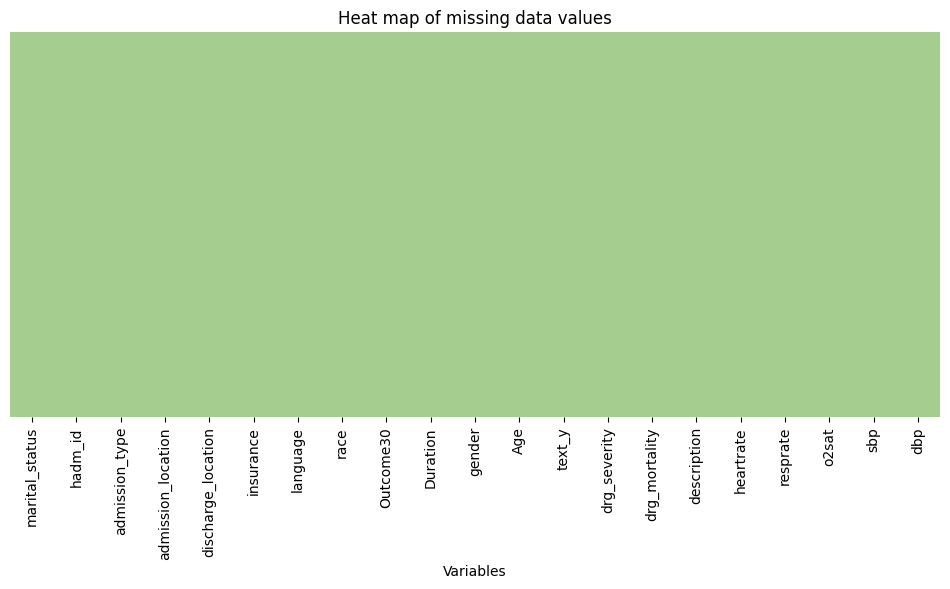

In [ ]:
# Checking missing data values after data cleaning using a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(cleaned_df_3_vitals.isnull(),  yticklabels=False, cbar=False, cmap='crest')
plt.title('Heat map of missing data values')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

Now that the null values are all taken care of, some features need to be modified

1. The Duration dataset needs to be rounded up to whole days. It represents patient length of stay which is calculated in whole days usually
2. The values of the admission type have multiple values saying the same thing: 'EW EMER.', 'URGENT', DIRECT EMER.' can all be represented as Emergency
3. Another feature with a lot of values is race and these will be grouped into 7 values

In [ ]:
def change_data(dataset):
    #Changing the duration of stay for each patient from float to integers
    dataset['Duration'] = dataset['Duration'].apply(np.ceil)

    #Consolidating the values of the admission type column
    values1 = ['EW EMER.', 'URGENT', 'DIRECT EMER.']
    values2 = ['OBSERVATION ADMIT', 'EU OBSERVATION', 'DIRECT OBSERVATION', 'AMBULATORY OBSERVATION']
    dataset['admission_type'] = dataset['admission_type'].apply(lambda x: 'EMERGENCY' if x in values1 else ('OBSERVATION' if x in values2 else x))

    #Consolidating the races into 7 main values
    groups = {
        'BLACK': ['BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN', 'BLACK/AFRICAN', 'BLACK/CARIBBEAN ISLAND'],
        'HISPANIC':['HISPANIC OR LATINO', 'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - CENTRAL AMERICAN', 'HISPANIC/LATINO - MEXICAN', \
                 'SOUTH AMERICAN', 'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC/LATINO - GUATEMALAN', 'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - CUBAN'],
        'ASIAN': ['ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - SOUTH EAST ASIAN', 'ASIAN - KOREAN', 'ASIAN - CHINESE'],
        'WHITE': ['WHITE', 'WHITE - OTHER EUROPEAN', 'WHITE - EASTERN EUROPEAN', 'WHITE - BRAZILIAN', 'WHITE - RUSSIAN', 'PORTUGUESE'],
        'OTHER': ['PATIENT DECLINED TO ANSWER', 'UNKNOWN', 'UNABLE TO OBTAIN', 'OTHER', 'MULTIPLE RACE/ETHNICITY'],
        'HAWAIIAN': ['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'],
        'AMERINDIAN': ['AMERICAN INDIAN/ALASKA NATIVE']
    }
    assign_race = lambda race: next((group_name for group_name, race_list in groups.items() if race in race_list), 'race')
    dataset['race'] = dataset['race'].apply(assign_race)

    #Changing the datatypes of the numeric columns from object to int64
    dataset[['Age', 'Duration', 'Outcome30']] = dataset[['Age', 'Duration', 'Outcome30']].astype(int)

    #Changing the datatypes of the numeric columns from object to float
    dataset[['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']] = dataset[['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']].astype(float)

    #Changing the case of categorical values to lower case
    # dataset[['marital_status', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'race', 'gender']] = dataset[['marital_status', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'race', 'gender']].str.lower()

    return dataset

In [ ]:
modified_df_3_vitals = change_data(cleaned_df_3_vitals)
modified_df_2_vitals = change_data(cleaned_df_2_vitals)

In [ ]:
# Double checking that all features have the correct types
modified_df_3_vitals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316848 entries, 0 to 455455
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   marital_status      316848 non-null  object 
 1   hadm_id             316848 non-null  object 
 2   admission_type      316848 non-null  object 
 3   admission_location  316848 non-null  object 
 4   discharge_location  316848 non-null  object 
 5   insurance           316848 non-null  object 
 6   language            316848 non-null  object 
 7   race                316848 non-null  object 
 8   Outcome30           316848 non-null  int64  
 9   Duration            316848 non-null  int64  
 10  gender              316848 non-null  object 
 11  Age                 316848 non-null  int64  
 12  text_y              316848 non-null  object 
 13  drg_severity        316848 non-null  float64
 14  drg_mortality       316848 non-null  float64
 15  description         316848 non-null  ob

## SubSampling with vital signs

In [ ]:
modified_df_3_vitals['Outcome30'].value_counts()

Outcome30
0    268105
1     48743
Name: count, dtype: int64

In [ ]:
modified_df_2_vitals['Outcome30'].value_counts()

Outcome30
0    244733
1     43686
Name: count, dtype: int64

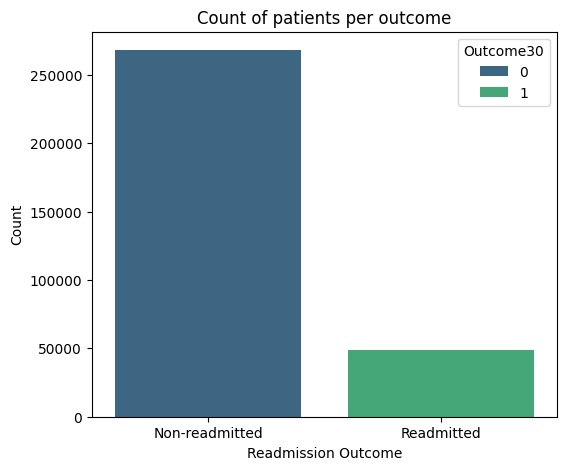

In [ ]:
#Visualizing the outcome of the patients in the dataset
fig = plt.figure(figsize=(6,5))
g = fig.add_gridspec(1,1)
ax = fig.add_subplot(g[0,0])
sns.countplot(data=modified_df_3_vitals, x = 'Outcome30', hue='Outcome30', ax= ax, palette = 'viridis')

ax.set_xlabel("Readmission Outcome")
ax.set_ylabel("Count")
ax.set_xticklabels(["Non-readmitted","Readmitted"])
plt.title('Count of patients per outcome')
plt.show()

The class in the dataset is severely imbalanced so undersampling the '0' class to have a more balanced dataset

In [ ]:
# Separating entries with outcome 1 and 0

unique_ids = modified_df_3_vitals.drop_duplicates(subset=['hadm_id'], keep='first')
readmit_ID = unique_ids[unique_ids['Outcome30'] == 1].hadm_id
not_readmit_ID = unique_ids[unique_ids['Outcome30'] == 0].hadm_id

In [ ]:
#Undersampling the '0' class to get the balanced pos/neg numbers of patients for each dataset
not_readmit_ID_use = not_readmit_ID.sample(n=len(readmit_ID), random_state=1)

#Creating testing/validation datasets
id_val_test_t=readmit_ID.sample(frac=0.2,random_state=1)
id_val_test_f=not_readmit_ID_use.sample(frac=0.2,random_state=1)

In [ ]:
#Extracting just training data by dropping all entries in the test/validation dataset
id_train_t = readmit_ID.drop(id_val_test_t.index)
id_train_f = not_readmit_ID_use.drop(id_val_test_f.index)

In [ ]:
#Seperating testing data from validation data for readmitted outcomes
id_val_t=id_val_test_t.sample(frac=0.5,random_state=1)
id_test_t=id_val_test_t.drop(id_val_t.index)

In [ ]:
#Seperating testing data from validation data for non-readmitted outcomes
id_val_f=id_val_test_f.sample(frac=0.5,random_state=1)
id_test_f=id_val_test_f.drop(id_val_f.index)

In [ ]:
# test if there is overlap between train and test, should return "array([], dtype=int64)"
(pd.Index(id_test_t).intersection(pd.Index(id_train_t))).values

In [ ]:
# Combining the sampled IDs with the corresponding labels
id_test = pd.concat([id_test_t, id_test_f])
test_id_label = pd.DataFrame(data = list(zip(id_test, [1]*len(id_test_t)+[0]*len(id_test_f))), columns = ['id','label'])

In [ ]:
# Combining the sampled IDs with the corresponding labels
id_val = pd.concat([id_val_t, id_val_f])
val_id_label = pd.DataFrame(data = list(zip(id_val, [1]*len(id_val_t)+[0]*len(id_val_f))), columns = ['id','label'])

In [ ]:
# Combining the sampled IDs with the corresponding labels
id_train = pd.concat([id_train_t, id_train_f])
train_id_label = pd.DataFrame(data = list(zip(id_train, [1]*len(id_train_t)+[0]*len(id_train_f))), columns = ['id','label'])

In [ ]:
#
df = pd.concat([not_readmit_ID_use, not_readmit_ID])
df = df.drop_duplicates(keep=False)
#check to see if there are overlaps
(pd.Index(df).intersection(pd.Index(not_readmit_ID_use))).values

In [ ]:
# Get the actual discharge train/val/test

early_train = modified_df_3_vitals[modified_df_3_vitals['hadm_id'].isin(train_id_label.id)]
not_readmit_ID_more = df.sample(n=500, random_state=1, replace=True)
early_train_snippets = pd.concat([modified_df_3_vitals[modified_df_3_vitals['hadm_id'].isin(not_readmit_ID_more)], early_train])

In [ ]:
#shuffle
early_train_snippets = early_train_snippets.sample(frac=1, random_state=1).reset_index(drop=True)
early_train_snippets.to_csv('/content/drive/MyDrive/Dissertation Dataset/3days/train_vitals_200.csv')

In [ ]:
early_val = modified_df_3_vitals[modified_df_3_vitals['hadm_id'].isin(val_id_label.id)]
early_val.to_csv('/content/drive/MyDrive/Dissertation Dataset/3days/val_vitals_200.csv')

In [ ]:
# we want to test on admissions that are not discharged already. So for less than 3 days of notes experiment,
# we filter out admissions discharged within 3 days
actionable_ID_3days = unique_ids[unique_ids['Duration'] >= 3].hadm_id
test_actionable_id_label = test_id_label[test_id_label.id.isin(actionable_ID_3days)]
early_test = modified_df_3_vitals[modified_df_3_vitals['hadm_id'].isin(test_actionable_id_label.id)]

In [ ]:
early_test.to_csv('/content/drive/MyDrive/Dissertation Dataset/3days/test_vitals_200.csv')

In [ ]:
#for 2 days notes, we only obtain test set. Since the model parameters are tuned on the val set of 3 days

actionable_ID_2days = unique_ids[unique_ids['Duration'] >= 2].hadm_id
test_actionable_id_label_2days = test_id_label[test_id_label.id.isin(actionable_ID_2days)]
early_test_2days = modified_df_2_vitals[modified_df_2_vitals['hadm_id'].isin(test_actionable_id_label_2days.id)]

In [ ]:
early_test_2days.to_csv('/content/drive/MyDrive/Dissertation Dataset/2days/test_vitals_200.csv')

## Exploring the sampled data

In [ ]:
#Reimporting the subsampled dataset from google drive
train_ds = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/train_vitals_200.csv')
test_ds = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/test_vitals_200.csv')
val_ds = pd.read_csv('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/val_vitals_200.csv')

In [ ]:
# #Reimport the subsampled dataset from google drive
# train_ds = pd.read_csv('train_vitals_200.csv')
# test_ds = pd.read_csv('test_vitals_200.csv')
# val_ds = pd.read_csv('val_vitals_200.csv')

In [ ]:
# Compressing the values of the admission location
def compress(df):
    df['admission_location']=df['admission_location'].replace({'WALK-IN/SELF REFERRAL':'SELF-REFERRAL', 'TRANSFER FROM SKILLED NURSING FACILITY':'SKILLED NURSING FACILITY', 'INTERNAL TRANSFER TO OR FROM PSYCH':'PSYCH', 'INFORMATION NOT AVAILABLE':'NA', 'AMBULATORY SURGERY TRANSFER':'SURGERY'})
    return df

In [ ]:
train_ds = compress(train_ds)
test_ds = compress(test_ds)
val_ds = compress(val_ds)

In [ ]:
# Renaming column names to more suitable names
train_ds.rename(columns={'Outcome30': 'labels', 'text_y':'text', 'description':'diagnoses'}, inplace=True)
test_ds.rename(columns={'Outcome30': 'labels', 'text_y':'text', 'description':'diagnoses'}, inplace=True)
val_ds.rename(columns={'Outcome30': 'labels', 'text_y':'text', 'description':'diagnoses'}, inplace=True)

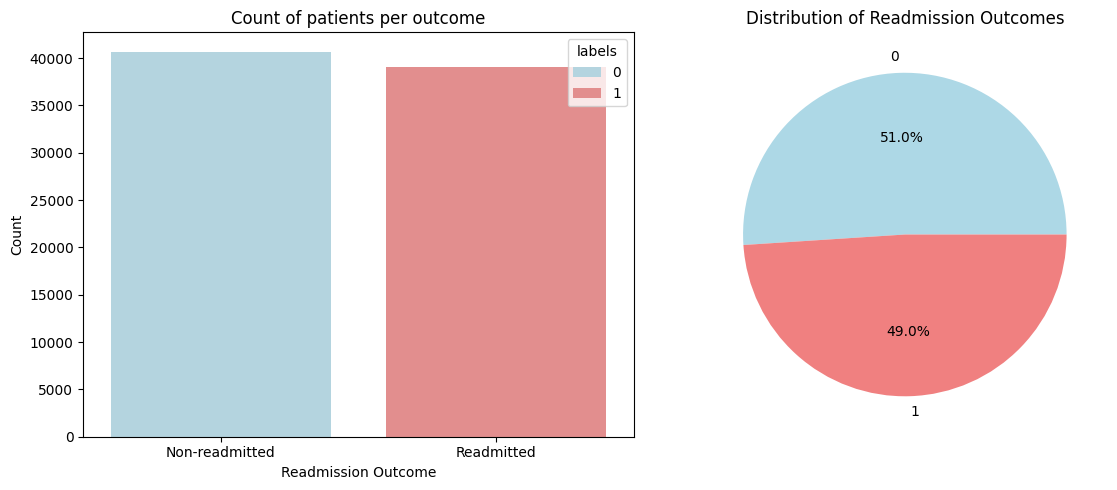

In [ ]:
#Showing value counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
sns.countplot(data=train_ds, x='labels', hue='labels', ax=axes[0], palette=['lightblue', 'lightcoral'])
axes[0].set_xlabel("Readmission Outcome")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Non-readmitted", "Readmitted"])
axes[0].set_title('Count of patients per outcome')

# Pie chart
train_ds['labels'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], colors=['lightblue', 'lightcoral'])
axes[1].set_title('Distribution of Readmission Outcomes')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


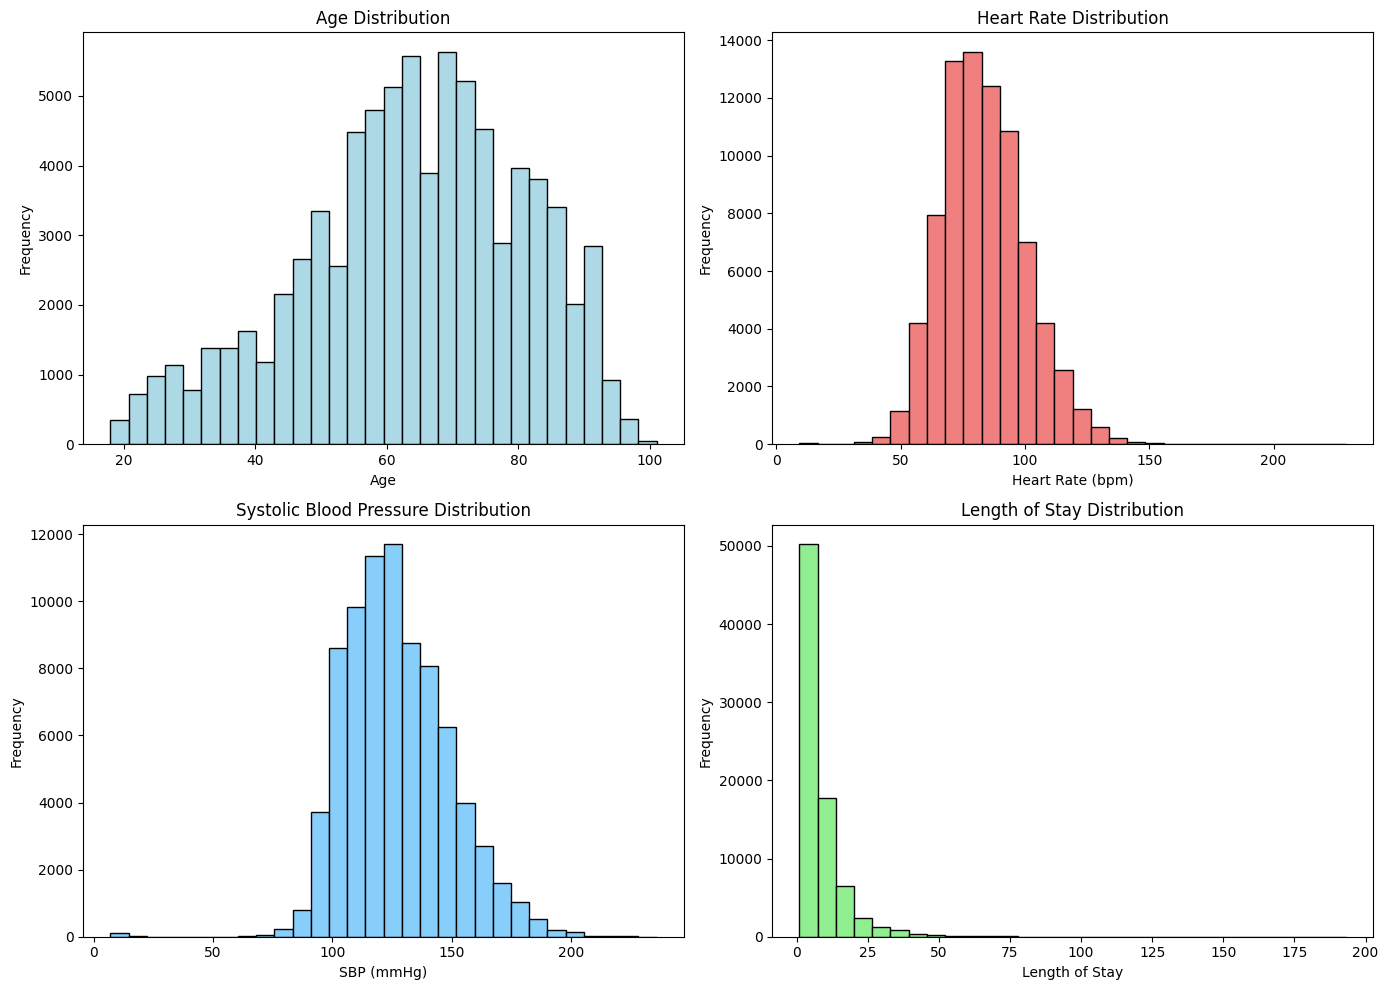

In [ ]:
# Plotting histograms for key variables: Age, temperature, heartrate, etc.
plt.figure(figsize=(14, 10))

# Age distribution
plt.subplot(2, 2, 1)
plt.hist(train_ds['Age'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Heart rate distribution
plt.subplot(2, 2, 2)
plt.hist(train_ds['heartrate'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

# Systolic blood pressure distribution
plt.subplot(2, 2, 3)
plt.hist(train_ds['sbp'].dropna(), bins=30, color='lightskyblue', edgecolor='black')
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('SBP (mmHg)')
plt.ylabel('Frequency')

# Temperature distribution
plt.subplot(2, 2, 4)
plt.hist(train_ds['Duration'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

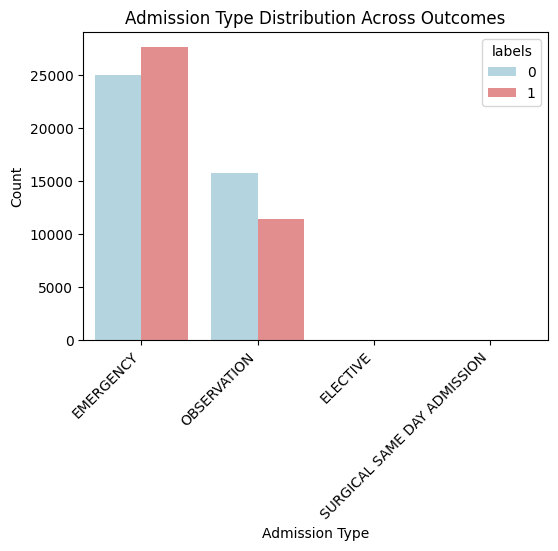

In [ ]:
# Admission type distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='admission_type', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Admission Type Distribution Across Outcomes')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

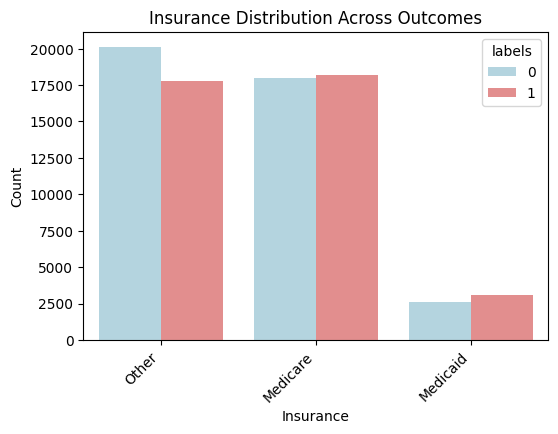

In [ ]:
# Insurance distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='insurance', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Insurance Distribution Across Outcomes')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

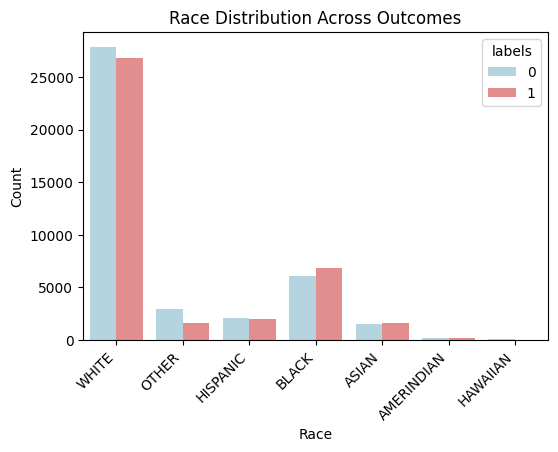

In [ ]:
# Race distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='race', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Race Distribution Across Outcomes')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

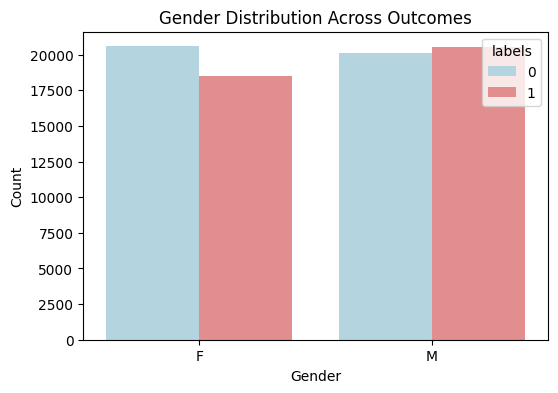

In [ ]:
# Gender distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='gender', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Gender Distribution Across Outcomes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

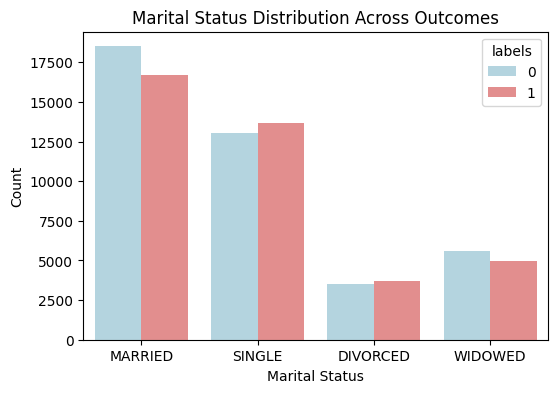

In [ ]:
# Marital status distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='marital_status', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Marital Status Distribution Across Outcomes')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

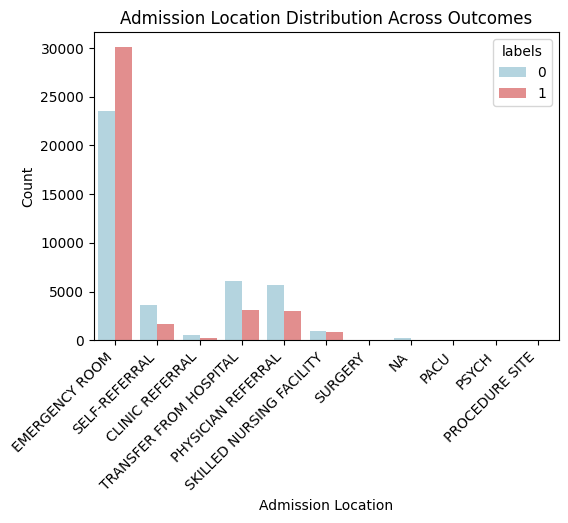

In [ ]:
# Admission location distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='admission_location', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Admission Location Distribution Across Outcomes')
plt.xlabel('Admission Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

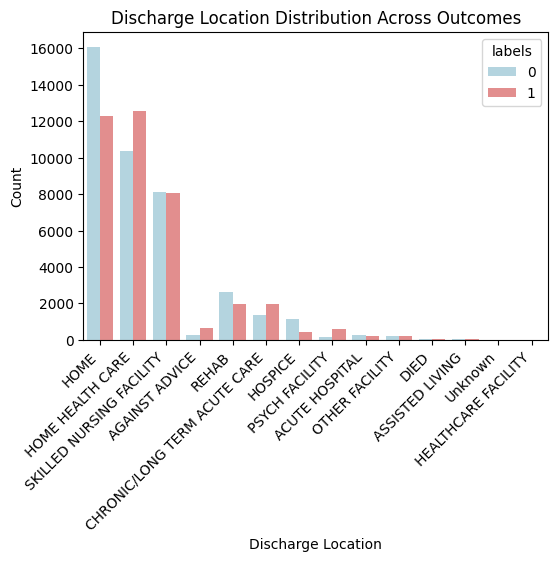

In [ ]:
# Discharge location distribution across outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ds, x='discharge_location', hue='labels', palette=['lightblue', 'lightcoral'])
plt.title('Discharge Location Distribution Across Outcomes')
plt.xlabel('Discharge Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


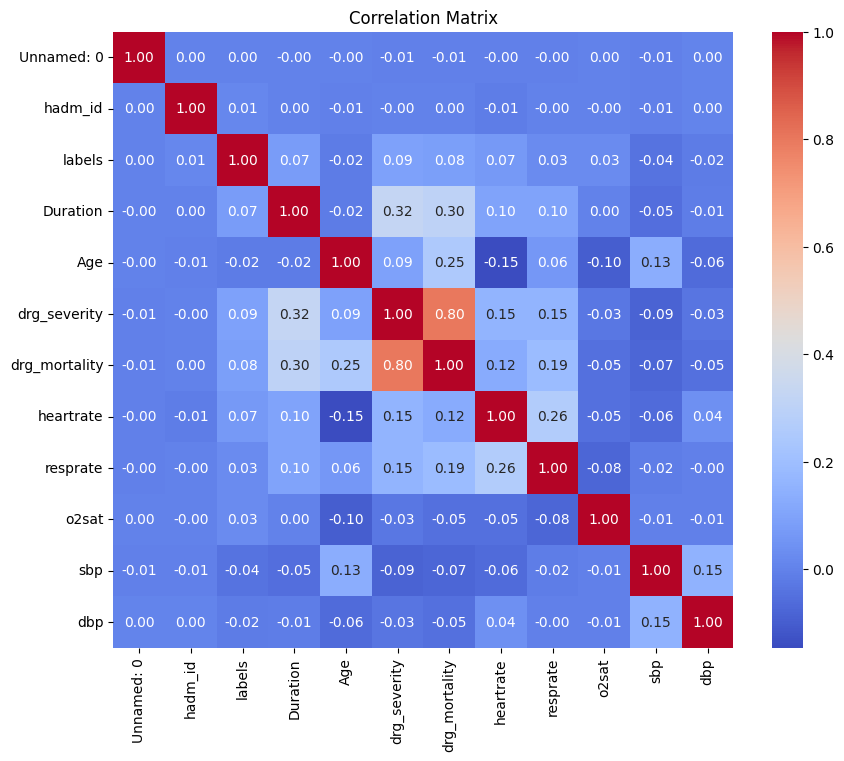

In [ ]:
# Visualizing correlation between features

import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = train_ds.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


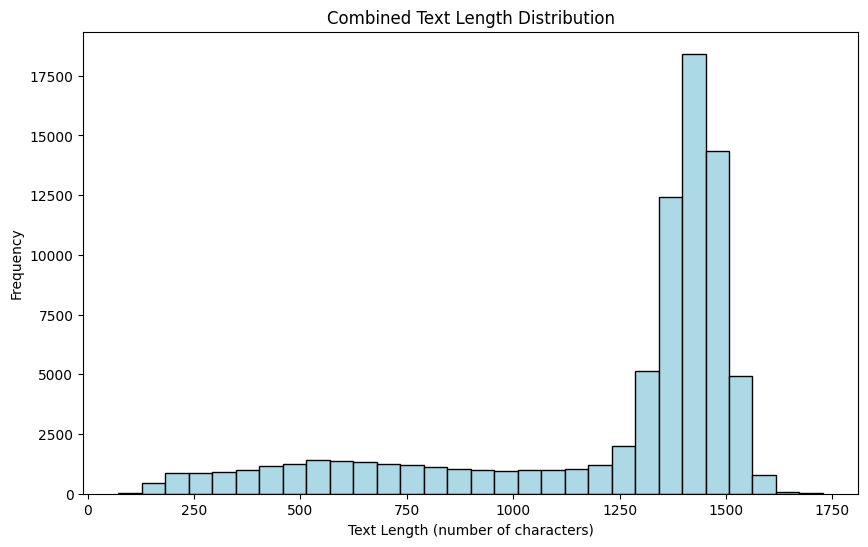

In [ ]:
# Concatenate 'text_y' and 'description' into a new column
train_ds['combined_text'] = train_ds['text'] + ' ' + train_ds['diagnoses']
test_ds['combined_text'] = test_ds['text'] + ' ' + test_ds['diagnoses']
val_ds['combined_text'] = val_ds['text'] + ' ' + val_ds['diagnoses']

# Text Length Distribution (number of characters in each combined text)
train_ds['text_length'] = train_ds['combined_text'].apply(len)

# Plotting text length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_ds['text_length'], bins=30, color='lightblue', edgecolor='black')
plt.title('Combined Text Length Distribution')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')

#Save the image
plt.savefig("text_length.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()

In [ ]:
# Displaying the length of the longest text in each set

print(f"Longest string in training set: {train_ds['text_length'].max()}")
print(f"Longest string in testing set: {test_ds['text_length'].max()}")
print(f"Longest string in validation set: {val_ds['text_length'].max()}")

In [ ]:
# Function to clean and preprocess the text (same as before)
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Preprocess the combined text column
train_ds['cleaned_text'] = train_ds['combined_text'].apply(preprocess_text)
test_ds['cleaned_text'] = test_ds['combined_text'].apply(preprocess_text)
val_ds['cleaned_text'] = val_ds['combined_text'].apply(preprocess_text)

Most Common Words: [('right', 140556), ('left', 119954), ('cm', 91981), ('normal', 87890), ('w', 87145), ('chest', 82330), ('findings', 78661), ('evidence', 68617), ('ct', 67619), ('impression', 66442), ('comparison', 66439), ('contrast', 60492), ('indication', 58271), ('technique', 56414), ('seen', 53650), ('small', 50272), ('mgy', 48791), ('examination', 47665), ('acute', 47089), ('within', 46923)]


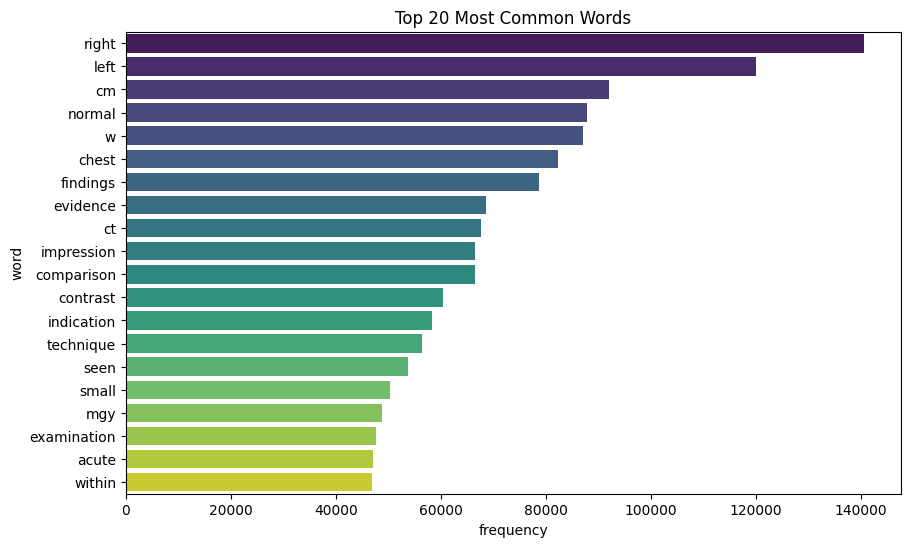

In [ ]:
# Word Frequency Analysis
all_words = ' '.join([str(text) for text in train_ds['cleaned_text']])
word_freq = Counter(all_words.split())

# Display the top 20 most common words
common_words = word_freq.most_common(20)
print("Most Common Words:", common_words)

# Plotting the top 20 most common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')

#Save the image
plt.savefig("wordfreq.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


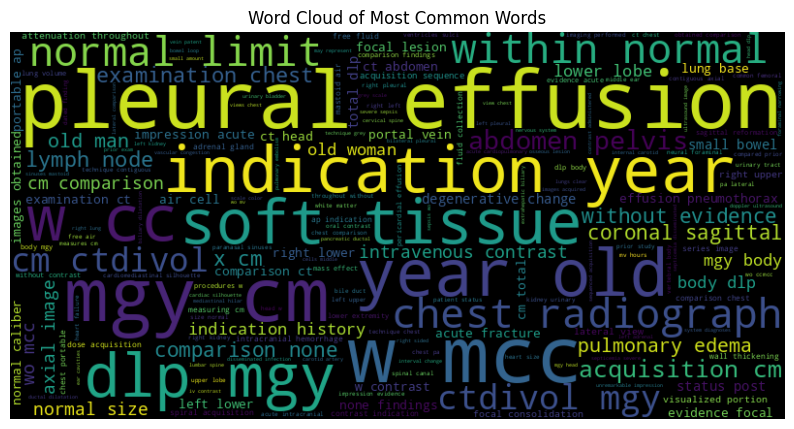

In [ ]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')

#Save the image
plt.savefig("wordcloud.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()

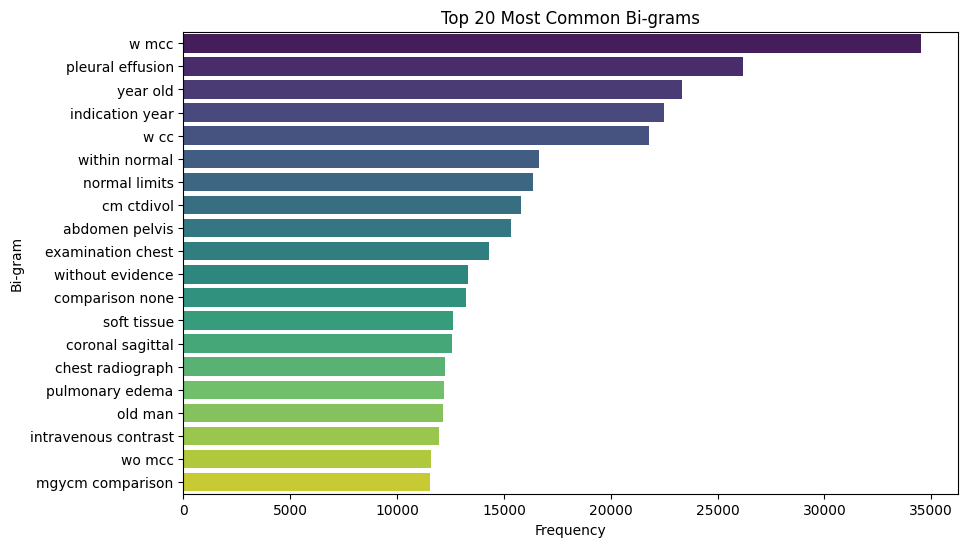

In [ ]:
# Function to preprocess and tokenize text
def preprocess_text_to_tokens(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Generate bi-grams
def get_ngrams(text_tokens, n=2):
    return list(ngrams(text_tokens, n))

# Assuming 'combined_text' is a column in your DataFrame
# Preprocess and tokenize text
train_ds['tokenized_text'] = train_ds['combined_text'].apply(preprocess_text_to_tokens)

# Generate bi-grams
train_ds['bi_grams'] = train_ds['tokenized_text'].apply(lambda tokens: get_ngrams(tokens, n=2))

# Flatten the list of all bi-grams across all rows
all_bi_grams = [bi_gram for sublist in train_ds['bi_grams'] for bi_gram in sublist]

# Get the frequency of bi-grams
bi_gram_freq = Counter(all_bi_grams)

# Display the 20 most common bi-grams
common_bi_grams = bi_gram_freq.most_common(20)

# Convert the most common bi-grams to a DataFrame
common_bi_grams_df = pd.DataFrame(common_bi_grams, columns=['bi_gram', 'frequency'])

# Plot the most common bi-grams
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y=common_bi_grams_df['bi_gram'].apply(lambda x: ' '.join(x)), data=common_bi_grams_df, palette='viridis')
plt.title('Top 20 Most Common Bi-grams')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')

#Save the image
plt.savefig("bigram.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


### Additional Feature Engineering

In [ ]:
# Categorizing admission location into risk levels
def risk(ds):
    adm_loc_risk_mapping = {
        'EMERGENCY ROOM': 1,       # High Risk
        'TRANSFER FROM HOSPITAL': 2,                  # High Risk
        'SKILLED NURSING FACILITY': 2,           # High Risk
        'PROCEDURE SITE': 3,                        # High Risk
        'SELF-REFERRAL': 2,          # Medium Risk
        'CLINIC REFERRAL': 2,      # Medium Risk
        'SURGERY': 2,              # Medium Risk
        'PHYSICIAN REFERRAL': 2,   # Medium Risk
        'NA': 3,      # Low Risk
        'PSYCH': 3,     # Low Risk
        'PACU': 3,   # Low Risk
        }
    # adm_type_risk_mapping = {
    #     'EMERGENCY': 1,
    #     'OBSERVATION': 2,
    #     'SURGERY': 3,
    #     'ELECTIVE': 3}
    ds['adm_loc_risk'] = ds['admission_location'].map(adm_loc_risk_mapping).fillna(3)
    # ds['adm_type_risk'] = ds['admission_type'].map(adm_type_risk_mapping).fillna(3)
    return ds

In [ ]:
# Applying the risk mapping to the datasets
train_ds = risk(train_ds)
test_ds = risk(test_ds)
val_ds = risk(val_ds)

In [ ]:
# train_ds['risk_level'] = train_ds['admission_location'].map(adm_loc_risk_mapping).fillna(3)  # Default to low risk (3) if not found
# test_ds['risk_level'] = test_ds['admission_location'].map(adm_loc_risk_mapping).fillna(3)  # Default to low risk (3) if not found
# val_ds['risk_level'] = val_ds['admission_location'].map(adm_loc_risk_mapping).fillna(3)  # Default to low risk (3) if not found

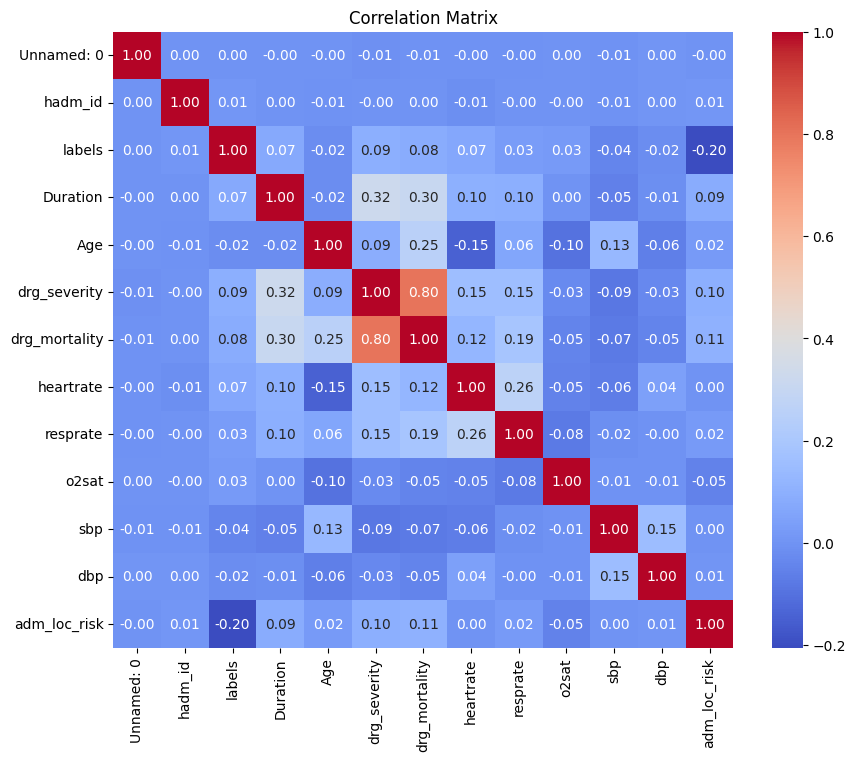

In [ ]:
# Visualizing correlation between features

plt.figure(figsize=(10, 8))
sns.heatmap(train_ds.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Modelling the Structured + Textual Data

In [ ]:
#Selecting the important variables for modelling
training_all = train_ds[['marital_status', 'admission_type', 'discharge_location', 'insurance', 'race', 'labels', 'Duration', 'gender', 'Age','drg_severity',
       'drg_mortality', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp','adm_loc_risk']]
testing_all = test_ds[['marital_status', 'admission_type', 'discharge_location', 'insurance', 'race', 'labels', 'Duration', 'gender', 'Age','drg_severity',
       'drg_mortality', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp','adm_loc_risk']]
validation_all = val_ds[['marital_status', 'admission_type', 'discharge_location', 'insurance', 'race', 'labels', 'Duration', 'gender', 'Age','drg_severity',
       'drg_mortality', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp','adm_loc_risk']]

In [ ]:
training_all.columns

Index(['marital_status', 'admission_type', 'discharge_location', 'insurance',
       'race', 'labels', 'Duration', 'gender', 'Age', 'drg_severity',
       'drg_mortality', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp',
       'adm_loc_risk'],
      dtype='object')

In [ ]:
validation_all.shape

(9818, 17)

In [ ]:
#Resetting the index so that they are all unique across the 3 dataframes
random_index_train = np.random.choice(np.arange(0, 176622), size=len(training_all), replace=False)
random_index_test = np.random.choice(np.arange(176622, 195531), size=len(testing_all), replace=False)
random_index_val = np.random.choice(np.arange(195531, 217403), size=len(validation_all), replace=False)

# Assign the random index to the DataFrame
training_all.index = random_index_train
testing_all.index = random_index_test
validation_all.index = random_index_val

### Variable Encoding

In [ ]:
#Encoding the catgeorical values using one hot encoder and scaling the numerical variables
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['Duration', 'Age', 'drg_severity', 'drg_mortality', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']),
        ('cat', OneHotEncoder(drop='first'), ['marital_status','admission_type','discharge_location','insurance','race', 'gender']),],
    remainder='passthrough'
)

In [ ]:
# Fitting the preprocessor on the training data
preprocessor.fit(training_all)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Duration', 'Age', 'drg_severity',
                                  'drg_mortality', 'heartrate', 'resprate',
                                  'o2sat', 'sbp', 'dbp']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['marital_status', 'admission_type',
                                  'discharge_location', 'insurance', 'race',
                                  'gender'])])

In [ ]:
feature_names = preprocessor.get_feature_names_out()

In [ ]:
# Transforming training data and converting back to dataframe
training_all_transformed = preprocessor.transform(training_all)
training_all_transformed = pd.DataFrame(training_all_transformed, columns=feature_names)

In [ ]:
# Transforming training data and converting back to dataframe
testing_all_transformed = preprocessor.transform(testing_all)
testing_all_transformed = pd.DataFrame(testing_all_transformed, columns=feature_names)

In [ ]:
# Transforming training data and converting back to dataframe
validation_all_transformed = preprocessor.transform(validation_all)
validation_all_transformed = pd.DataFrame(validation_all_transformed, columns=feature_names)

In [ ]:
training_all_transformed.columns

Index(['num__Duration', 'num__Age', 'num__drg_severity', 'num__drg_mortality',
       'num__heartrate', 'num__resprate', 'num__o2sat', 'num__sbp', 'num__dbp',
       'cat__marital_status_MARRIED', 'cat__marital_status_SINGLE',
       'cat__marital_status_WIDOWED', 'cat__admission_type_EMERGENCY',
       'cat__admission_type_OBSERVATION',
       'cat__admission_type_SURGICAL SAME DAY ADMISSION',
       'cat__discharge_location_AGAINST ADVICE',
       'cat__discharge_location_ASSISTED LIVING',
       'cat__discharge_location_CHRONIC/LONG TERM ACUTE CARE',
       'cat__discharge_location_DIED',
       'cat__discharge_location_HEALTHCARE FACILITY',
       'cat__discharge_location_HOME',
       'cat__discharge_location_HOME HEALTH CARE',
       'cat__discharge_location_HOSPICE',
       'cat__discharge_location_OTHER FACILITY',
       'cat__discharge_location_PSYCH FACILITY',
       'cat__discharge_location_REHAB',
       'cat__discharge_location_SKILLED NURSING FACILITY',
       'cat__disch

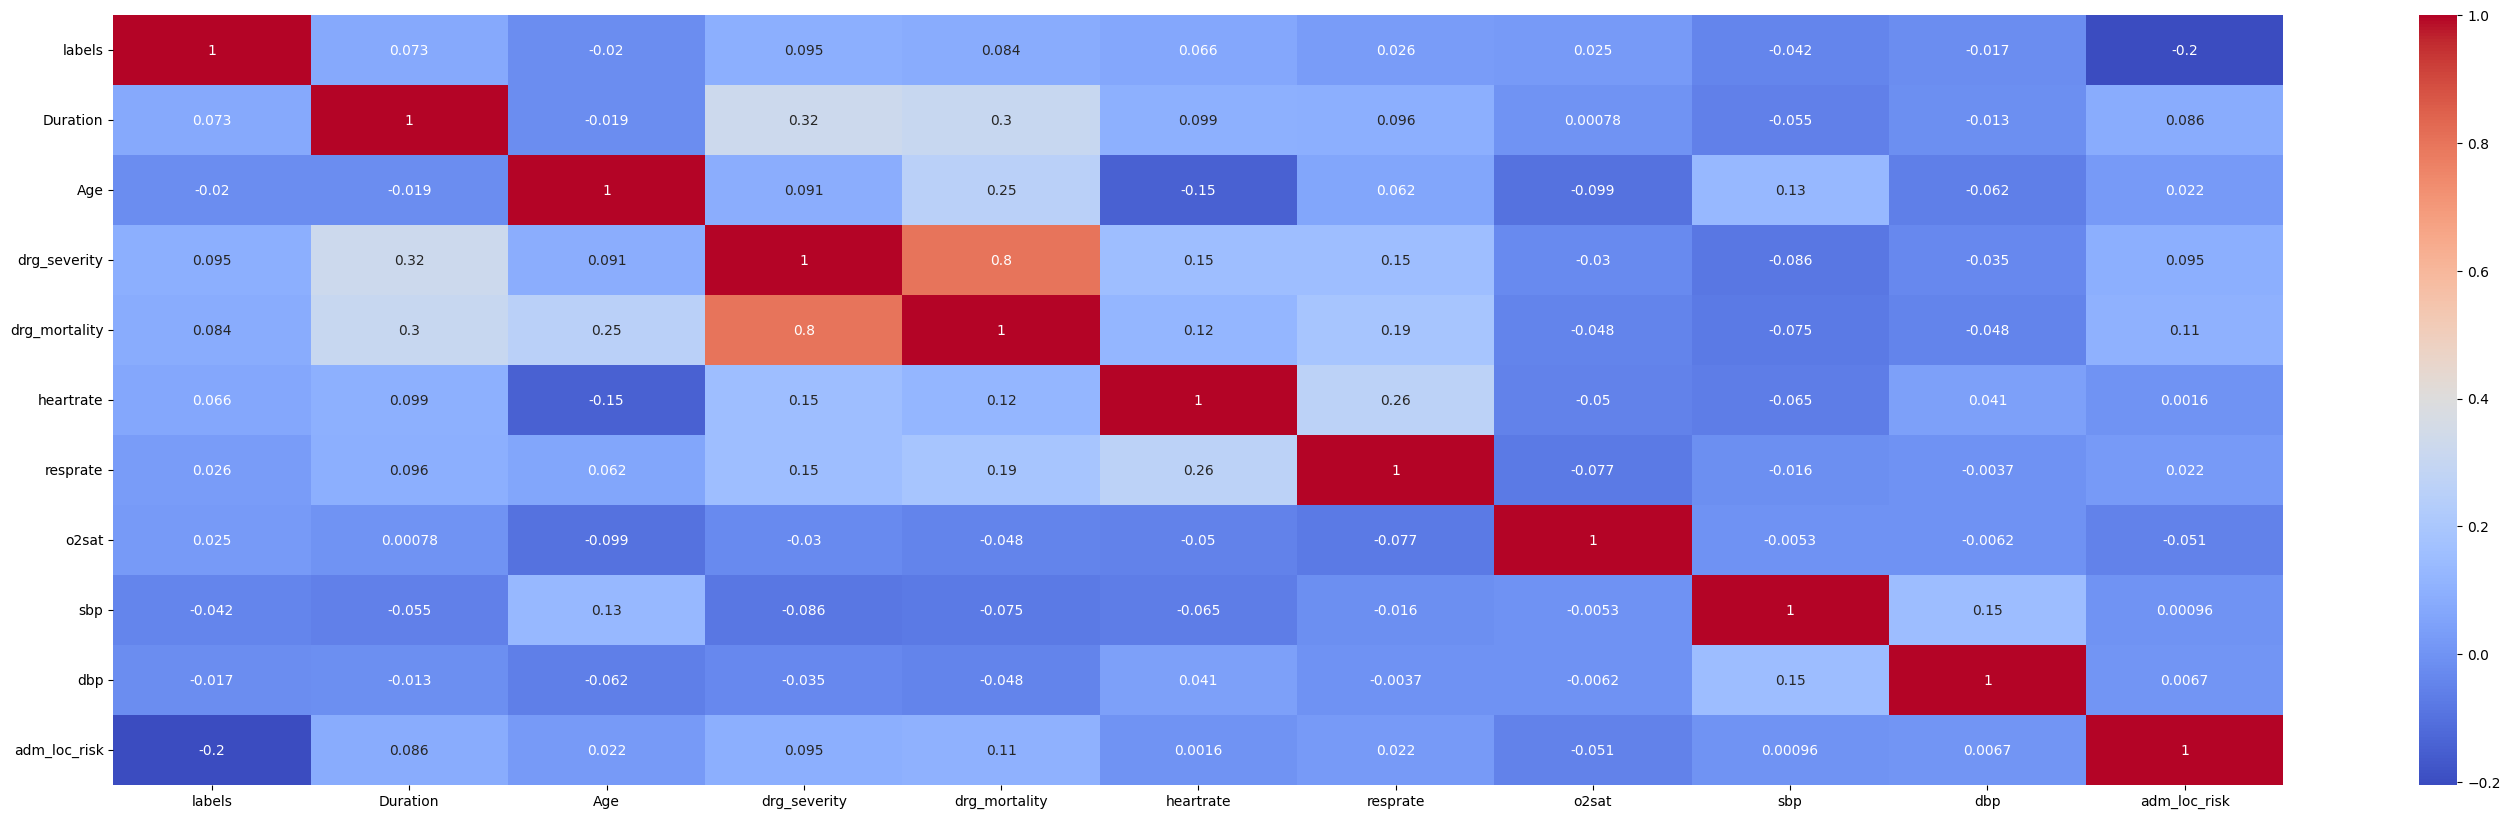

In [ ]:
#Feature correlation after encoding
fig = plt.figure(figsize=(35,10))
sns.heatmap(training_all.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.show()

# Proposed Approach

## ClinicalT5

In [ ]:
#Extracting just id, label and notes
# training_text = train_ds[['hadm_id','diagnoses', 'text', 'labels']]
# testing_text = test_ds[['hadm_id','diagnoses', 'text', 'labels']]
# validation_text = val_ds[['hadm_id', 'diagnoses', 'text', 'labels']]

In [ ]:
# Extracting just id, label and notes
training_text = train_ds[['hadm_id','cleaned_text', 'labels']]
testing_text = test_ds[['hadm_id','cleaned_text', 'labels']]
validation_text = val_ds[['hadm_id', 'cleaned_text', 'labels']]

In [ ]:
#Converting to a format that is compatible with hugging face
from datasets import Dataset

hf_trainingtext = Dataset.from_pandas(training_text)
hf_testingtext = Dataset.from_pandas(testing_text)
hf_validationtext = Dataset.from_pandas(validation_text)

### Finetuning ClinicalT5 minimally

In [ ]:
# Load pre-trained tokenizer and model
model_path = "Clinical-T5-Scratch"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
# Defining tokenizer function
def tokenize_function(example):
    return tokenizer(example['cleaned_text'], truncation=True, padding=True, max_length=1800)

In [ ]:
# Tokenizing training set
tokenized_train = hf_trainingtext.map(tokenize_function, batched=True)
tokenized_train

Map:   0%|          | 0/79731 [00:00<?, ? examples/s]

Dataset({
    features: ['hadm_id', 'cleaned_text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 79731
})

In [ ]:
# Tokenizing test set
tokenized_test = hf_testingtext.map(tokenize_function, batched=True)
tokenized_test

Map:   0%|          | 0/8698 [00:00<?, ? examples/s]

Dataset({
    features: ['hadm_id', 'cleaned_text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 8698
})

In [ ]:
# Tokeinizing validation set
tokenized_val = hf_validationtext.map(tokenize_function, batched=True)
tokenized_val

Map:   0%|          | 0/9818 [00:00<?, ? examples/s]

Dataset({
    features: ['hadm_id', 'cleaned_text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 9818
})

In [ ]:
# Initializing data collator with tokenizer
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# creating a class that saves the evaluation results to each checkpoint
class EvalSaveCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        # Save the evaluation metrics to a TXT file
        output_dir = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        with open(os.path.join(output_dir, "eval_results.txt"), "w") as f:
            json.dump(metrics, f)

In [ ]:
# Training arguments for the model
training_args = TrainingArguments(
    output_dir="Test-Checkpoints",
    do_train=True,
    do_eval=True,
    eval_strategy='steps',
    eval_steps=2000,
    save_strategy='steps',
    save_steps=2000,
    learning_rate=3e-5,
    num_train_epochs=5,
    per_device_train_batch_size= 16,
    per_device_eval_batch_size=16,
    load_best_model_at_end=True,     # Enable loading the best model at the end
    metric_for_best_model="eval_Accuracy", # Specify the metric to use for selecting the best model
    greater_is_better=True,
    # early_stopping_patience=10,
    )

In [ ]:
# Computing training metrics
def compute_metrics(eval_preds):
    # calculate metrics
    labels = eval_preds.label_ids
    pred_labels = np.argmax(eval_preds.predictions[0], axis=-1)

    # predictions = np.argmax(logits, axis=-1)
    # pred_scores = softmax(logits, axis=-1)[:,1]
    acc = accuracy_score(labels, pred_labels)
    recall = recall_score(labels, pred_labels)
    precision = precision_score(labels, pred_labels)
    tn, fp, fn, tp = confusion_matrix(labels, pred_labels, labels=[0, 1]).ravel()
    spec = tn/(tn+fp)
    # roc_auc = roc_auc_score(actuals, pred_scores)
    mcc = matthews_corrcoef(labels, pred_labels)
    f1 = f1_score(labels, pred_labels)
    results = {'Accuracy': acc,
               'Recall/Sensitivity': recall,
               'Precision': precision,
               'Specificity': spec,
               'MCC':mcc,
               'F1-Score':f1,
               'TN': tn,
               'FP': fp,
               'FN': fn,
               'TP': tp}
    return results

In [ ]:
# Defining the trainer
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EvalSaveCallback()]
)

In [ ]:
# Training the model
trainer.train()

There were missing keys in the checkpoint model loaded: ['transformer.encoder.embed_tokens.weight', 'transformer.decoder.embed_tokens.weight'].


TrainOutput(global_step=24920, training_loss=0.5922760897616514, metrics={'train_runtime': 14370.8775, 'train_samples_per_second': 27.74, 'train_steps_per_second': 1.734, 'total_flos': 2.0222564874749347e+17, 'train_loss': 0.5922760897616514, 'epoch': 5.0})

In [ ]:
# Saving the model
trainer.save_model(output_dir = 'FinalT5model')

### ClinicalT5 Evaluation

In [ ]:
# Loading trained model and tokenizer
trained_model_path = "Clinical-T5-Trained"
clinical_t5_model = AutoModelForSequenceClassification.from_pretrained(trained_model_path)
clinical_t5_tokenizer = AutoTokenizer.from_pretrained(trained_model_path)

In [ ]:
# Using trainer API to evaluate
clinical_t5_trainer = Trainer(
    model = clinical_t5_model,
    tokenizer = clinical_t5_tokenizer)

In [ ]:
# Tokenize your test data
def tokenize_function(example):
    return clinical_t5_tokenizer(example['cleaned_text'], truncation=True, padding=True, max_length=1800)
t5_tokenized_test = hf_testingtext.map(tokenize_function, batched=True)

Map:   0%|          | 0/8698 [00:00<?, ? examples/s]

In [ ]:
# Making predictions
predictions = clinical_t5_trainer.predict(tokenized_test)

In [ ]:
# Printing predictions
print(predictions)

In [ ]:
labels = predictions.label_ids
pred_labels = np.argmax(predictions.predictions[0], axis=-1)
pred_scores = softmax(predictions.predictions[0], axis=-1)[:,1]

In [ ]:
# Calculating metrics
T5_text_results = metrics(labels, pred_labels, pred_scores)

In [ ]:
# Displaying T5 metrics
T5_text_results

{'Accuracy': 0.5934697631639457,
 'Recall/Sensitivity': 0.626612355736592,
 'Precision': 0.59484425349087,
 'Specificity': 0.5592428137415284,
 'ROC_AUC': 0.6357039999310379,
 'MCC': 0.1862928024704932,
 'F1-Score': 0.6103151862464182,
 'Confusion Matrix': {'TN': 2393, 'FP': 1886, 'FN': 1650, 'TP': 2769}}

### Extracting Embeddings

In [ ]:
# Loading trained model and tokenizer
model_path = "Clinical-T5-Trained"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
tokenizer.model_max_length

1000000000000000019884624838656

In [ ]:
# Defining tokenizer function
def tokenize_function(example):
    return tokenizer(example['cleaned_text'], truncation=True, padding=True, max_length=1800)

In [ ]:
# Tokenizing training set
tokenized_train = hf_trainingtext.map(tokenize_function, batched=True)
tokenized_train = tokenized_train.remove_columns(['hadm_id', 'cleaned_text'])
tokenized_train.set_format('torch')
tokenized_train

Map:   0%|          | 0/79731 [00:00<?, ? examples/s]

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 79731
})

In [ ]:
# Tokenizing test set
tokenized_test = hf_testingtext.map(tokenize_function, batched=True)
tokenized_test = tokenized_test.remove_columns(['hadm_id', 'cleaned_text'])
tokenized_test.set_format('torch')
tokenized_test

Map:   0%|          | 0/8698 [00:00<?, ? examples/s]

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 8698
})

In [ ]:
# Tokenizing validation set
tokenized_val = hf_validationtext.map(tokenize_function, batched=True)
tokenized_val = tokenized_val.remove_columns(['hadm_id', 'cleaned_text'])
tokenized_val.set_format('torch')
tokenized_val

Map:   0%|          | 0/9818 [00:00<?, ? examples/s]

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 9818
})

In [ ]:
# Initializing data collator
from torch.utils.data import Dataset, DataLoader
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Using data loader to load the data in batches
train_dataloader = DataLoader(
    tokenized_train, shuffle=True, batch_size=32, collate_fn=data_collator
)
test_dataloader = DataLoader(
    tokenized_test, batch_size=32, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_val, batch_size=32, collate_fn=data_collator
)

In [ ]:
# Testing to see the output of the train dataloader
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([32]),
 'input_ids': torch.Size([32, 455]),
 'attention_mask': torch.Size([32, 455])}

In [ ]:
# Extracting training embeddings in batches and storing to a list
all_embeddings_t5 = []
with torch.no_grad():  # Disable gradient calculation
    for batch in tqdm(train_dataloader):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
        embeddings = outputs.decoder_hidden_states[-1].mean(dim=1)  # Mean pooling
        all_embeddings_t5.append(embeddings)

100%|██████████| 2492/2492 [7:15:14<00:00, 10.48s/it]  


In [ ]:
# Displaying the embeddings
all_embeddings_t5

[tensor([[ 0.0418,  0.0099, -0.0195,  ..., -0.2059,  0.0611,  0.1967],
         [ 0.0241,  0.0521, -0.0435,  ..., -0.1493,  0.0836,  0.1678],
         [ 0.0264,  0.0018, -0.0189,  ..., -0.2430,  0.0803,  0.2019],
         ...,
         [ 0.0277,  0.0213,  0.0364,  ..., -0.1223,  0.0949,  0.1919],
         [ 0.0393,  0.0434, -0.0476,  ..., -0.1131,  0.0335,  0.2024],
         [ 0.0120,  0.0241, -0.0510,  ..., -0.0909,  0.0678,  0.1155]]),
 tensor([[ 0.0838,  0.0269, -0.0149,  ..., -0.0729,  0.0857,  0.1858],
         [-0.0644, -0.0099, -0.1126,  ..., -0.0479,  0.2253,  0.2097],
         [-0.0413,  0.0553, -0.0877,  ..., -0.0499,  0.1765,  0.1849],
         ...,
         [ 0.0068,  0.0016, -0.1126,  ..., -0.1018,  0.0975,  0.1917],
         [ 0.0272,  0.0242, -0.0160,  ..., -0.1074,  0.1216,  0.1742],
         [ 0.0422,  0.0056, -0.0437,  ..., -0.1145,  0.0543,  0.1925]]),
 tensor([[-0.0131,  0.0214, -0.1033,  ..., -0.0642,  0.1536,  0.1597],
         [-0.0031,  0.0019, -0.0838,  ..., -0

In [ ]:
all_embeddings_t5 = torch.cat(all_embeddings_t5, dim=0)  # Concatenate embeddings from all batches

In [ ]:
# Converting to numpy array
all_embeddings_np_t5 = all_embeddings_t5.numpy()

In [ ]:
# Saving the embeddings
np.save("embeddings_t5_trained.npy", all_embeddings_np_t5)

In [ ]:
# Saving the embeddings
torch.save(all_embeddings_t5, "embeddings_t5_trained.pt")

In [ ]:
# Extracting testing embeddings in batches and storing to a list
test_embeddings_t5 = []
with torch.no_grad():  # Disable gradient calculation
    for batch in tqdm(test_dataloader):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
        te_embeddings = outputs.decoder_hidden_states[-1].mean(dim=1)  # Mean pooling
        test_embeddings_t5.append(te_embeddings)

100%|██████████| 272/272 [20:37<00:00,  4.55s/it]


In [ ]:
test_embeddings_t5 = torch.cat(test_embeddings_t5, dim=0)  # Concatenate embeddings from all batches

In [ ]:
# Saving the embeddings
torch.save(test_embeddings_t5, "test_embeddings_t5_trained.pt")

In [ ]:
# Converting to numpy array
test_embeddings_np_t5 = test_embeddings_t5.numpy()

In [ ]:
# Saving the embeddings
np.save("test_embeddings_t5_trained.npy", test_embeddings_np_t5)

In [ ]:
# Extracting validation embeddings in batches and storing to a list
val_embeddings_t5 = []
with torch.no_grad():  # Disable gradient calculation
    for batch in tqdm(eval_dataloader):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        # outputs = model(input_ids, attention_mask=attention_mask)
        # v_embeddings = outputs.decoder_hidden_states.mean(dim=1)  # Mean pooling (adjust if needed)
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
        v_embeddings = outputs.decoder_hidden_states[-1].mean(dim=1)
        val_embeddings_t5.append(v_embeddings)

100%|██████████| 307/307 [19:24<00:00,  3.79s/it]


In [ ]:
val_embeddings_t5 = torch.cat(val_embeddings_t5, dim=0)  # Concatenate embeddings from all batches

In [ ]:
# Saving the embeddings
torch.save(val_embeddings_t5, "val_embeddings_t5_trained.pt")

In [ ]:

# Converting to numpy arrayval_embeddings_np_t5 = val_embeddings_t5.numpy()

In [ ]:
# Saving the embeddings
np.save("val_embeddings_t5_trained.npy", val_embeddings_np_t5)

## Concatenating

In [ ]:
# Loading training embeddings
all_embeddings_np = np.load('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/embeddings_t5_trained.npy')

In [ ]:
# Loading testing embeddings
test_embeddings_np = np.load('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/test_embeddings_t5_trained.npy')

In [ ]:
# Loading validation embeddings
val_embeddings_np = np.load('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/val_embeddings_t5_trained.npy')

In [ ]:
# Displaying feature names
feature_names

array(['num__Duration', 'num__Age', 'num__drg_severity',
       'num__drg_mortality', 'num__heartrate', 'num__resprate',
       'num__o2sat', 'num__sbp', 'num__dbp',
       'cat__marital_status_MARRIED', 'cat__marital_status_SINGLE',
       'cat__marital_status_WIDOWED', 'cat__admission_type_EMERGENCY',
       'cat__admission_type_OBSERVATION',
       'cat__admission_type_SURGICAL SAME DAY ADMISSION',
       'cat__discharge_location_AGAINST ADVICE',
       'cat__discharge_location_ASSISTED LIVING',
       'cat__discharge_location_CHRONIC/LONG TERM ACUTE CARE',
       'cat__discharge_location_DIED',
       'cat__discharge_location_HEALTHCARE FACILITY',
       'cat__discharge_location_HOME',
       'cat__discharge_location_HOME HEALTH CARE',
       'cat__discharge_location_HOSPICE',
       'cat__discharge_location_OTHER FACILITY',
       'cat__discharge_location_PSYCH FACILITY',
       'cat__discharge_location_REHAB',
       'cat__discharge_location_SKILLED NURSING FACILITY',
       'cat

In [ ]:
#Defining the categorical and numerical features
categorical_data = ['cat__marital_status_MARRIED', 'cat__marital_status_SINGLE',
       'cat__marital_status_WIDOWED', 'cat__admission_type_EMERGENCY',
       'cat__admission_type_OBSERVATION',
       'cat__admission_type_SURGICAL SAME DAY ADMISSION',
       'cat__discharge_location_AGAINST ADVICE',
       'cat__discharge_location_ASSISTED LIVING',
       'cat__discharge_location_CHRONIC/LONG TERM ACUTE CARE',
       'cat__discharge_location_DIED',
       'cat__discharge_location_HEALTHCARE FACILITY',
       'cat__discharge_location_HOME',
       'cat__discharge_location_HOME HEALTH CARE',
       'cat__discharge_location_HOSPICE',
       'cat__discharge_location_OTHER FACILITY',
       'cat__discharge_location_PSYCH FACILITY',
       'cat__discharge_location_REHAB',
       'cat__discharge_location_SKILLED NURSING FACILITY',
       'cat__discharge_location_Unknown', 'cat__insurance_Medicare',
       'cat__insurance_Other', 'cat__race_ASIAN', 'cat__race_BLACK',
       'cat__race_HAWAIIAN', 'cat__race_HISPANIC', 'cat__race_OTHER',
       'cat__race_WHITE', 'cat__gender_M']
numerical_data = ['num__Duration', 'num__Age', 'num__drg_severity',
       'num__drg_mortality', 'num__heartrate', 'num__resprate',
       'num__o2sat', 'num__sbp', 'num__dbp']

In [ ]:
# Concatenating the training set
combined_train = np.concatenate([all_embeddings_np, training_all_transformed[numerical_data], training_all_transformed[categorical_data], training_all_transformed[['remainder__adm_loc_risk']]], axis=1)

In [ ]:
#Initializing the scaler
scaler = StandardScaler()

In [ ]:
# Fitting the features of the dataset except the cetgorical features
scaler.fit(combined_train[:, :777])

StandardScaler()

In [ ]:
# Scaling the numerical features in the training set
combined_train[:,:777] = scaler.transform(combined_train[:,:777])

In [ ]:
# Concatenating the testing set
combined_test = np.concatenate([test_embeddings_np, testing_all_transformed[numerical_data], testing_all_transformed[categorical_data], testing_all_transformed[['remainder__adm_loc_risk']]], axis=1)

# Scaling the numerical features in the testing set
combined_test[:,:777] = scaler.transform(combined_test[:,:777])

In [ ]:
# Concatenating the training set
combined_val = np.concatenate([val_embeddings_np, validation_all_transformed[numerical_data], validation_all_transformed[categorical_data], validation_all_transformed[['remainder__adm_loc_risk']]], axis=1)

# Scaling the numerical features in the validation set
combined_val[:,:777] = scaler.transform(combined_val[:,:777])

## Feed to Torch NN

In [ ]:
# Converting the training set to tensor
combined_train_tensor = torch.from_numpy(combined_train.astype(np.float32)).float()

In [ ]:
# Converting the testing set to tensor
combined_test_tensor = torch.from_numpy(combined_test.astype(np.float32)).float()

In [ ]:
# Converting the validation set to tensor
combined_val_tensor = torch.from_numpy(combined_val.astype(np.float32)).float()

In [ ]:
# create dataset and dataloader
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.data[idx], self.labels[idx]
        else:
            return self.data[idx]

train_dataset = MyDataset(combined_train_tensor, training_all_transformed['remainder__labels'])
val_dataset = MyDataset(combined_val_tensor, validation_all_transformed['remainder__labels'])
test_dataset = MyDataset(combined_test_tensor, testing_all_transformed['remainder__labels'])
training_dataloader = DataLoader(train_dataset, batch_size=32)
validation_dataloader = DataLoader(val_dataset, batch_size=32)
testing_dataloader = DataLoader(test_dataset, batch_size=32)

### Model building

In [ ]:
# Define Neural Network

class MyNeuralNetwork(Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim2, hidden_dim3, output_dim, dropout_rate):
        super(MyNeuralNetwork, self).__init__()
        self.fc1 = Linear(input_dim, hidden_dim)
        kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        self.relu1 = ReLU()
        self.dropout1 = nn.Dropout(p=dropout_rate)  # Dropout layer after first hidden layer

        self.fc2 = Linear(hidden_dim, hidden_dim2)
        self.relu2 = ReLU()
        self.dropout2 = nn.Dropout(p=dropout_rate)  # Dropout layer after second hidden layer

        self.fc3 = Linear(hidden_dim2, hidden_dim3)
        kaiming_uniform_(self.fc3.weight, nonlinearity='relu')
        self.relu3 = ReLU()

        self.fc4 = Linear(hidden_dim3, output_dim)
        xavier_uniform_(self.fc3.weight)
        self.act4 = Sigmoid()

    # Defining the forward function
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.act4(x)
        return x

    #Building the training loop

    def train_model(self, training_dataloader, validation_dataloader, num_epochs, optimizer, criterion):
        self.train()
        history = {'train_loss': [], 'val_loss': []}

        #Initializing early stopping variables
        best_score = 0
        counter = 0
        for epoch in tqdm(range(num_epochs), desc="Training epochs", unit="epoch"):
            train_loss = 0
            for i, batch in enumerate(training_dataloader):
                data, labels = batch

                optimizer.zero_grad()

                # Forward pass
                outputs = model(data)
                outputs = outputs.squeeze(1)

                # Calculate the loss
                labels = labels.float()
                loss = criterion(outputs, labels)

                # Backpropagation and optimization steps
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
            train_loss /= len(training_dataloader)

            #Validation loop
            with torch.no_grad():
                pred_scores, predictions, actuals = list(), list(), list()
                val_loss = 0
                for i, batch in enumerate(validation_dataloader):
                    data, labels = batch
                    # evaluate the model on the test set
                    output = model(data)
                    # output = output.squeeze(1)
                    loss = criterion(output.squeeze(1), labels.float())
                    val_loss += loss.item()
                    # retrieve numpy array
                    output = output.detach().numpy()
                    actual = labels.numpy()
                    actual = actual.reshape((len(actual), 1))
                    # round to class values
                    output_r = output.round()
                    # store
                    predictions.append(output_r)
                    pred_scores.append(output)
                    actuals.append(actual)
                val_loss /= len(validation_dataloader)
                pred_scores, predictions, actuals = vstack(pred_scores), vstack(predictions), vstack(actuals)
                # calculate accuracy
                acc = accuracy_score(actuals, predictions)
                recall = recall_score(actuals, predictions)
                precision = precision_score(actuals, predictions)
                tn, fp, fn, tp = confusion_matrix(actuals, predictions, labels=[0, 1]).ravel()
                roc_auc = roc_auc_score(actuals, pred_scores)
                mcc = matthews_corrcoef(actuals, predictions)
                f1 = f1_score(actuals, predictions)

                history['train_loss'].append(train_loss)
                history['val_loss'].append(val_loss)

                # Check for early stopping using ROC_AUC
                # if roc_auc > (best_score - delta):
                #     best_score = roc_auc
                #     counter = 0
                # else:
                #     counter += 1
                #     if counter >= patience:
                #         print(f"Early stopping at epoch {epoch}")
                #         break
            print({'Loss':val_loss, 'Accuracy': acc, 'Recall/Sensitivity': recall, 'Precision': precision, 'ROC_AUC': roc_auc, 'MCC':mcc, 'F1-Score':f1})
            # print(counter)
            torch.save(self.state_dict(), f'model_epoch_{epoch}.pth')
        results = {'Loss':val_loss, 'Accuracy': acc, 'Recall/Sensitivity': recall, 'Precision': precision, 'ROC_AUC': roc_auc, 'MCC':mcc, 'F1-Score':f1}
        return results, history

In [ ]:
# Defining the number of neurons
input_dim = combined_train_tensor.shape[1]  # Get the number of features
hidden_dim = 512
hidden_dim2 = 256
hidden_dim3 = 64
output_dim = 1
dropout_rate = 0.25

model = MyNeuralNetwork(input_dim, hidden_dim, hidden_dim2, hidden_dim3, output_dim, dropout_rate)

# Create the loss function object
criterion = BCELoss()

# Specify the optimizer
# optimizer = SGD(model.parameters(), lr=5e-5, momentum=0.7)
optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=1e-4)
num_epochs = 10
# patience = 10
# delta = 0.001

In [ ]:
# Printing model architecture
print(model)

MyNeuralNetwork(
  (fc1): Linear(in_features=806, out_features=512, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (act4): Sigmoid()
)


### Model Training

In [ ]:
# Training the model
hist = model.train_model(training_dataloader, validation_dataloader, num_epochs, optimizer, criterion)

Training epochs:  10%|█         | 1/10 [00:18<02:48, 18.70s/epoch]

{'Loss': 0.6794517314006917, 'Accuracy': 0.5621307801996334, 'Recall/Sensitivity': 0.5837948717948718, 'Precision': 0.5562939796716184, 'ROC_AUC': 0.5922908853234566, 'MCC': 0.12466748651057477, 'F1-Score': 0.5697127414673205}


Training epochs:  20%|██        | 2/10 [00:38<02:32, 19.10s/epoch]

{'Loss': 0.6731554481416261, 'Accuracy': 0.5784273782847831, 'Recall/Sensitivity': 0.6328205128205128, 'Precision': 0.5677217519322783, 'ROC_AUC': 0.6153927076362844, 'MCC': 0.15850833279244775, 'F1-Score': 0.5985061596663109}


Training epochs:  30%|███       | 3/10 [00:57<02:13, 19.06s/epoch]

{'Loss': 0.6698148403959865, 'Accuracy': 0.587696068445712, 'Recall/Sensitivity': 0.6373333333333333, 'Precision': 0.5767588639316874, 'ROC_AUC': 0.6276058450956287, 'MCC': 0.17691144117783, 'F1-Score': 0.6055349834340285}


Training epochs:  40%|████      | 4/10 [01:15<01:53, 18.99s/epoch]

{'Loss': 0.6686268868197836, 'Accuracy': 0.5950295375840293, 'Recall/Sensitivity': 0.6352820512820513, 'Precision': 0.5848914069877242, 'ROC_AUC': 0.6348771274581513, 'MCC': 0.1912002476210609, 'F1-Score': 0.6090462143559489}


Training epochs:  50%|█████     | 5/10 [01:34<01:34, 18.83s/epoch]

{'Loss': 0.6696117553338166, 'Accuracy': 0.5994092483194133, 'Recall/Sensitivity': 0.6330256410256411, 'Precision': 0.5900573613766731, 'ROC_AUC': 0.6395516685081726, 'MCC': 0.19970358190227758, 'F1-Score': 0.610786739238001}


Training epochs:  60%|██████    | 6/10 [01:53<01:15, 18.84s/epoch]

{'Loss': 0.6733746074309955, 'Accuracy': 0.6020574455082501, 'Recall/Sensitivity': 0.6254358974358974, 'Precision': 0.5943469785575048, 'ROC_AUC': 0.6408719297426562, 'MCC': 0.20463908136196454, 'F1-Score': 0.6094952523738132}


Training epochs:  70%|███████   | 7/10 [02:12<00:56, 18.83s/epoch]

{'Loss': 0.678709241582827, 'Accuracy': 0.5993073945813812, 'Recall/Sensitivity': 0.6151794871794872, 'Precision': 0.5930393513941071, 'ROC_AUC': 0.6410824942809568, 'MCC': 0.19891879333936446, 'F1-Score': 0.603906564639549}


Training epochs:  80%|████████  | 8/10 [02:31<00:37, 18.97s/epoch]

{'Loss': 0.686342809118743, 'Accuracy': 0.599205540843349, 'Recall/Sensitivity': 0.610051282051282, 'Precision': 0.5938498402555911, 'ROC_AUC': 0.6400632025604714, 'MCC': 0.19859591166306706, 'F1-Score': 0.6018415460892441}


Training epochs:  90%|█████████ | 9/10 [02:50<00:19, 19.04s/epoch]

{'Loss': 0.6960112373875484, 'Accuracy': 0.5963536361784477, 'Recall/Sensitivity': 0.5946666666666667, 'Precision': 0.5933278755628326, 'ROC_AUC': 0.6387039325230707, 'MCC': 0.19268155826574387, 'F1-Score': 0.5939965167503329}


Training epochs: 100%|██████████| 10/10 [03:09<00:00, 18.96s/epoch]

{'Loss': 0.7087318262370479, 'Accuracy': 0.5963536361784477, 'Recall/Sensitivity': 0.5889230769230769, 'Precision': 0.5944099378881987, 'ROC_AUC': 0.6359230406116912, 'MCC': 0.19262537650692282, 'F1-Score': 0.5916537867078825}


In [ ]:
# Extracting the history from the training function's output
history = hist[1]

In [ ]:
# Displaying the history
history

{'train_loss': [0.6887935080698558,
  0.6704559568943602,
  0.6550153233409884,
  0.6423169559115965,
  0.6314771916496046,
  0.621502566000336,
  0.6118589579867705,
  0.6019799645099173,
  0.5915566389456415,
  0.5804090874679207],
 'val_loss': [0.6794517314006917,
  0.6731554481416261,
  0.6698148403959865,
  0.6686268868197836,
  0.6696117553338166,
  0.6733746074309955,
  0.678709241582827,
  0.686342809118743,
  0.6960112373875484,
  0.7087318262370479]}

In [ ]:
# Converting the history to a dataframe
loss_df = pd.DataFrame(history)

In [ ]:
# Displaying training and validation loss
loss_df

train_loss  val_loss
0    0.688794  0.679452
1    0.670456  0.673155
2    0.655015  0.669815
3    0.642317  0.668627
4    0.631477  0.669612
5    0.621503  0.673375
6    0.611859  0.678709
7    0.601980  0.686343
8    0.591557  0.696011
9    0.580409  0.708732

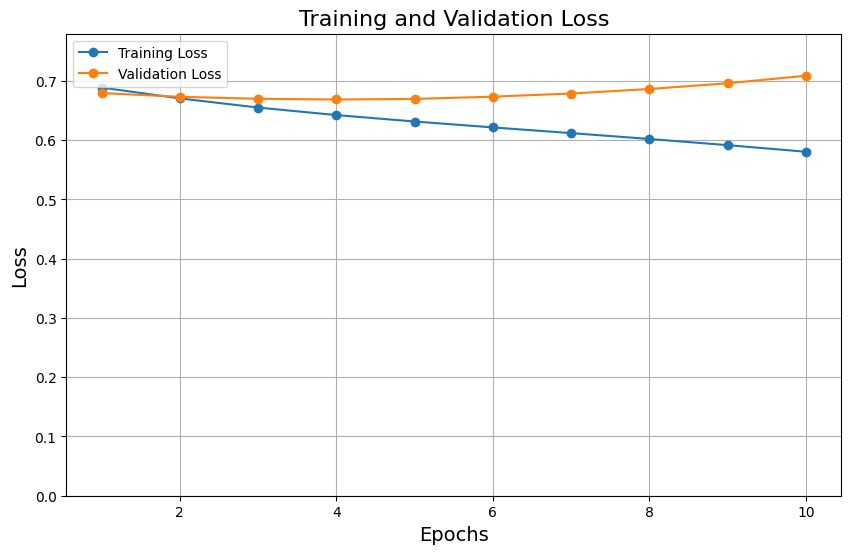

In [ ]:
# Plotting the loss curves
epochs = range(1, len(loss_df['train_loss']) + 1)
plt.figure(figsize=(10, 6))

# Plot training and validation loss
plt.plot(epochs, loss_df['train_loss'], label='Training Loss', marker='o')
plt.plot(epochs, loss_df['val_loss'], label='Validation Loss', marker='o')

# Setting y-axis to start from 0
plt.ylim(0, max(max(loss_df['train_loss']), max(loss_df['val_loss'])) * 1.1)  # Make y-axis start from 0 and go slightly beyond the max value

# Adding labels and title
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Adding legend and grid
plt.legend()
plt.grid(True)

#Save the image
plt.savefig("model_loss.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image


# Show the plot
plt.show()


### Model Evaluation

In [ ]:
# Loading the trained model
model.load_state_dict(torch.load('/content/drive/MyDrive/Dissertation Folder/Dissertation Datasets/model_epoch_6.pth'))

<All keys matched successfully>

In [ ]:
# Evaluate the model
def test_model(testing_dataloader, model, threshold=0.4):
    with torch.no_grad():
        actuals, predictions, pred_scores = list(), list(), list()
        for i, batch in enumerate(testing_dataloader):
            data, labels = batch
            # evaluate the model on the test set
            output = model(data)
            # retrieve numpy array
            output = output.detach().numpy()
            actual = labels.numpy()
            actual = actual.reshape((len(actual), 1))
            # Binarize predictions based on the threshold
            output_r = (output >= threshold).astype(int)
            # store
            predictions.append(output_r)
            pred_scores.append(output)
            actuals.append(actual)
        actuals, predictions, pred_scores = np.vstack(actuals), np.vstack(predictions), np.vstack(pred_scores)

        return actuals, predictions, pred_scores

In [ ]:
# Computing metrics
actuals, predictions, pred_scores = test_model(testing_dataloader, model)
results = metrics(actuals, predictions, pred_scores)
results

{'Accuracy': 0.5799034260749598,
 'Recall/Sensitivity': 0.7571848834577959,
 'Precision': 0.5645351779989877,
 'Specificity': 0.3968216873101192,
 'ROC_AUC': 0.6152738332069114,
 'MCC': 0.1652481735917562,
 'F1-Score': 0.6468200270635994,
 'Confusion Matrix': {'TN': 1698, 'FP': 2581, 'FN': 1073, 'TP': 3346}}

In [ ]:
metrics_df = pd.DataFrame(list(results.items()), columns=['Metric', 'Value'])

In [ ]:
metrics_df

Metric                                             Value
0            Accuracy                                          0.579903
1  Recall/Sensitivity                                          0.757185
2           Precision                                          0.564535
3         Specificity                                          0.396822
4             ROC_AUC                                          0.615274
5                 MCC                                          0.165248
6            F1-Score                                           0.64682
7    Confusion Matrix  {'TN': 1698, 'FP': 2581, 'FN': 1073, 'TP': 3346}

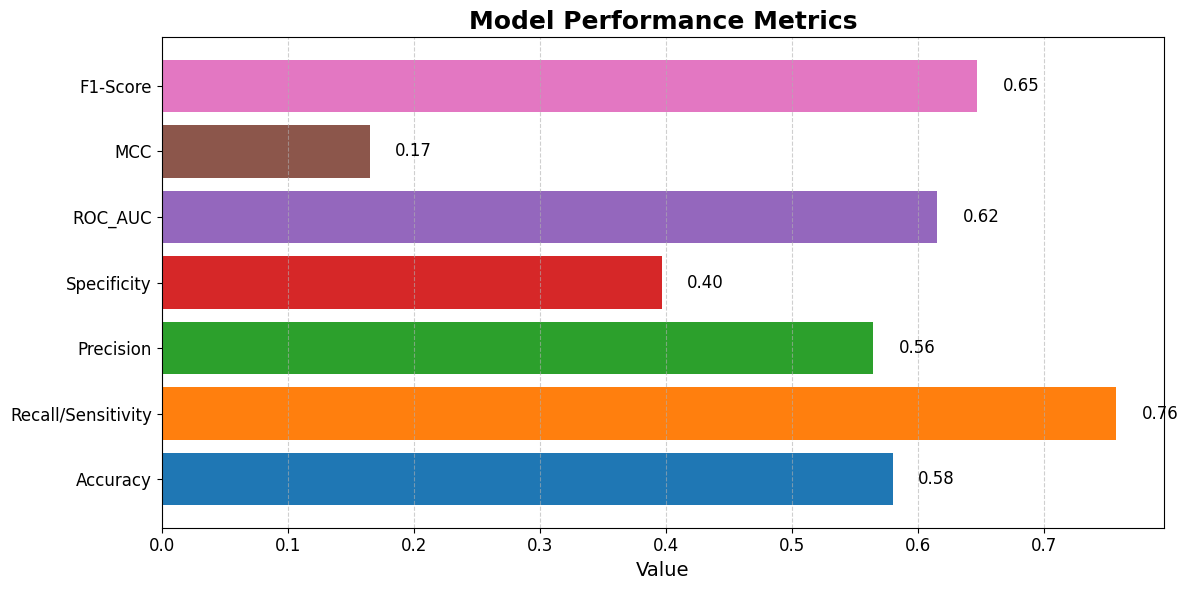

In [ ]:
# Plotting model performance

# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(metrics_df.iloc[:-1]['Metric'], metrics_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('Model Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Reduce unnecessary space around the plot
plt.tight_layout()

#Save the image
plt.savefig("nn_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


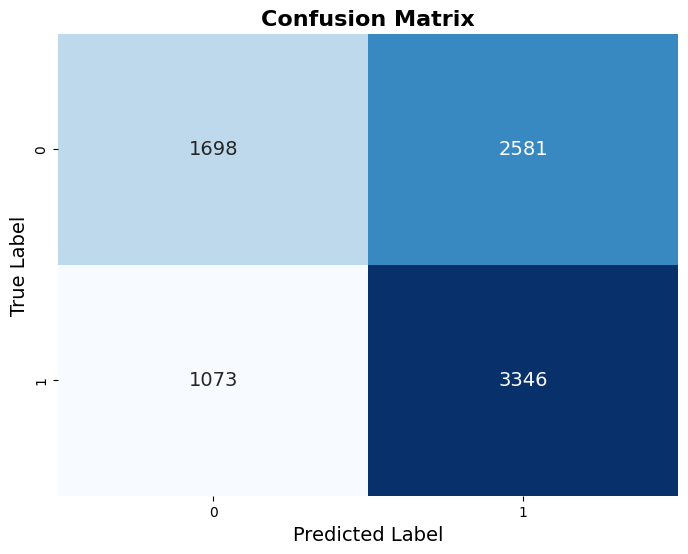

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(actuals, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("nn_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


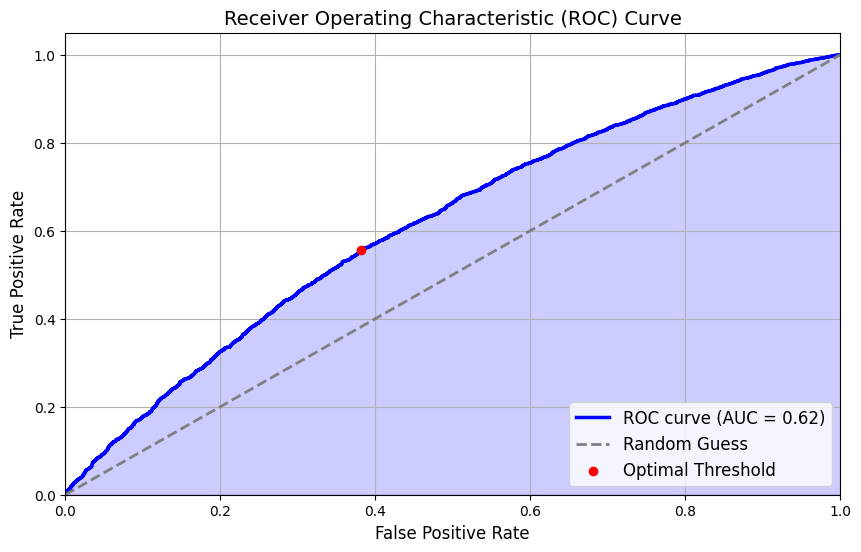

In [ ]:
# Plotting the ROC Curve
plot_roc_auc(actuals, pred_scores, results['ROC_AUC'], filename="nn_roc_auc.png", plot_title="Receiver Operating Characteristic (ROC) Curve")

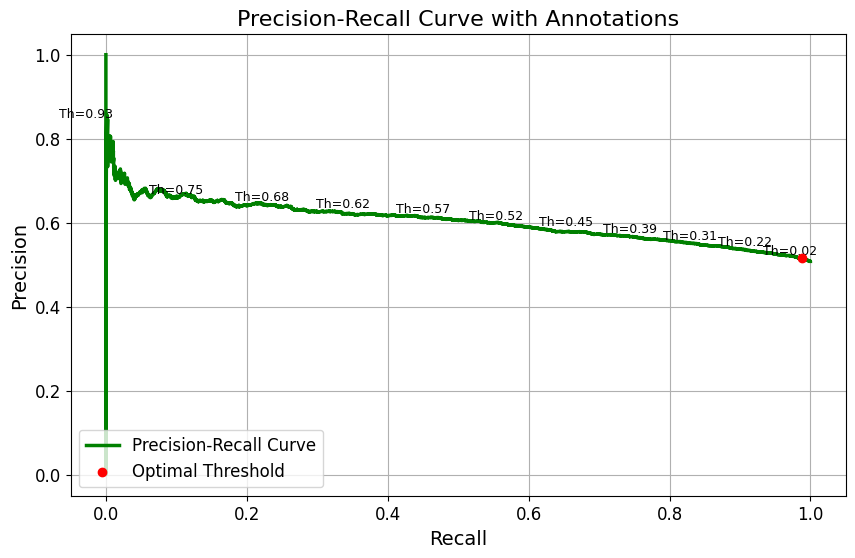

In [ ]:
# Plotting the precision recall curve
plot_precision_recall(actuals, pred_scores, filename="nn_pr_rec.png", plot_title="Precision-Recall Curve with Annotations")

In [ ]:
# make a class prediction for one row of data
def predict(row, model):
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    # yhat = yhat.round()
    return yhat

In [ ]:
input = test_dataset.data[1]
output = test_dataset.labels[1]

In [ ]:
predict(input, model)

array([0.7598511], dtype=float32)

In [ ]:
output

1.0

## Ensemble Classifiers

In [ ]:
# Specifying the training set
X_train = combined_train
y_train = training_all_transformed['remainder__labels'].to_numpy()

In [ ]:
# Specifying the testing set
X_test = combined_test
y_test = testing_all_transformed['remainder__labels'].to_numpy()

In [ ]:
# Specifying the validation set
X_val = combined_val
y_val = validation_all_transformed['remainder__labels'].to_numpy()

In [ ]:
# Converting the data to numpy arrays
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_val = X_val.astype(np.float32)

In [ ]:
# Converting the data to numpy arrays
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
y_val = y_val.astype(np.int32)

### Hyper Parameter Tuning
Commenting this out

In [ ]:
# Define models and their hyperparameter spaces to carry out a search
# models = {
    # 'Adaboost': (AdaBoostClassifier(),{
    #     'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 1],
    #     'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
    #     'estimator': [DecisionTreeClassifier(max_depth=3), LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()],
    #     'random_state': [0,1,42,101]
    # }),
    # 'Gradboost': (GradientBoostingClassifier(),{
    #     'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1],
    #     'n_estimators' : [100, 200, 300, 400, 800, 1000, 1500],
    #     'max_depth': [1, 2, 3, 4, 5, 6, 7]
    #   }),
    #  'lgbm': (LGBMClassifier(objective='binary', verbose=-1), {
#         'boosting_type': ['gbdt', 'dart', 'goss', 'random_forest'],
#         'learning_rate' : [0.01, 0.02, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.8, 1],
#         'n_estimators' : [50, 100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         #'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#         'min_child_samples': np.arange(1,30,2),
#         'max_depth': [1, 2, 3, 4, 5, 6, 7],
#         'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#         'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
#         'num_leaves': np.arange(1,50),
#         'feature_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#         'bagging_fraction': [0.01, 0.02, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.8,1]
#     }),
# 'ET': (ExtraTreesClassifier(verbose=0, n_jobs=-1, bootstrap=True),{
#         'criterion': ['gini', 'log_loss', 'entropy'],
#         'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'max_depth': [None, 5,10, 20],
#         'min_samples_split': [2,3,4,5,6],
#         'class_weight':[None, 'balanced'],
#         'max_features':['sqrt', 'log2',None],
#         'max_leaf_nodes':np.arange(2,10),
#         'max_samples':np.arange(1,21),
#         'min_samples_leaf':[1,2,3,4,5,6],
#         'random_state':np.arange(0,1000, 5),
#         'warm_start':[False, True]
#       })
# }


# Perform hyperparameter tuning
# best_params = {}
# tuned_models = {}

# # Wrap the loop with tqdm to show a progress bar
# for model_name, (model, param_grid) in models.items():
#     # You can choose between GridSearchCV, RandomizedSearchCV, or BayesSearchCV
#     # search = BayesSearchCV(model, search_spaces=param_grid, cv=5, verbose=1, error_score='raise', scoring='accuracy')
#     search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5, verbose=3, cv=2, error_score='raise', scoring='accuracy')
#     # Fit the model to the training data
#     search.fit(X_train, y_train)

#     # Save the best parameters and the tuned model
#     best_params[model_name] = search.best_params_
#     tuned_models[f"{model_name}_model"] = model.set_params(**best_params[model_name])

# # Print the best parameters and tuned models
# print(best_params)
# print(tuned_models)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
tuned_models

{'lgbm_model': LGBMClassifier(bagging_fraction=0.2, feature_fraction=0.8, learning_rate=0.05,
                max_depth=7, min_child_samples=19, n_estimators=800,
                num_leaves=29, objective='binary', reg_alpha=5, reg_lambda=1,
                verbose=-1),
 'ET_model': ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_depth=20,
                      max_features=None, max_leaf_nodes=3, max_samples=15,
                      min_samples_split=5, n_estimators=2000, n_jobs=-1,
                      random_state=995)}

In [ ]:
#The final ML models
ml_models={'xgb_model': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss'),
           'Adaboost_model': AdaBoostClassifier(LogisticRegression(), learning_rate=0.01,
                   n_estimators=1500, random_state=1),
           'Dectree_model': DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=3),
           'Gradboost': GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 100, max_depth = 6),
           'lgbm_model': LGBMClassifier(bagging_fraction=0.08, feature_fraction=0.2, learning_rate=0.02,
               max_depth=7, min_child_samples=7, n_estimators=500,
               num_leaves=36, objective='binary', reg_alpha=5, reg_lambda=0,
               verbose=-1)
           }

### Gradient Boosting Classifier

In [ ]:
# Fitting the model
ml_models['Gradboost'].fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6)

In [ ]:
# Predicting on the X test
y_prob_gb = ml_models['Gradboost'].predict_proba(X_test)[:, 1]  # LGBM predicted probabilities
y_gb = ml_models['Gradboost'].predict(X_test)

In [ ]:
# Computing metrics
gb_results = metrics(y_test, y_lgbm, y_prob_lgbm)

In [ ]:
# Displaying the results
gb_results

{'Accuracy': 0.6309496435962291,
 'Recall/Sensitivity': 0.6591989137813985,
 'Precision': 0.6309291747888239,
 'Specificity': 0.6017761159149334,
 'ROC_AUC': 0.6777542491760891,
 'MCC': 0.26143809181654737,
 'F1-Score': 0.6447543160690571,
 'Confusion Matrix': {'TN': 2575, 'FP': 1704, 'FN': 1506, 'TP': 2913}}

In [ ]:
# Converting the results to a dataframe
gb_df = pd.DataFrame(list(gb_results.items()), columns=['Metric', 'Value'])
gb_df

Metric                                             Value
0            Accuracy                                           0.63095
1  Recall/Sensitivity                                          0.659199
2           Precision                                          0.630929
3         Specificity                                          0.601776
4             ROC_AUC                                          0.677754
5                 MCC                                          0.261438
6            F1-Score                                          0.644754
7    Confusion Matrix  {'TN': 2575, 'FP': 1704, 'FN': 1506, 'TP': 2913}

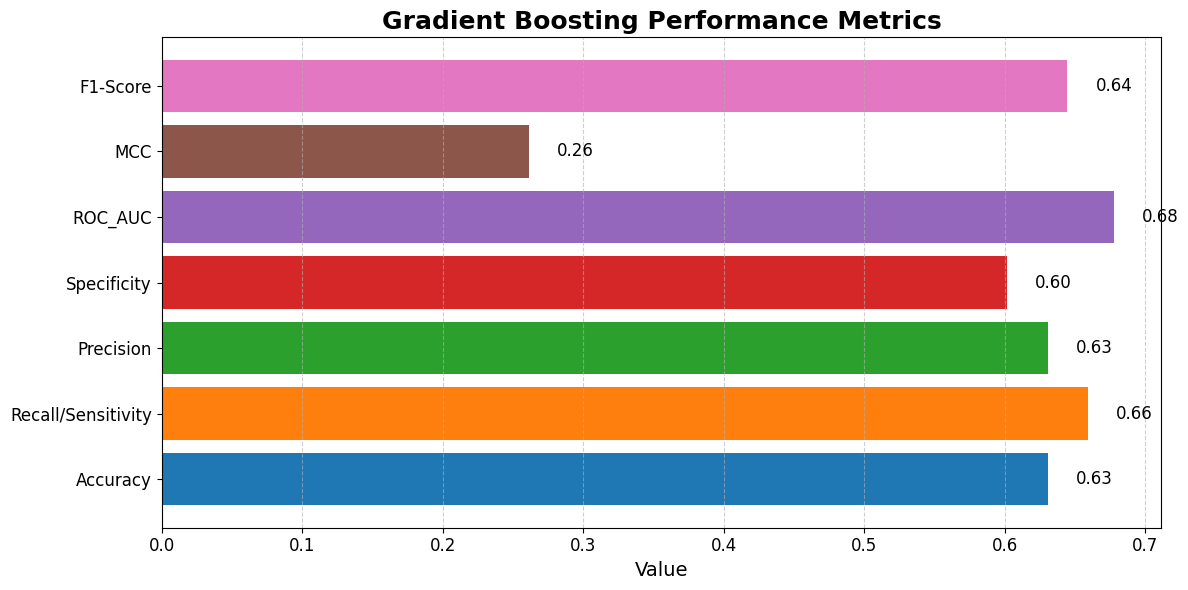

In [ ]:
# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(gb_df.iloc[:-1]['Metric'], gb_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('Gradient Boosting Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Reduce unnecessary space around the plot
plt.tight_layout()

#Save the image
plt.savefig("gb_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


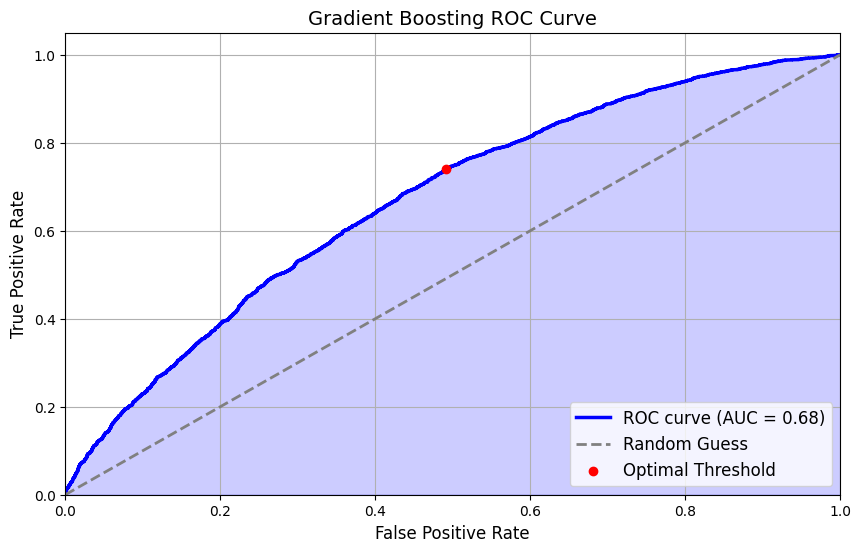

In [ ]:
# Plotting the AUROC Curve
plot_roc_auc(y_test, y_prob_gb, gb_results['ROC_AUC'], 'gb_roc_auc.png',  'Gradient Boosting ROC Curve')

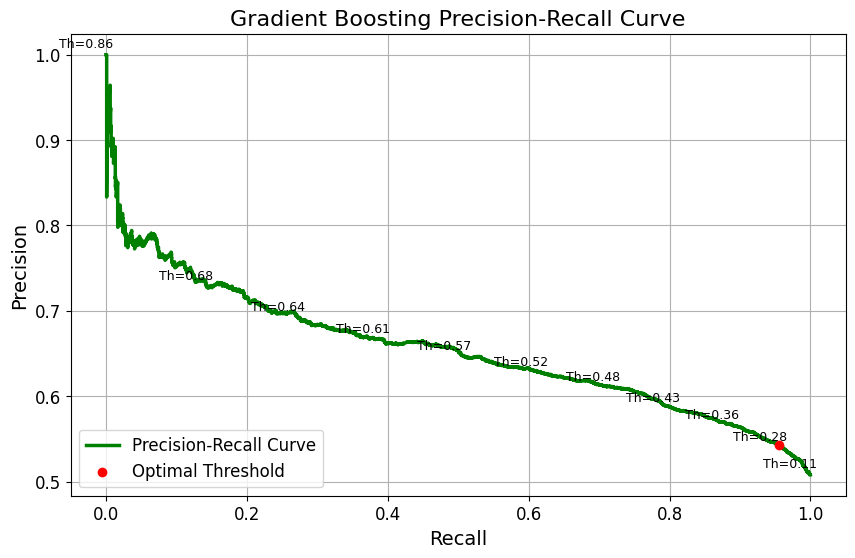

In [ ]:
# Plotting the Precision Recall curve
plot_precision_recall(y_test, y_prob_gb, "gb_pr_rec.png", 'Gradient Boosting Precision-Recall Curve')

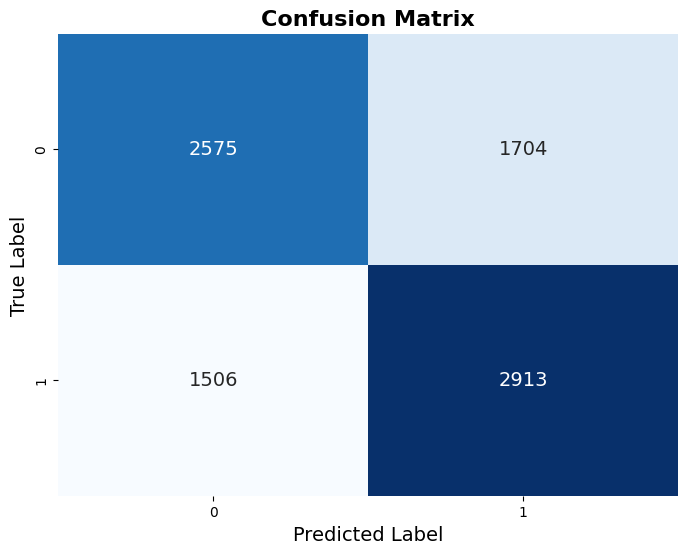

In [ ]:
# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("gb_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


### Extreme Gradient Boosting Classifier

In [ ]:
# Fitting the model
ml_models['xgb_model'].fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Checking Feature Importance
from xgboost import plot_importance
booster = ml_models['xgb_model'].get_booster()

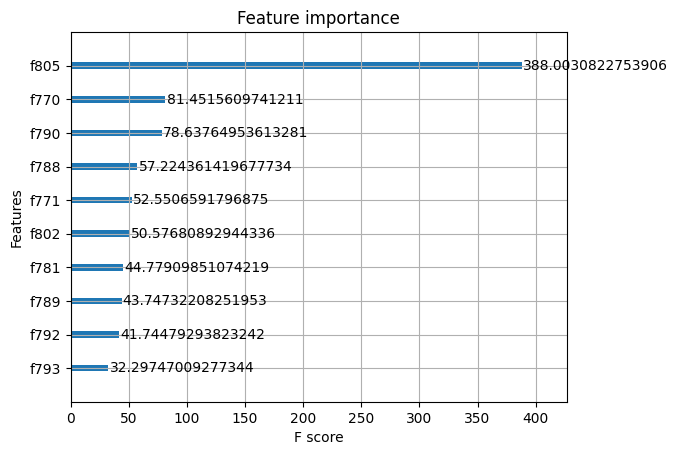

In [ ]:
# Get feature importance using different metrics (gain, weight, cover)
importance_by_gain = booster.get_score(importance_type='gain')
importance_by_weight = booster.get_score(importance_type='weight')
importance_by_cover = booster.get_score(importance_type='cover')

# Plot feature importance based on Gain (default)
plot_importance(ml_models['xgb_model'], importance_type='gain', max_num_features=10)
plt.show()

In [ ]:
# Store the predicted probabilities
y_prob_xgb = ml_models['xgb_model'].predict_proba(X_test)[:, 1]  # XGBoost predicted probabilities
y_xgb = ml_models['xgb_model'].predict(X_test)

In [ ]:
# Computing metrics
xgb_results = metrics(y_test, y_xgb, y_prob_xgb)

In [ ]:
# Displaying the results
xgb_results

{'Accuracy': 0.6206024373419177,
 'Recall/Sensitivity': 0.6634985290789771,
 'Precision': 0.617913593256059,
 'Specificity': 0.5763028745033887,
 'ROC_AUC': 0.6631518669435099,
 'MCC': 0.24077054133859258,
 'F1-Score': 0.6398952422522916,
 'Confusion Matrix': {'TN': 2466, 'FP': 1813, 'FN': 1487, 'TP': 2932}}

In [ ]:
# Converting the results to a dataframe
xgb_df = pd.DataFrame(list(xgb_results.items()), columns=['Metric', 'Value'])
xgb_df

Metric                                             Value
0            Accuracy                                          0.620602
1  Recall/Sensitivity                                          0.663499
2           Precision                                          0.617914
3         Specificity                                          0.576303
4             ROC_AUC                                          0.663152
5                 MCC                                          0.240771
6            F1-Score                                          0.639895
7    Confusion Matrix  {'TN': 2466, 'FP': 1813, 'FN': 1487, 'TP': 2932}

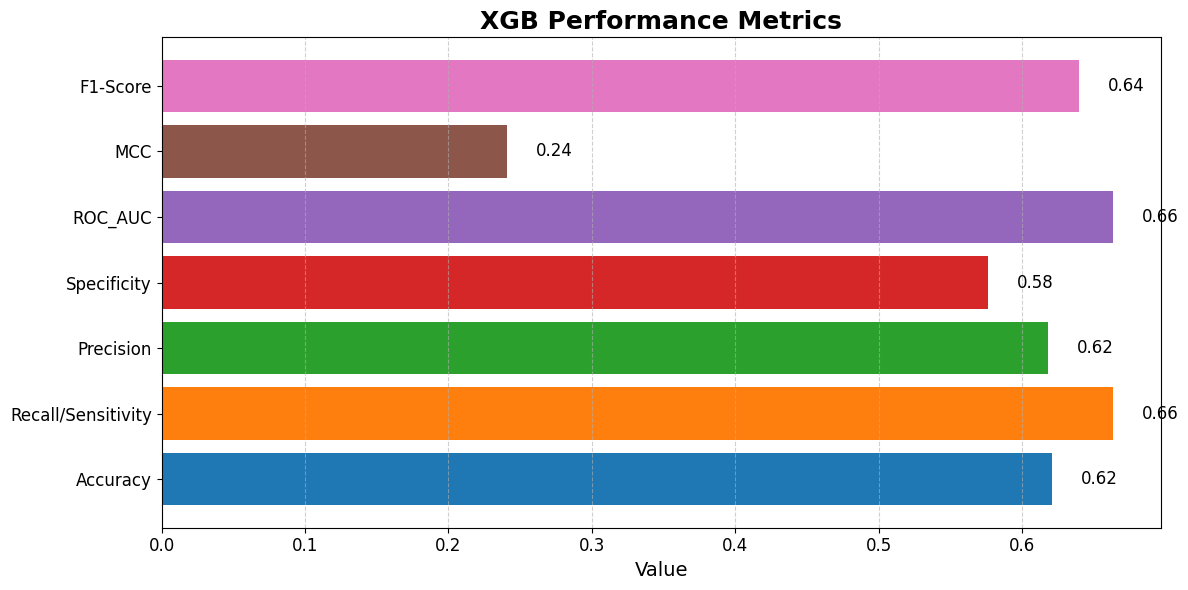

In [ ]:
# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(xgb_df.iloc[:-1]['Metric'], xgb_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('XGB Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Reduce unnecessary space around the plot
plt.tight_layout()

#Save the image
plt.savefig("xgb_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


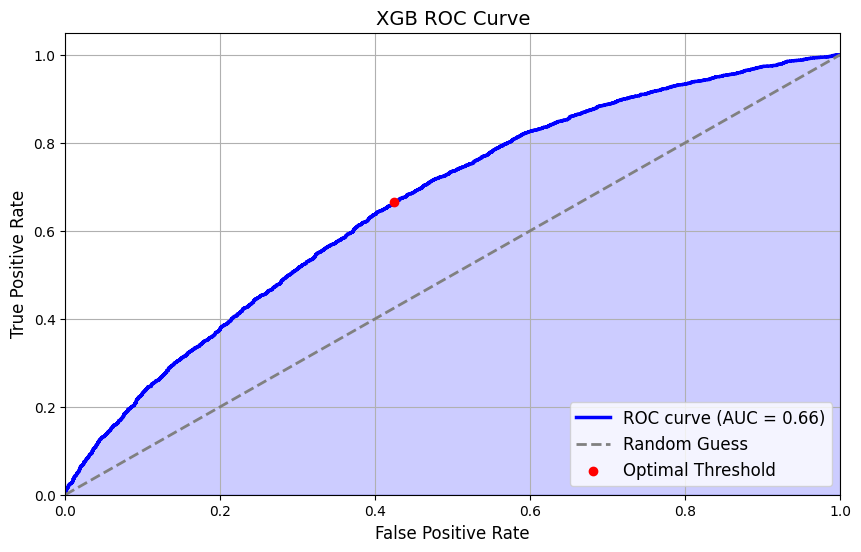

In [ ]:
# Plotting the AUROC Curve
plot_roc_auc(y_test, y_prob_xgb, xgb_results['ROC_AUC'], 'xgb_roc_auc.png',  'XGB ROC Curve')

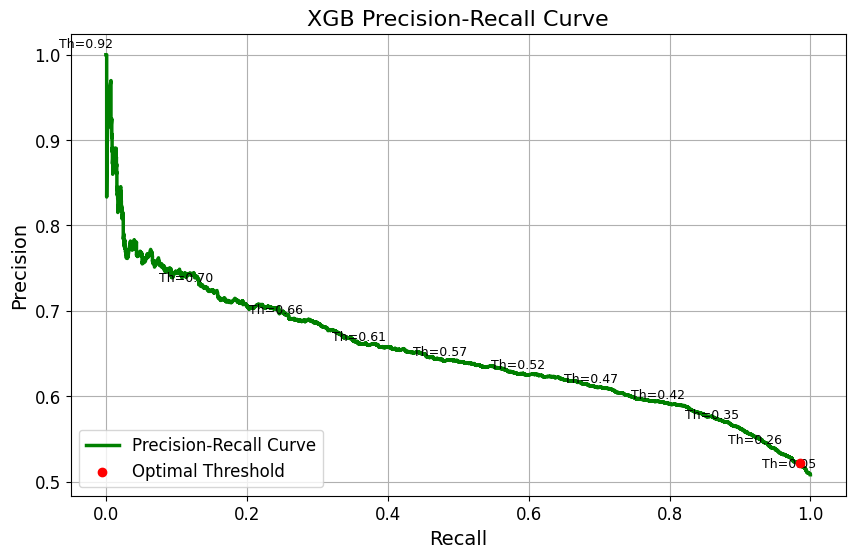

In [ ]:
# Plotting the Precision Recall curve
plot_precision_recall(y_test, y_prob_xgb, "xgb_pr_rec.png", 'XGB Precision-Recall Curve')

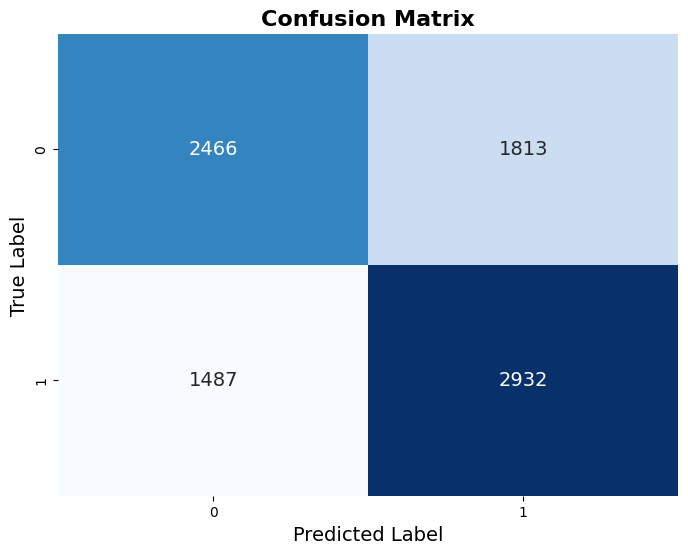

In [ ]:
# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("xgb_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


### Light Gradient Boosting Machine

In [ ]:
# Fitting the model
ml_models['lgbm_model'].fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.08, feature_fraction=0.2, learning_rate=0.02,
               max_depth=7, min_child_samples=7, n_estimators=500,
               num_leaves=36, objective='binary', reg_alpha=5, reg_lambda=0,
               verbose=-1)

In [ ]:
# Predicting on the X test
y_prob_lgbm = ml_models['lgbm_model'].predict_proba(X_test)[:, 1]  # LGBM predicted probabilities
y_lgbm = ml_models['lgbm_model'].predict(X_test)

In [ ]:
# Computing metrics
lgbm_results = metrics(y_test, y_lgbm, y_prob_lgbm)

In [ ]:
# Displaying the results
lgbm_results

{'Accuracy': 0.6309496435962291,
 'Recall/Sensitivity': 0.6591989137813985,
 'Precision': 0.6309291747888239,
 'Specificity': 0.6017761159149334,
 'ROC_AUC': 0.6777542491760891,
 'MCC': 0.26143809181654737,
 'F1-Score': 0.6447543160690571,
 'Confusion Matrix': {'TN': 2575, 'FP': 1704, 'FN': 1506, 'TP': 2913}}

In [ ]:
# Converting the results to a dataframe
lgbm_df = pd.DataFrame(list(lgbm_results.items()), columns=['Metric', 'Value'])
lgbm_df

Metric                                             Value
0            Accuracy                                           0.63095
1  Recall/Sensitivity                                          0.659199
2           Precision                                          0.630929
3         Specificity                                          0.601776
4             ROC_AUC                                          0.677754
5                 MCC                                          0.261438
6            F1-Score                                          0.644754
7    Confusion Matrix  {'TN': 2575, 'FP': 1704, 'FN': 1506, 'TP': 2913}

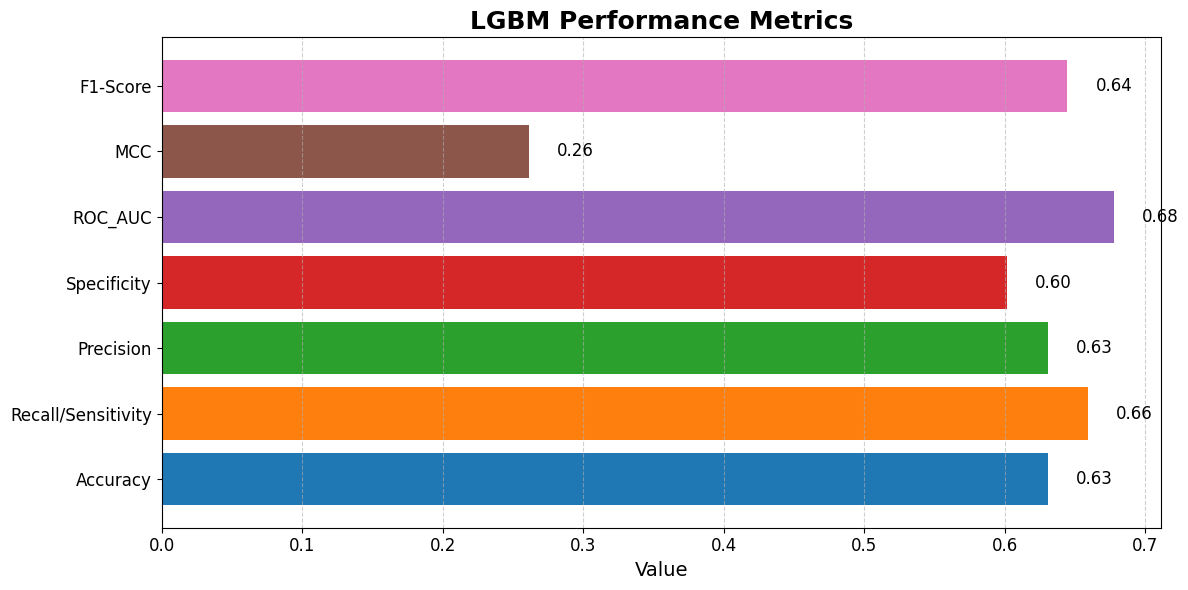

In [ ]:
# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(lgbm_df.iloc[:-1]['Metric'], lgbm_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('LGBM Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Reduce unnecessary space around the plot
plt.tight_layout()

#Save the image
plt.savefig("lgbm_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


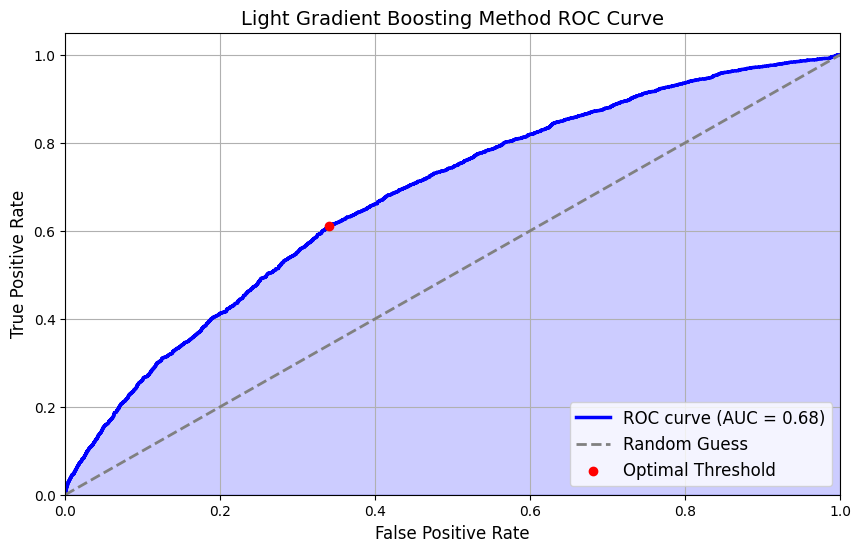

In [ ]:
# Plotting the AUROC Curve
plot_roc_auc(y_test, y_prob_lgbm, lgbm_results['ROC_AUC'], 'lgbm_roc_auc.png',  'Light Gradient Boosting Method ROC Curve')

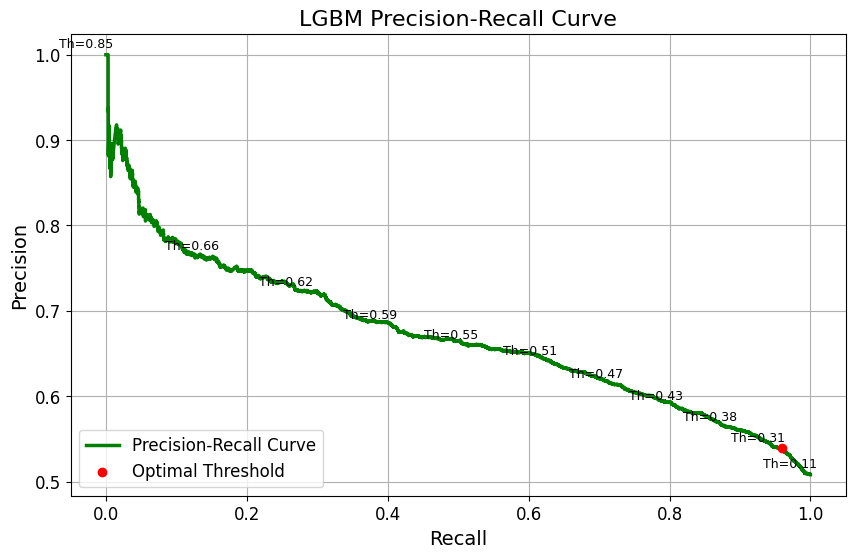

In [ ]:
# Plotting the Precision Recall curve
plot_precision_recall(y_test, y_prob_lgbm, "lgbm_pr_rec.png", 'LGBM Precision-Recall Curve')

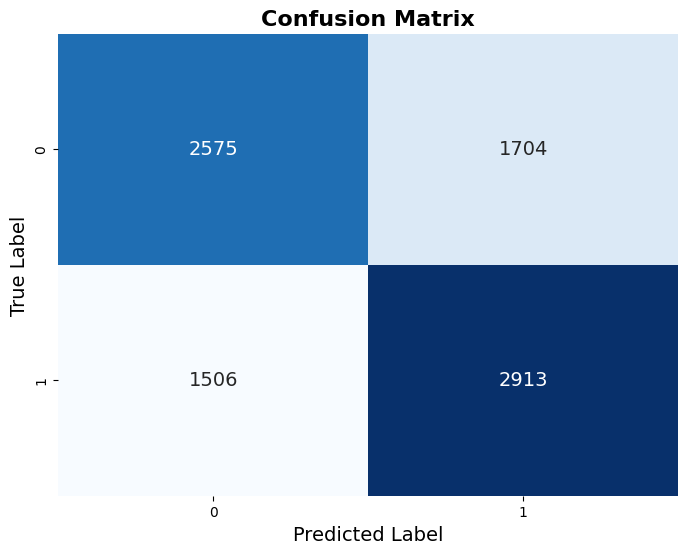

In [ ]:
# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("lgbm_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


### Adaptive Boosting Classifier

In [ ]:
# Fitting the model
ml_models['Adaboost_model'].fit(X_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=1500, random_state=1)

In [ ]:
# Predicting on the X test
y_prob_ada = ml_models['Adaboost_model'].predict_proba(X_test)[:, 1]  # AdaBoost predicted probabilities
y_ada = ml_models['Adaboost_model'].predict(X_test)

In [ ]:
# Computing metrics
ada_results = metrics(y_test, y_ada, y_prob_ada)

In [ ]:
# Displaying the results
ada_results

{'Accuracy': 0.5877213152448839,
 'Recall/Sensitivity': 0.5682281059063137,
 'Precision': 0.5994270708999762,
 'Specificity': 0.6078523019397055,
 'ROC_AUC': 0.627520340817269,
 'MCC': 0.17617686664501284,
 'F1-Score': 0.583410780669145,
 'Confusion Matrix': {'TN': 2601, 'FP': 1678, 'FN': 1908, 'TP': 2511}}

In [ ]:
# Converting the results to a dataframe
ada_df = pd.DataFrame(list(ada_results.items()), columns=['Metric', 'Value'])
ada_df

Metric                                             Value
0            Accuracy                                          0.587721
1  Recall/Sensitivity                                          0.568228
2           Precision                                          0.599427
3         Specificity                                          0.607852
4             ROC_AUC                                           0.62752
5                 MCC                                          0.176177
6            F1-Score                                          0.583411
7    Confusion Matrix  {'TN': 2601, 'FP': 1678, 'FN': 1908, 'TP': 2511}

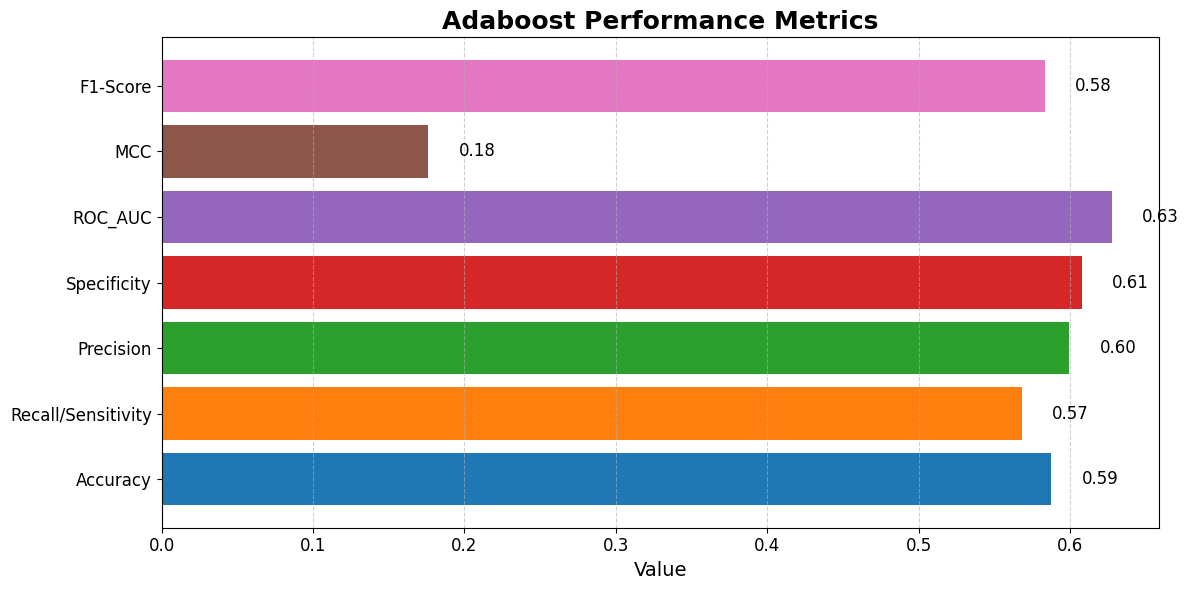

In [ ]:
# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(ada_df.iloc[:-1]['Metric'], ada_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('Adaboost Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Reduce unnecessary space around the plot
plt.tight_layout()

#Save the image
plt.savefig("ada_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


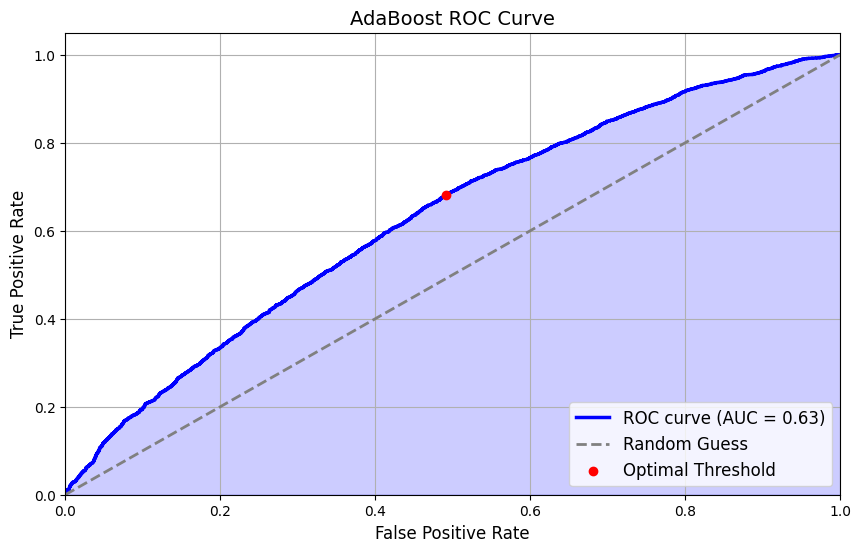

In [ ]:
# Plotting the AUROC Curve
plot_roc_auc(y_test, y_prob_ada, ada_results['ROC_AUC'], 'ada_roc_auc.png', 'AdaBoost ROC Curve')

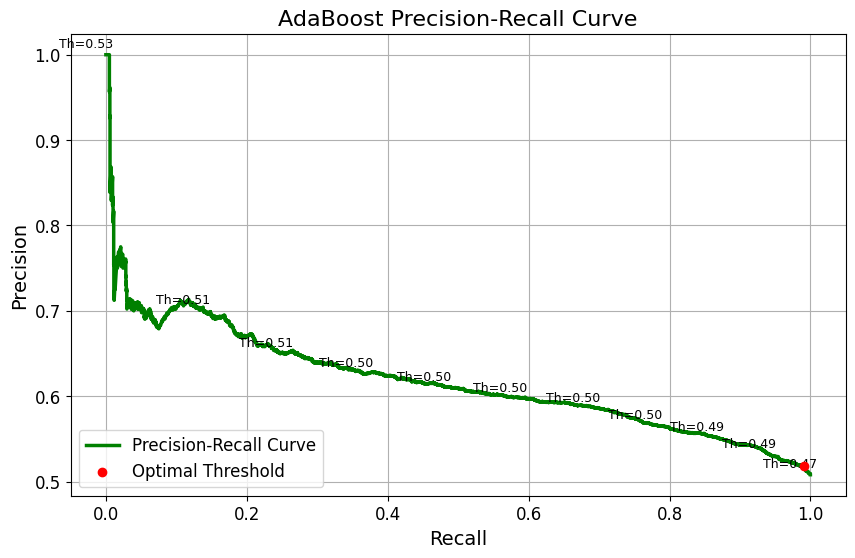

In [ ]:
# Plotting the Precision Recall curve
plot_precision_recall(y_test, y_prob_ada, "ada_pr_rec.png", 'AdaBoost Precision-Recall Curve')

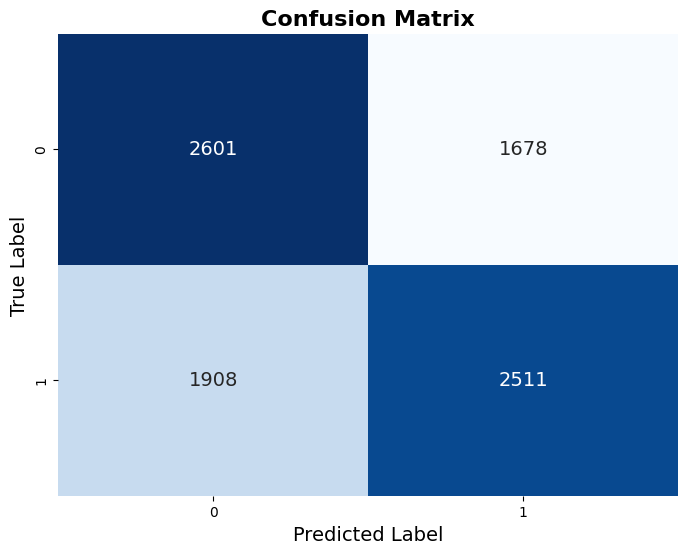

In [ ]:
# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("ada_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


### Stacking Classifier

In [ ]:
# Define base models (level-0 models)
base_estimators = [
    ('lgbm', LGBMClassifier(bagging_fraction=0.08, feature_fraction=0.2, learning_rate=0.02,
               max_depth=7, min_child_samples=7, n_estimators=500,
               num_leaves=36, objective='binary', reg_alpha=5, reg_lambda=0,
               verbose=-1)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta-model (level-1 model) (commonly, logistic regression is used)
meta_model = ExtraTreesClassifier(bootstrap=True,
                     criterion='entropy', max_depth=15, max_features='sqrt',
                     max_leaf_nodes=6, max_samples=18, min_samples_split=4,
                     n_estimators=200, n_jobs=-1, random_state=690,
                     warm_start=True)

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=base_estimators,      # Base level models
    final_estimator=meta_model,      # Meta-model
    cv=3,                            # Number of cross-validation folds
    stack_method='auto',             # Method used to get the base model predictions
    n_jobs=-1,
    passthrough=False
)

# Fitting the Stacking Classifier to the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
stacking_predictions = stacking_classifier.predict(X_test)
stacking_scores = stacking_classifier.predict_proba(X_test)[:, 1]

# Evaluating the Stacking Classifier
stack_results = metrics(y_test, stacking_predictions, stacking_scores)
print(stack_results)

# Print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, stacking_predictions))
print("\nClassification Report:\n", classification_report(y_test, stacking_predictions))


{'Accuracy': 0.6262359163025983, 'Recall/Sensitivity': 0.7028739533831183, 'Precision': 0.6157811260904045, 'Specificity': 0.5470904416919841, 'ROC_AUC': 0.6736476646633245, 'MCC': 0.2531858823445288, 'F1-Score': 0.6564514424601078, 'Confusion Matrix': {'TN': 2341, 'FP': 1938, 'FN': 1313, 'TP': 3106}}
Confusion Matrix:
 [[2341 1938]
 [1313 3106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.55      0.59      4279
           1       0.62      0.70      0.66      4419

    accuracy                           0.63      8698
   macro avg       0.63      0.62      0.62      8698
weighted avg       0.63      0.63      0.62      8698



In [ ]:
# Displaying the results
stack_results

{'Accuracy': 0.6262359163025983,
 'Recall/Sensitivity': 0.7028739533831183,
 'Precision': 0.6157811260904045,
 'Specificity': 0.5470904416919841,
 'ROC_AUC': 0.6736476646633245,
 'MCC': 0.2531858823445288,
 'F1-Score': 0.6564514424601078,
 'Confusion Matrix': {'TN': 2341, 'FP': 1938, 'FN': 1313, 'TP': 3106}}

In [ ]:
# Converting the results to a dataframe
stack_df = pd.DataFrame(list(stack_results.items()), columns=['Metric', 'Value'])
stack_df

Metric                                             Value
0            Accuracy                                          0.626236
1  Recall/Sensitivity                                          0.702874
2           Precision                                          0.615781
3         Specificity                                           0.54709
4             ROC_AUC                                          0.673648
5                 MCC                                          0.253186
6            F1-Score                                          0.656451
7    Confusion Matrix  {'TN': 2341, 'FP': 1938, 'FN': 1313, 'TP': 3106}

### Voting Classifier

In [ ]:
#Creating ensemble model
voting_classifier = VotingClassifier(estimators=[('lgbm',ml_models['lgbm_model']),
                                                 ('stacking',stacking_classifier),
                                                #  ('lr',final_models['lgbm_model'])
                                                 ], voting='soft', verbose=False)

#Fitting ensemble model to data
voting_classifier.fit(X_train,y_train)

# Making predictions with ensemble model
ensemble_scores = voting_classifier.predict_proba(X_test)[:, 1]
ensemble_predictions = voting_classifier.predict(X_test)

# Evaluating ensemble performance
ensemble_results = metrics(y_test, ensemble_predictions, ensemble_scores)
print(ensemble_results)
print(confusion_matrix(y_test, ensemble_predictions))
print('\n')
print(classification_report(y_test, ensemble_predictions))

{'Accuracy': 0.6316394573465164, 'Recall/Sensitivity': 0.6836388323150034, 'Precision': 0.6258545680546923, 'Specificity': 0.5779387707408273, 'ROC_AUC': 0.6773796636832569, 'MCC': 0.26313793657074547, 'F1-Score': 0.6534717715768981, 'Confusion Matrix': {'TN': 2473, 'FP': 1806, 'FN': 1398, 'TP': 3021}}
[[2473 1806]
 [1398 3021]]


              precision    recall  f1-score   support

           0       0.64      0.58      0.61      4279
           1       0.63      0.68      0.65      4419

    accuracy                           0.63      8698
   macro avg       0.63      0.63      0.63      8698
weighted avg       0.63      0.63      0.63      8698



In [ ]:
# Displaying the results
ensemble_results

{'Accuracy': 0.6316394573465164,
 'Recall/Sensitivity': 0.6836388323150034,
 'Precision': 0.6258545680546923,
 'Specificity': 0.5779387707408273,
 'ROC_AUC': 0.6773796636832569,
 'MCC': 0.26313793657074547,
 'F1-Score': 0.6534717715768981,
 'Confusion Matrix': {'TN': 2473, 'FP': 1806, 'FN': 1398, 'TP': 3021}}

In [ ]:
# Converting the results to a dataframe
ensemble_df = pd.DataFrame(list(ensemble_results.items()), columns=['Metric', 'Value'])
ensemble_df

Metric                                             Value
0            Accuracy                                          0.631639
1  Recall/Sensitivity                                          0.683639
2           Precision                                          0.625855
3         Specificity                                          0.577939
4             ROC_AUC                                           0.67738
5                 MCC                                          0.263138
6            F1-Score                                          0.653472
7    Confusion Matrix  {'TN': 2473, 'FP': 1806, 'FN': 1398, 'TP': 3021}

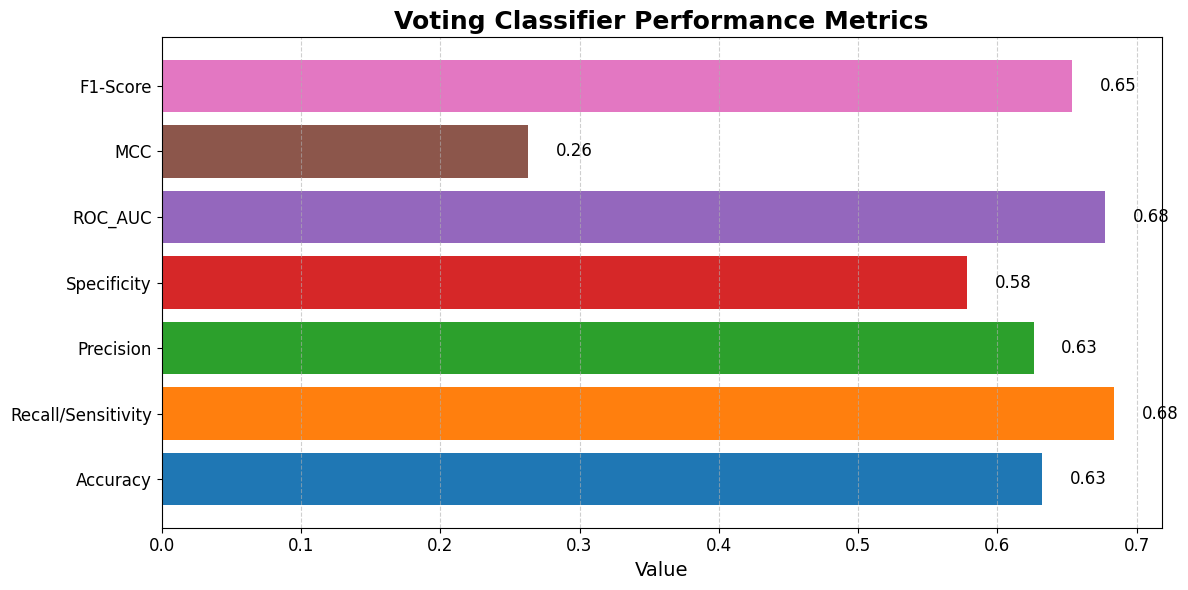

In [ ]:
# Assign different colors to each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the metrics as bar charts with different colors
plt.figure(figsize=(12, 6))  # Slightly larger figure for better readability

# Create the horizontal bar chart
bars = plt.barh(ensemble_df.iloc[:-1]['Metric'], ensemble_df.iloc[:-1]['Value'], color=colors)

# Adding text annotations for each bar
for bar in bars:
    width = bar.get_width()  # Get the value of each bar (width)
    plt.text(width + 0.02,  # Position the text slightly right of the bar
             bar.get_y() + bar.get_height()/2,  # Center the text vertically
             f'{width:.2f}',  # Format the value with two decimal places
             va='center', fontsize=12, color='black')  # Adjust font size and color

# Improve layout: adding labels, title, grid
plt.xlabel('Value', fontsize=14)
plt.title('Voting Classifier Performance Metrics', fontsize=18, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Light dashed gridlines for the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Reduce unnecessary space around the plot
plt.tight_layout()

#Save the image
plt.savefig("voting_model_perf.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


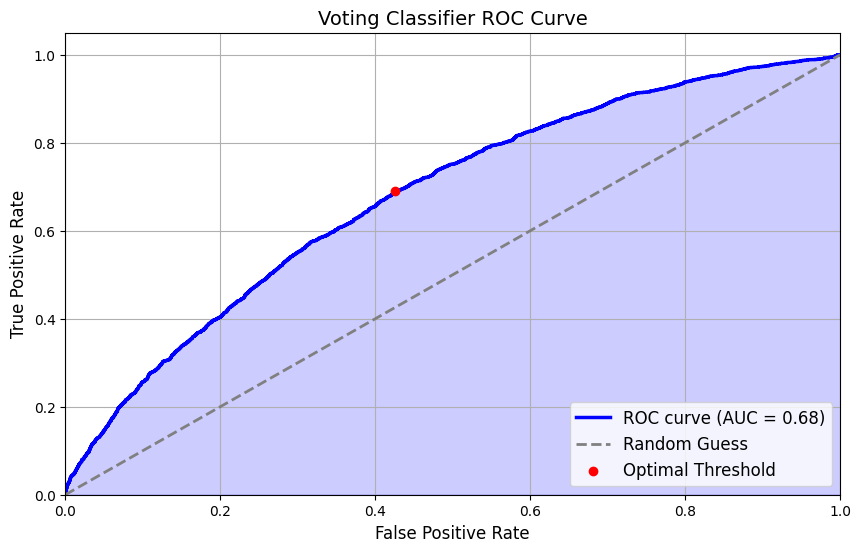

In [ ]:
# Plotting the AUROC Curve
plot_roc_auc(y_test, ensemble_scores, ensemble_results['ROC_AUC'], 'ensemble_roc_auc.png', 'Voting Classifier ROC Curve')

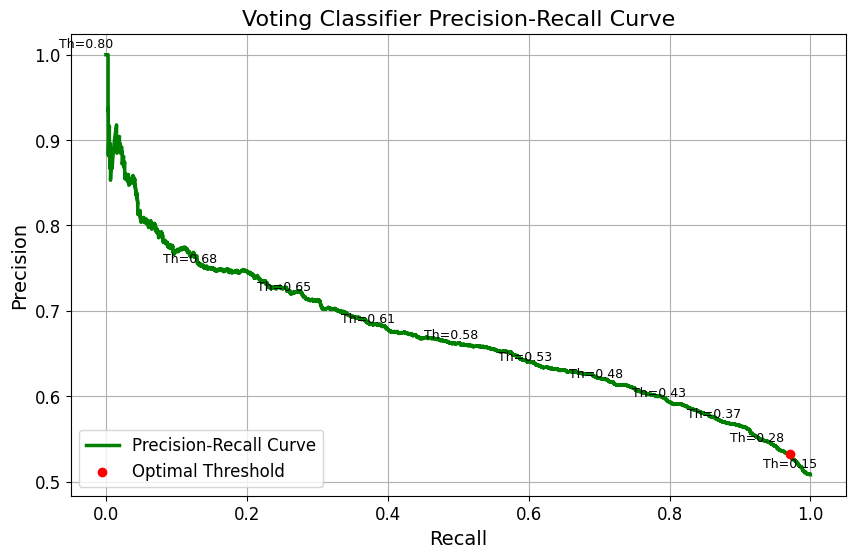

In [ ]:
# Plotting the Precision Recall curve
plot_precision_recall(y_test, ensemble_scores, "ensemble_pr_rec.png", 'Voting Classifier Precision-Recall Curve')

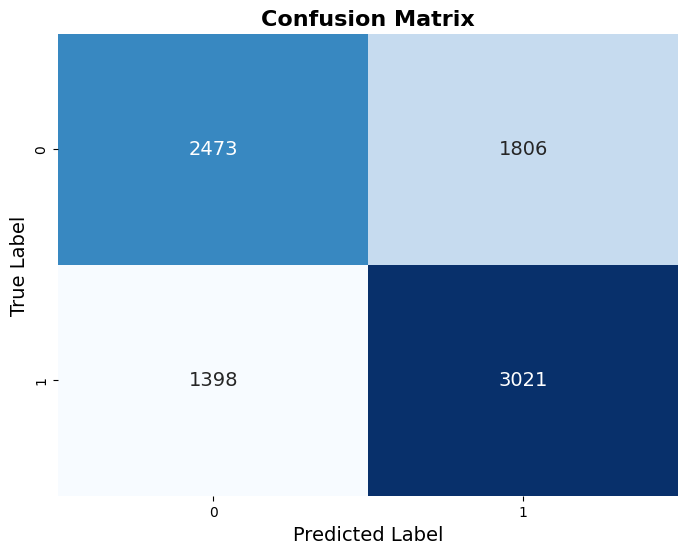

In [ ]:
# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, ensemble_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

#Save the image
plt.savefig("voting_conf_mat.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()


# Comparative Analysis

Storing the results of the models in a list because running it everytime is time-consuming

In [ ]:
# Storing all the results in a list
Model_results = [{'Model': 'PubMedBERT',
    'Accuracy': 0.599608651964673,
 'Recall/Sensitivity': 0.6881042027068281,
 'Precision': 0.6001064962726305,
 'Specificity': 0.5038537767011672,
 'F1-Score': 0.6410997866793079,
 'ROC_AUC': 0.6427958303177004,
 'MCC': 0.19543794057431488,
 'Confusion Matrix': {'TN': 4576, 'FP': 4506, 'FN': 3065, 'TP': 6762},
 'cm': ([[4576, 4506],
        [3065, 6762]])},

{'Accuracy': 0.6206024373419177,
 'Recall/Sensitivity': 0.6634985290789771,
 'Precision': 0.617913593256059,
 'Specificity': 0.5763028745033887,
 'ROC_AUC': 0.6631518669435099,
 'MCC': 0.24077054133859258,
 'F1-Score': 0.6398952422522916,
 'Confusion Matrix': {'TN': 2466, 'FP': 1813, 'FN': 1487, 'TP': 2932},
  'Model': 'ClinicalT5 + XGBClassifier',
  'cm': ([[2466, 1813],
        [1487, 2932]])},

 {'Accuracy': 0.6309496435962291,
 'Recall/Sensitivity': 0.6591989137813985,
 'Precision': 0.6309291747888239,
 'Specificity': 0.6017761159149334,
 'ROC_AUC': 0.6777542491760891,
 'MCC': 0.26143809181654737,
 'F1-Score': 0.6447543160690571,
 'Confusion Matrix': {'TN': 2575, 'FP': 1704, 'FN': 1506, 'TP': 2913},
  'Model': 'ClinicalT5 + LGBM',
   'cm': ([[2575, 1704],
        [1506, 2913]])},

{'Accuracy': 0.5799034260749598,
 'Recall/Sensitivity': 0.7571848834577959,
 'Precision': 0.5645351779989877,
 'Specificity': 0.3968216873101192,
 'ROC_AUC': 0.6152738332069114,
 'MCC': 0.1652481735917562,
 'F1-Score': 0.6468200270635994,
 'Confusion Matrix': {'TN': 1698, 'FP': 2581, 'FN': 1073, 'TP': 3346},
  'Model': 'ClinicalT5 + Neural Network',
  'cm': ([[1698, 2581],
         [1073, 3346]])},

{'Accuracy': 0.6316394573465164,
 'Recall/Sensitivity': 0.6836388323150034,
 'Precision': 0.6258545680546923,
 'Specificity': 0.5779387707408273,
 'ROC_AUC': 0.6773796636832569,
 'MCC': 0.26313793657074547,
 'F1-Score': 0.6534717715768981,
 'Confusion Matrix': {'TN': 2473, 'FP': 1806, 'FN': 1398, 'TP': 3021},
  'Model': 'ClinicalT5 + VotingClassifier',
  'cm': ([[2473, 1806],
        [1398, 3021]])},

]

In [ ]:
#Converting the dictionary of evaluation metrics to a dataframe
model_scores = pd.DataFrame(Model_results).sort_values(by=['ROC_AUC', 'Accuracy'], ascending=False).reset_index().drop('index', axis=1)

#Extracting the single evaluation scores
model_scores_only = model_scores.drop(['Confusion Matrix','cm'], axis=1)

#Extracting the confusion matrix for each model
model_matrix = model_scores[['Model', 'cm']]

#Displaying the single evaluation metrics of each model
model_scores_only

Model  Accuracy  Recall/Sensitivity  Precision  \
0              ClinicalT5 + LGBM  0.630950            0.659199   0.630929   
1  ClinicalT5 + VotingClassifier  0.631639            0.683639   0.625855   
2     ClinicalT5 + XGBClassifier  0.620602            0.663499   0.617914   
3                     PubMedBERT  0.599609            0.688104   0.600106   
4    ClinicalT5 + Neural Network  0.579903            0.757185   0.564535   

   Specificity  F1-Score   ROC_AUC       MCC  
0     0.601776  0.644754  0.677754  0.261438  
1     0.577939  0.653472  0.677380  0.263138  
2     0.576303  0.639895  0.663152  0.240771  
3     0.503854  0.641100  0.642796  0.195438  
4     0.396822  0.646820  0.615274  0.165248

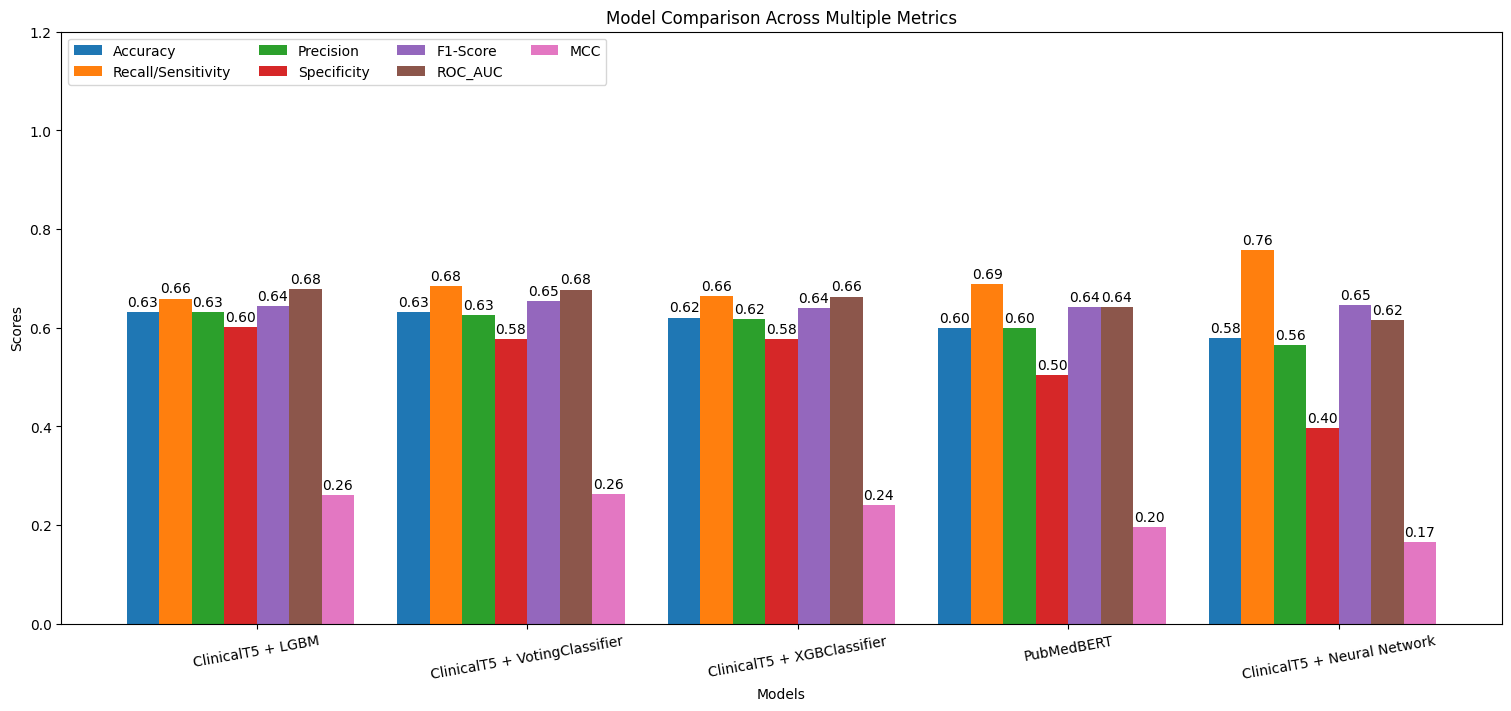

In [ ]:
# Plotting model comparison

x = np.arange(len(model_scores_only))  # the label locations
width = 0.12  # the width of the bars (adjusted to fit all metrics)
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15,7))

# Loop through all columns from 'Accuracy' onwards
for i in model_scores_only.columns[1:]:
    offset = width * multiplier
    rects = ax.bar(x + offset, model_scores_only[i], width, label=i)
    ax.bar_label(rects, padding=2, fmt='%.2f', label_type='edge')
    multiplier += 1

# Customizing the chart with labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Model Comparison Across Multiple Metrics')
ax.set_xticks(x + width * (len(model_scores_only.columns) - 1) / 2, model_scores_only['Model'], rotation=10)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.2)

# Save the image
plt.savefig("compare_bar.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

# Show the plot
plt.show()


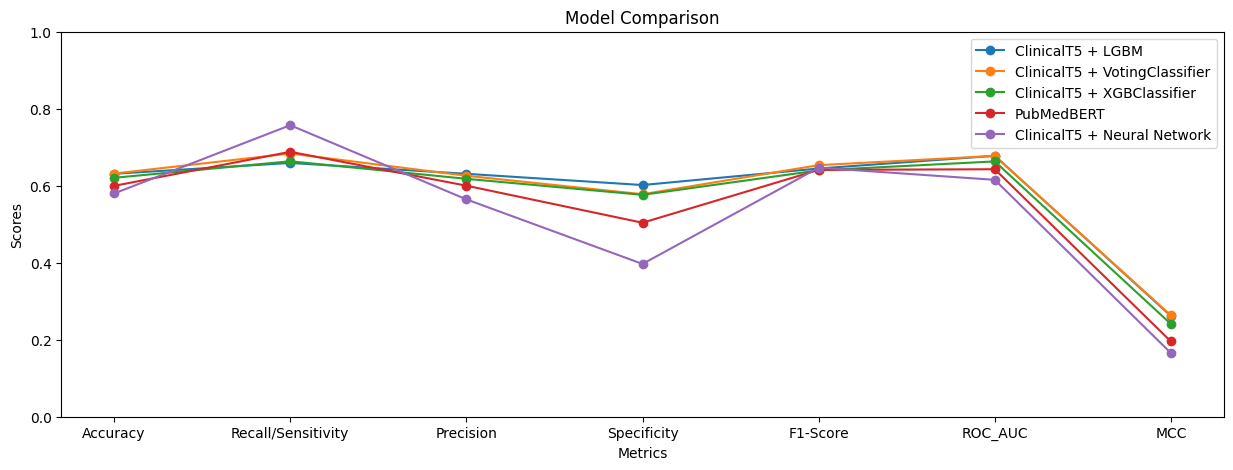

In [ ]:
#Plotting a line plot to compare the model scores
plt.figure(figsize=(15,5))

for item, row in model_scores_only.iterrows():   #
  plt.plot(model_scores_only.columns[1:], row[1:], marker='o', label=row['Model'])

# Customizing the chart with labels and titles
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.title('Model Comparison')
plt.ylim(0.0,1)
plt.legend(loc='best')

#Save the image
plt.savefig("compare_line.png", bbox_inches='tight', dpi=300)  # Save as a high-resolution image

plt.show()

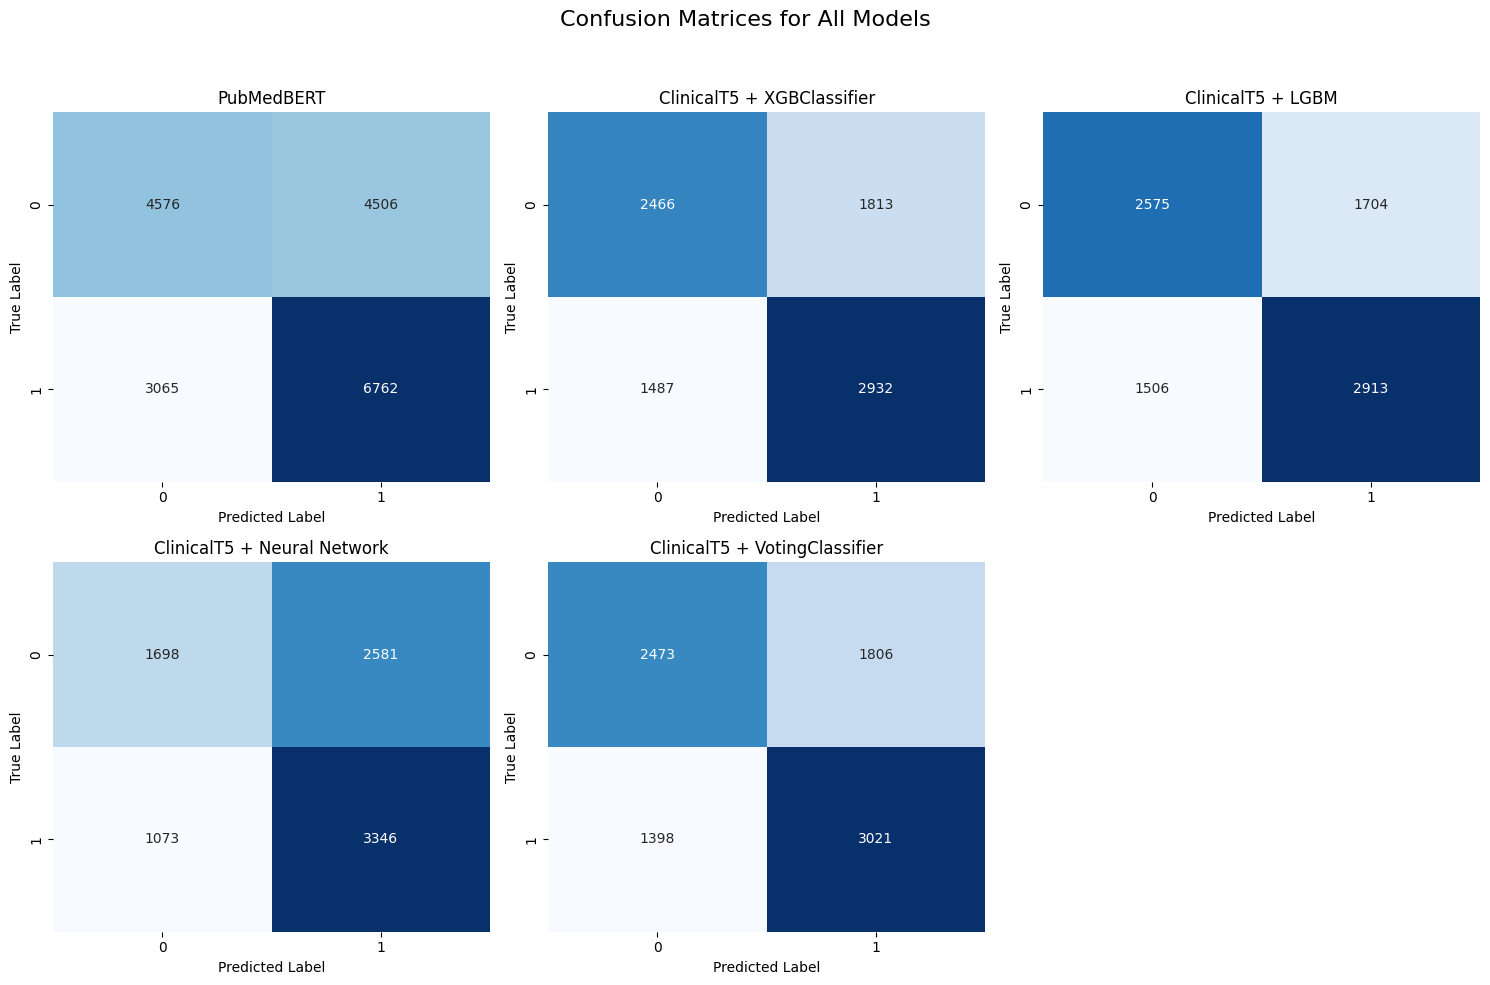

In [ ]:
# Plotting Confusion Matrices for all the models
# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes for easier indexing
axes = axes.flatten()

# Iterate through the models and plot each confusion matrix
for idx, model in enumerate(Model_results):
    sns.heatmap(np.array(model['cm']), annot=True, fmt='d', cmap='Blues', ax=axes[idx], cbar=False)
    axes[idx].set_title(model['Model'])
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

# Hide the extra subplot (since there are only 5 confusion matrices)
for idx in range(len(Model_results), len(axes)):
    axes[idx].axis('off')

# Set a title for the entire plot
fig.suptitle('Confusion Matrices for All Models', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
